# **Name: Isra Mansoor**
# **CMS: 404520**
# **Class: BSCS-12A**
# **Assignment 2**

# **2.** Classification Task

## **2.1** Dataset Overview (Rock Classification Dataset)

## **2.2** Data Exploration and Preprocessing

### **2.2.1** Data Exploration

#### **2.2.1.1** Imports

In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

# Imbalanced Learning (SMOTE for oversampling)
from imblearn.over_sampling import SMOTE

# TensorFlow (for deep learning)
import tensorflow as tf
from tensorflow import keras

# Statistical Models
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Warnings (to suppress warnings during analysis)
import warnings


#### **2.2.1.2** Display dataset rows

In [2]:
# Specify the path to the dataset
file_path = '/kaggle/input/rock-classification-dataset/rock_classification_dataset.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the dataset
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

       Class  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
13606      7  
13607      7  
13608      7  
13609      7  
13610      7  

[13611 rows x 17 columns]

#### The code loads a rock classification dataset from a CSV file into a Pandas DataFrame and displays its contents. The output is a table with 13,611 rows and 17 columns.

#### **2.2.1.3** Display dataset shape

In [3]:
# Display dataset shape (number of rows and columns)
print("\nDataset Shape:")
print(df.shape)


Dataset Shape:
(13611, 17)


#### The code prints the shape of the dataset, showing it has 13,611 rows and 17 columns.

#### **2.2.1.4** Display column names

In [4]:
# Display columns line by line
for column in df.columns:
    print(column)

Area
Perimeter
MajorAxisLength
MinorAxisLength
AspectRation
Eccentricity
ConvexArea
EquivDiameter
Extent
Solidity
roundness
Compactness
ShapeFactor1
ShapeFactor2
ShapeFactor3
ShapeFactor4
Class


#### The code prints each column name in the dataset line by line. The output lists all 17 column names, including features like Area, Perimeter, and Class.

#### **2.2.1.5** Display column data types

In [5]:
# Display data type of each column
print(df.dtypes)

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class                int64
dtype: object


#### The code displays the data type of each column in the dataset. The output shows most columns are float64, while a few are int64.

#### **2.2.1.6** Display missing values

In [6]:
# Display the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


#### The code calculates and prints the number of missing values in each column. The output shows that all columns have 0 missing values.

#### **2.2.1.7** Display summary of statistics

In [7]:
# Summary statistics for numerical columns
print("Summary Statistics (Numerical Columns):")
df.describe()

Summary Statistics (Numerical Columns):


Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4         Class  
count  13611.000000  13611.000000  13611.000000  
mean       0.643590      0.995063      4.631181  
std        0.098996      0.004366      2.151782  
min        0.410339      0.947687      1.000000  
25%        0.581359      0.993703      3.000000  
50%        0.642044      0.996386      5.000000  
75%        0.696006      0.997883      7.000000  
max        0.974767      0.999733      7.000000

#### The code displays summary statistics for numerical columns, including metrics like count, mean, standard deviation, min, and max. The output provides insights into the distribution of each numerical feature in the dataset.

#### **2.2.1.8** Display unique values

In [8]:
# Number of unique values in each column
print("\nNumber of Unique Values per Column:")
print(df.nunique())


Number of Unique Values per Column:
Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64


#### The code prints the number of unique values in each column. The output shows high uniqueness for most features, while the Class column has only 7 unique values, indicating 7 rock classes.

#### **2.2.1.9** Display duplicates

In [9]:
# Check for duplicate rows
print("\nCount of Duplicate Rows:")
print(df.duplicated().sum())


Count of Duplicate Rows:
68


#### The code checks for duplicate rows and prints the count. The output shows there are 68 duplicate rows in the dataset.

#### **2.2.1.10** Correlation matrix

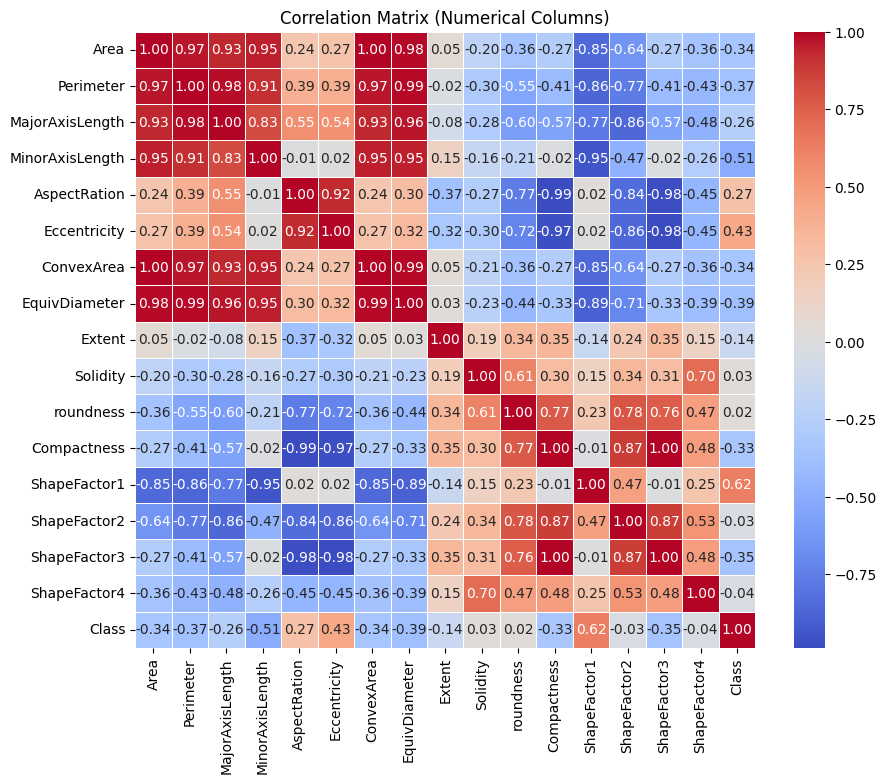

In [10]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix (Numerical Columns)")

# Display the plot
plt.show()

#### The code computes and displays a correlation matrix for the numerical columns in the dataset. It visualizes the correlation using a heatmap, where the color intensity represents the strength of the correlations between features.

#### **2.2.1.11** Variance Inflation Factor (VIF)

In [11]:
# Add constant for intercept term in regression
X = add_constant(df.drop(columns=['Class']))  # Assuming 'Class' is the target column

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            feature           VIF
0             const  1.350838e+07
1              Area  8.139077e+04
2         Perimeter  3.573980e+03
3   MajorAxisLength  8.793652e+04
4   MinorAxisLength  7.748268e+04
5      AspectRation  1.391886e+04
6      Eccentricity  1.183004e+03
7        ConvexArea  7.855251e+04
8     EquivDiameter  3.149298e+05
9            Extent  1.241536e+00
10         Solidity  1.405355e+01
11        roundness  1.040285e+02
12      Compactness  2.767697e+05
13     ShapeFactor1  6.071759e+02
14     ShapeFactor2  1.245331e+03
15     ShapeFactor3  2.002868e+05
16     ShapeFactor4  6.704378e+01


#### The VIF values indicate high multicollinearity in features like 'Area', 'MajorAxisLength', and 'EquivDiameter', which may need to be addressed in the model.

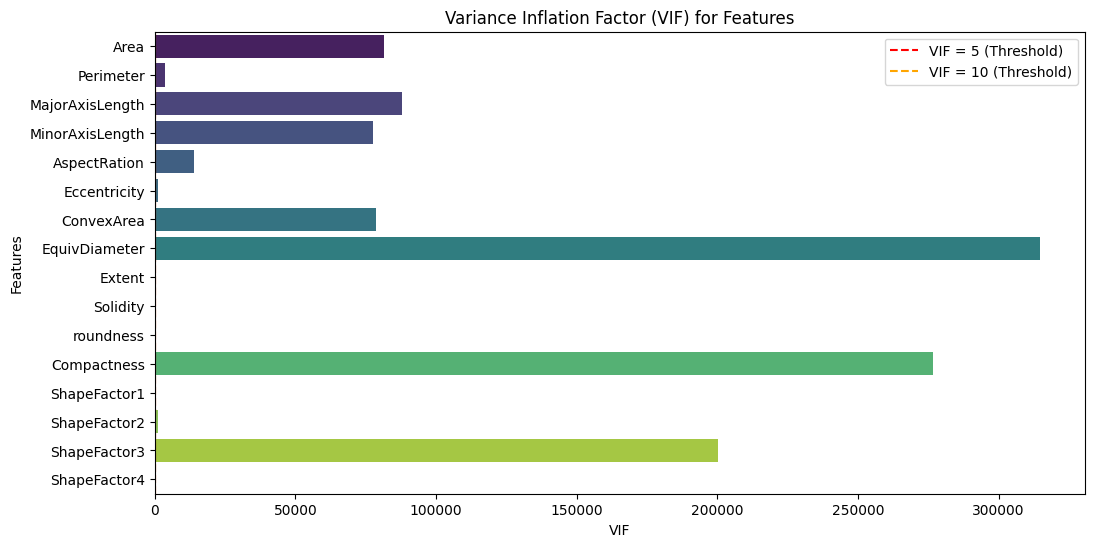

In [12]:
# Exclude the target variable 'Class' from the features
X = df.drop(columns=['Class'])

# Add constant for calculating VIF
X_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Remove the constant from the VIF data (we are only interested in the features)
vif_data = vif_data[vif_data['Feature'] != 'const']

# Plotting VIF
plt.figure(figsize=(12, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Features')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.axvline(x=5, color='r', linestyle='--', label='VIF = 5 (Threshold)')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10 (Threshold)')
plt.legend()
plt.show()


#### The VIF plot will help identify which features have high multicollinearity, with a threshold typically set at 5 or 10 to determine which variables might need to be removed or transformed for a more stable model.

#### **2.2.1.12** Visualizations of dataset (Histogram)

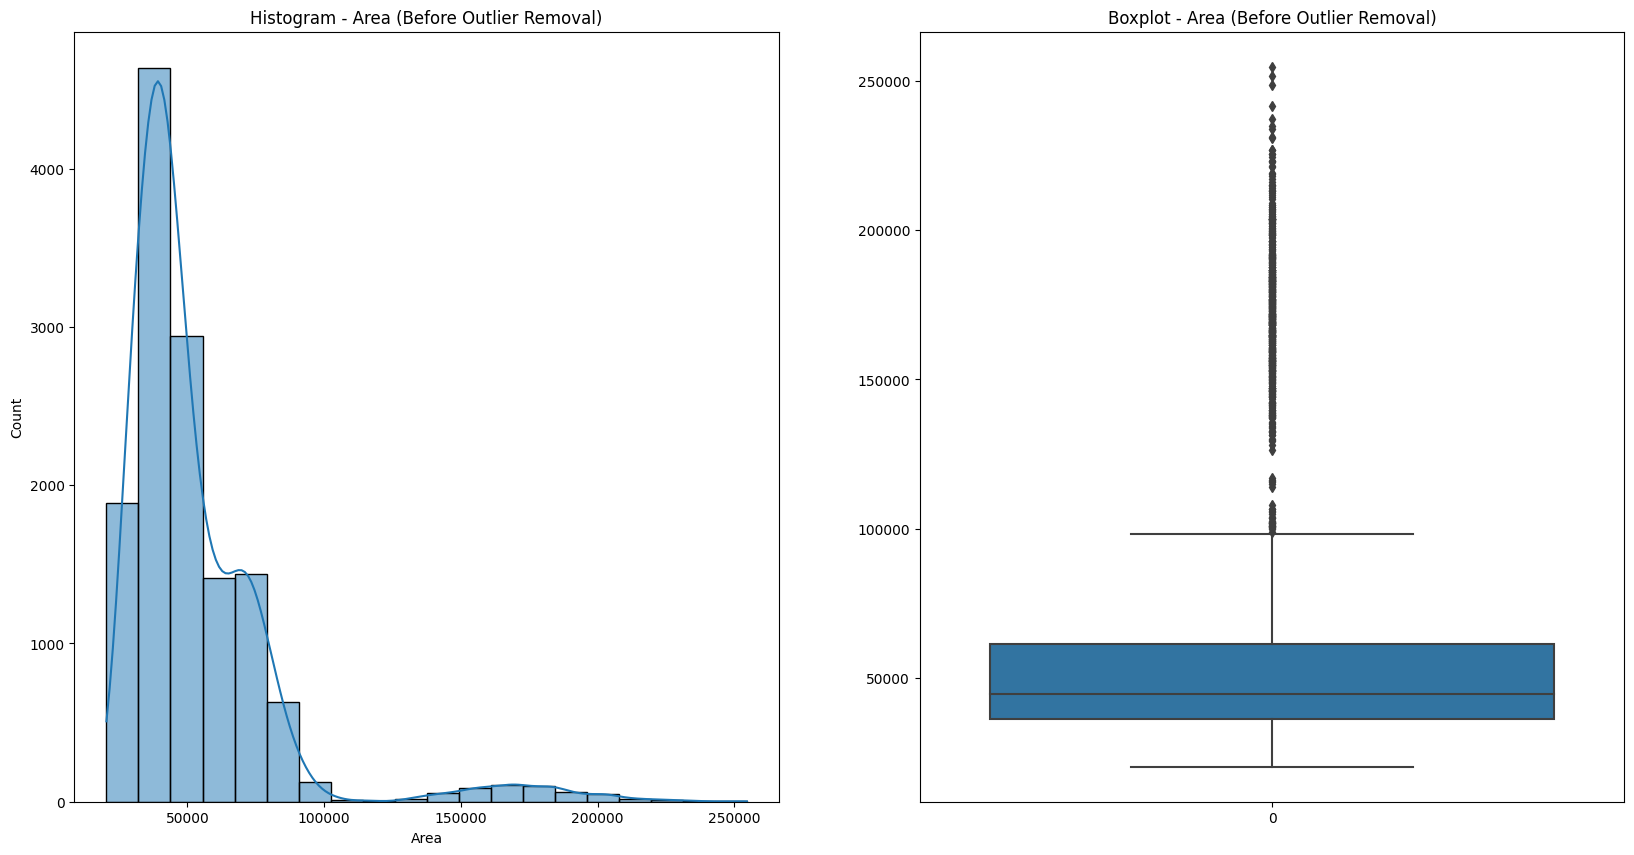

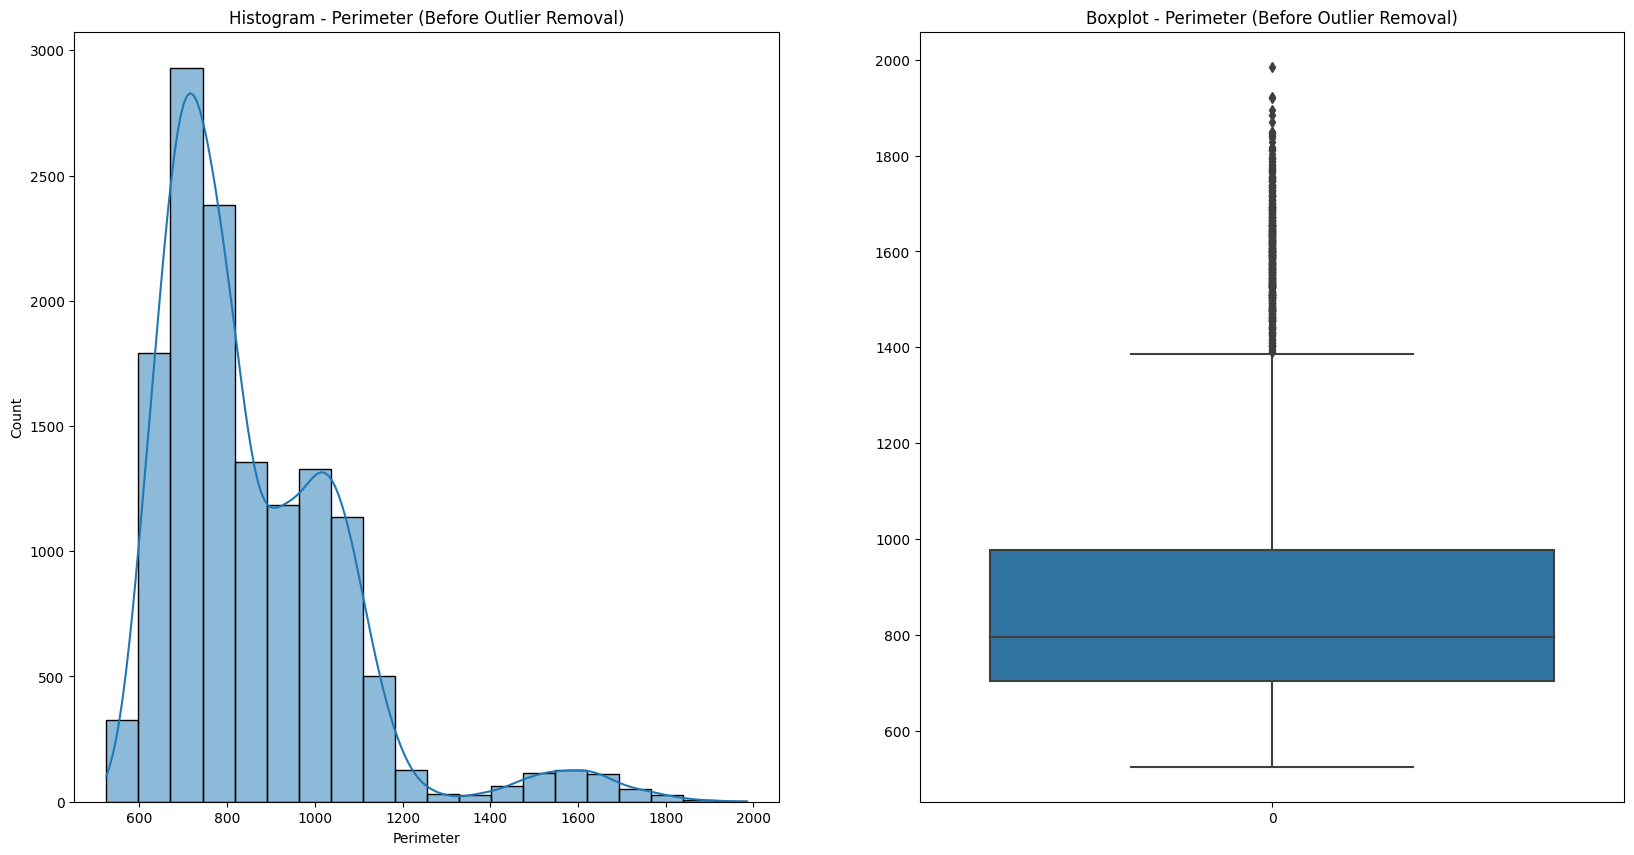

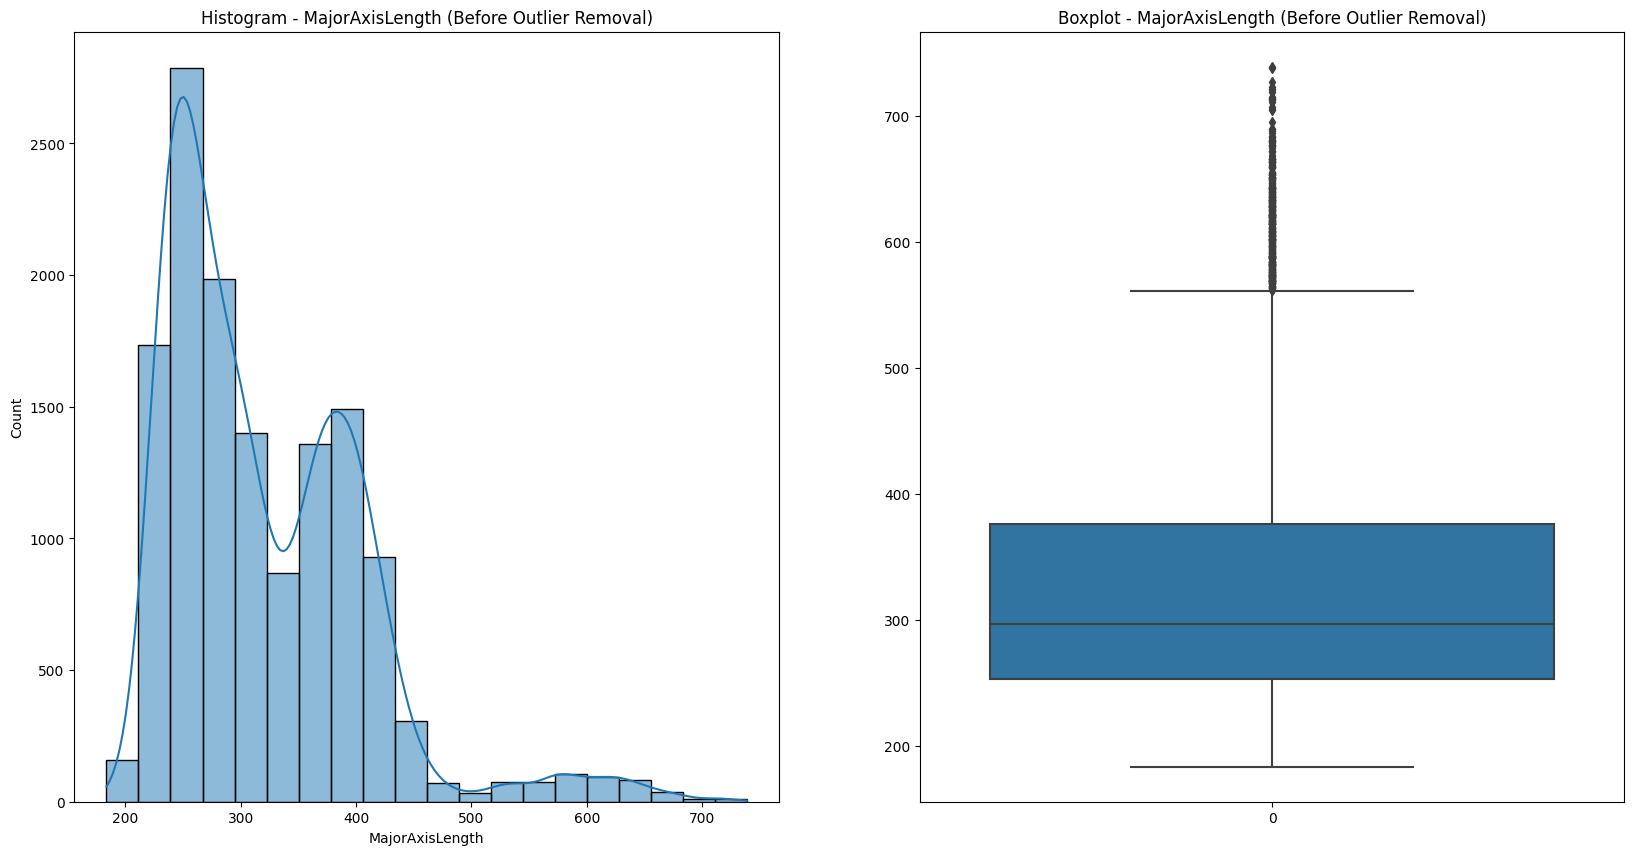

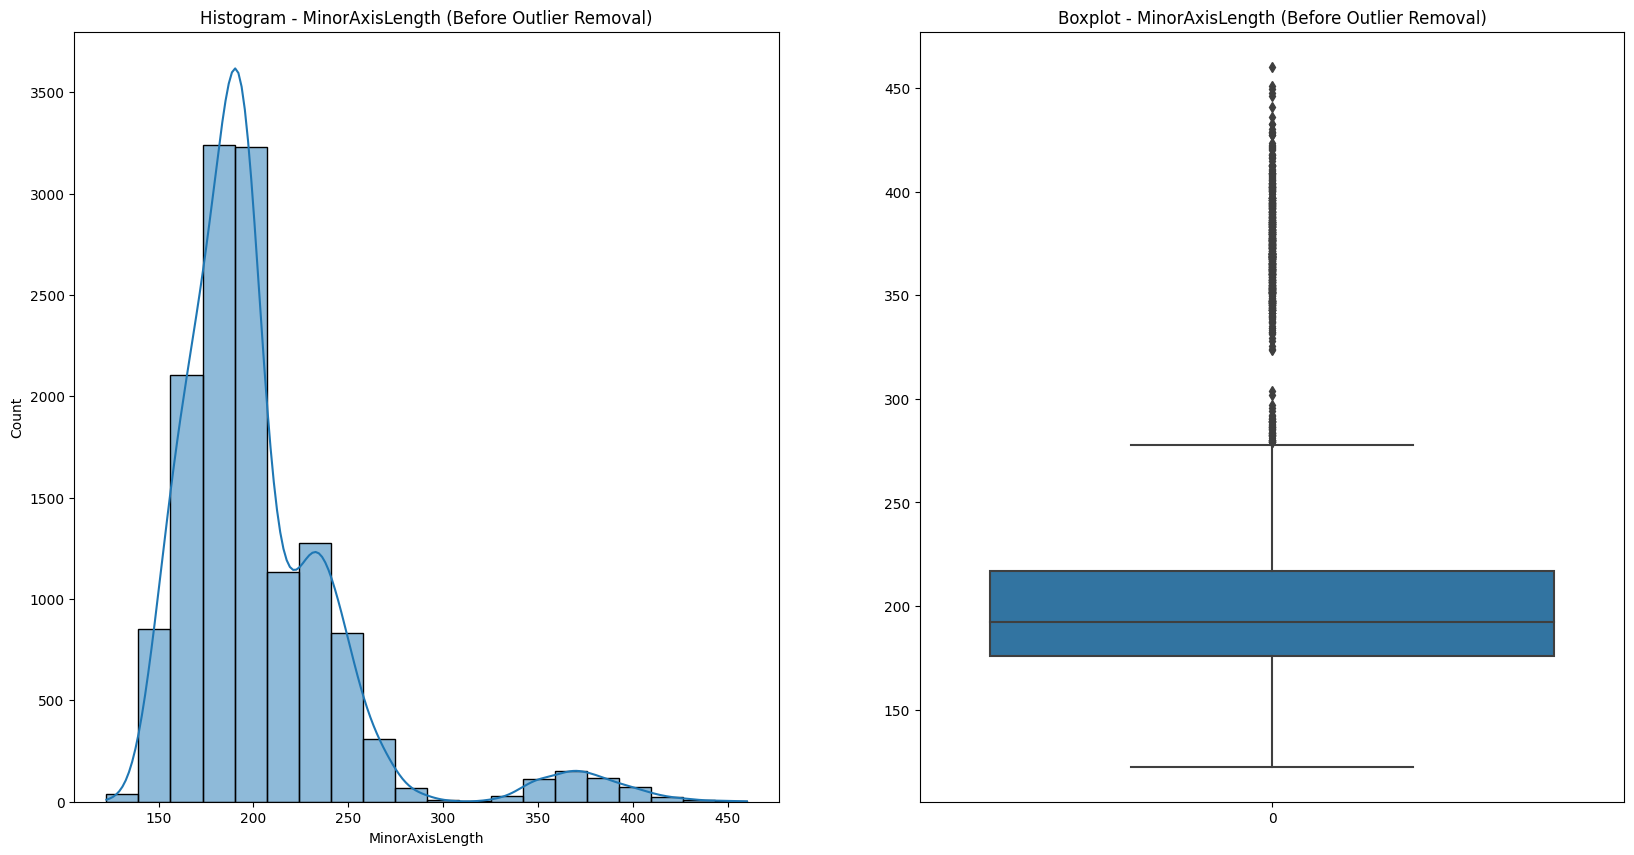

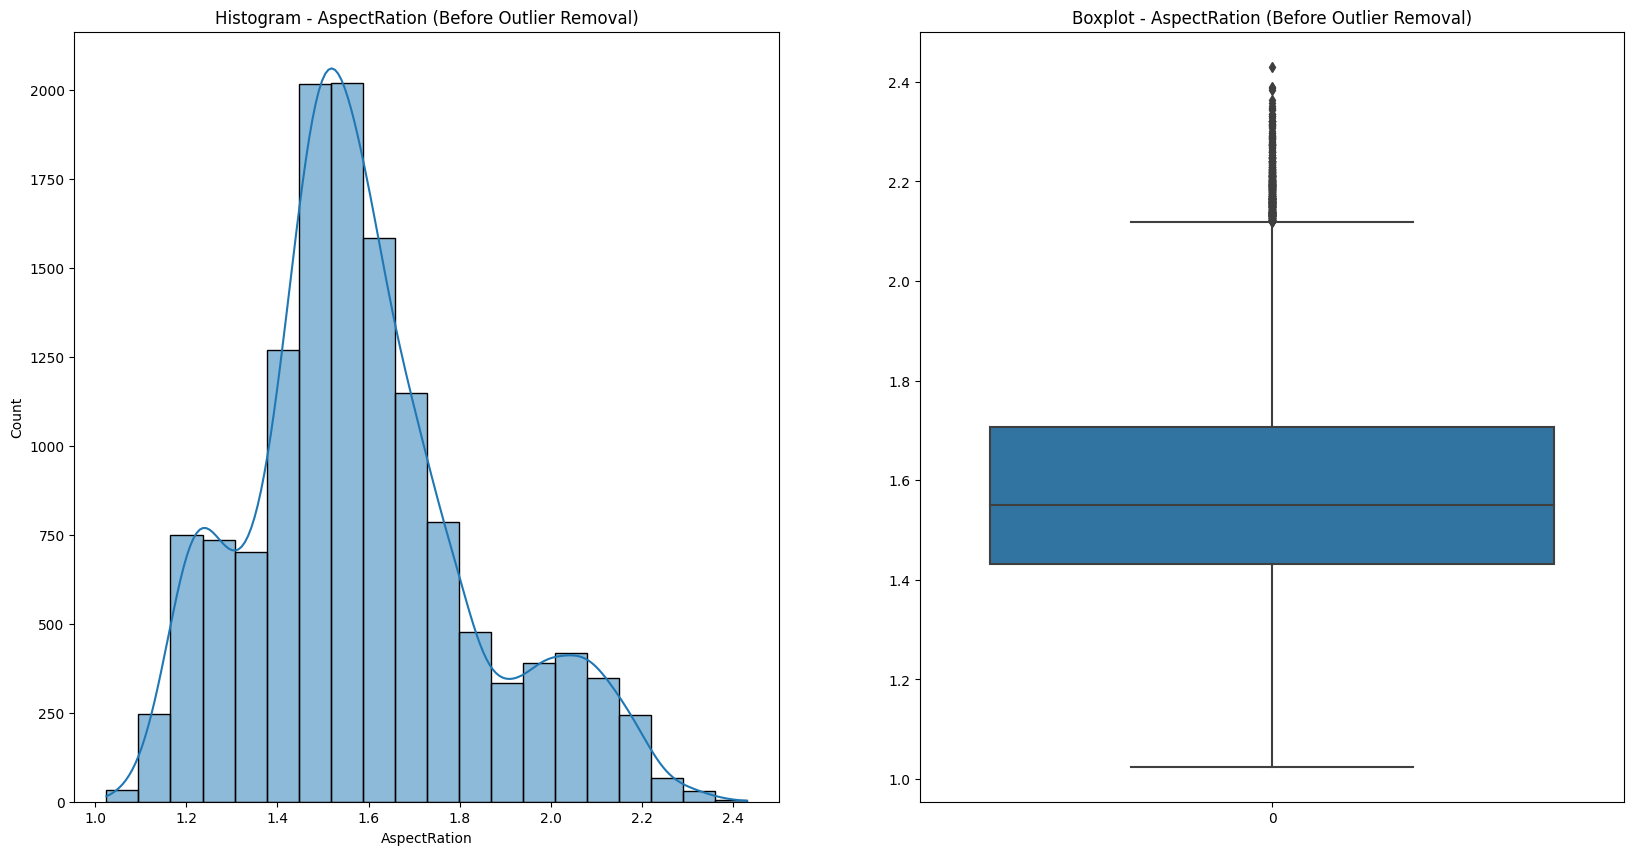

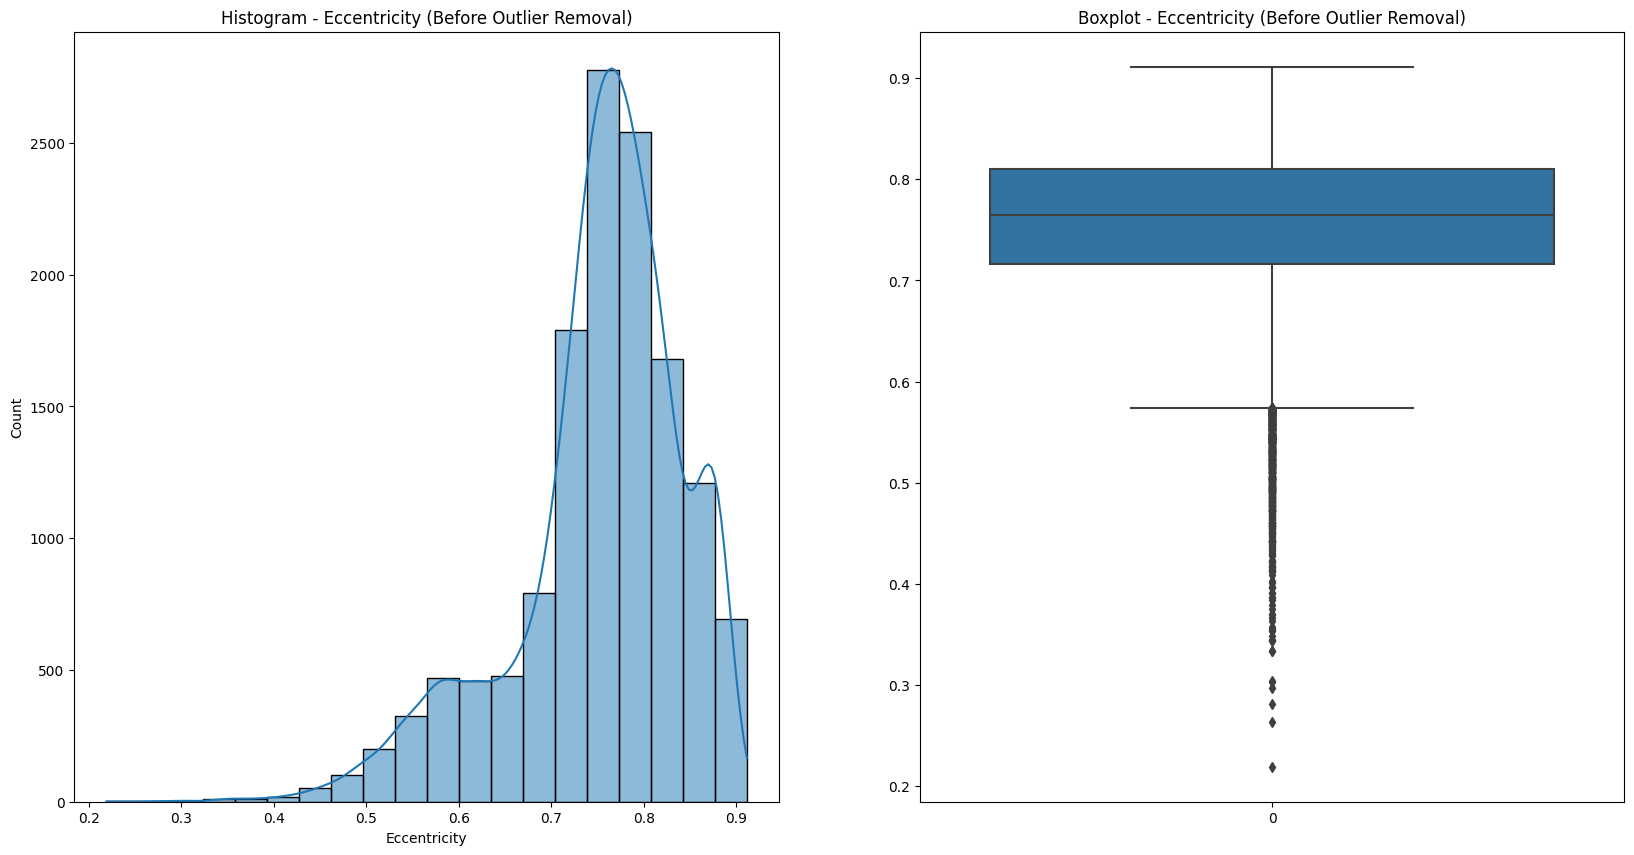

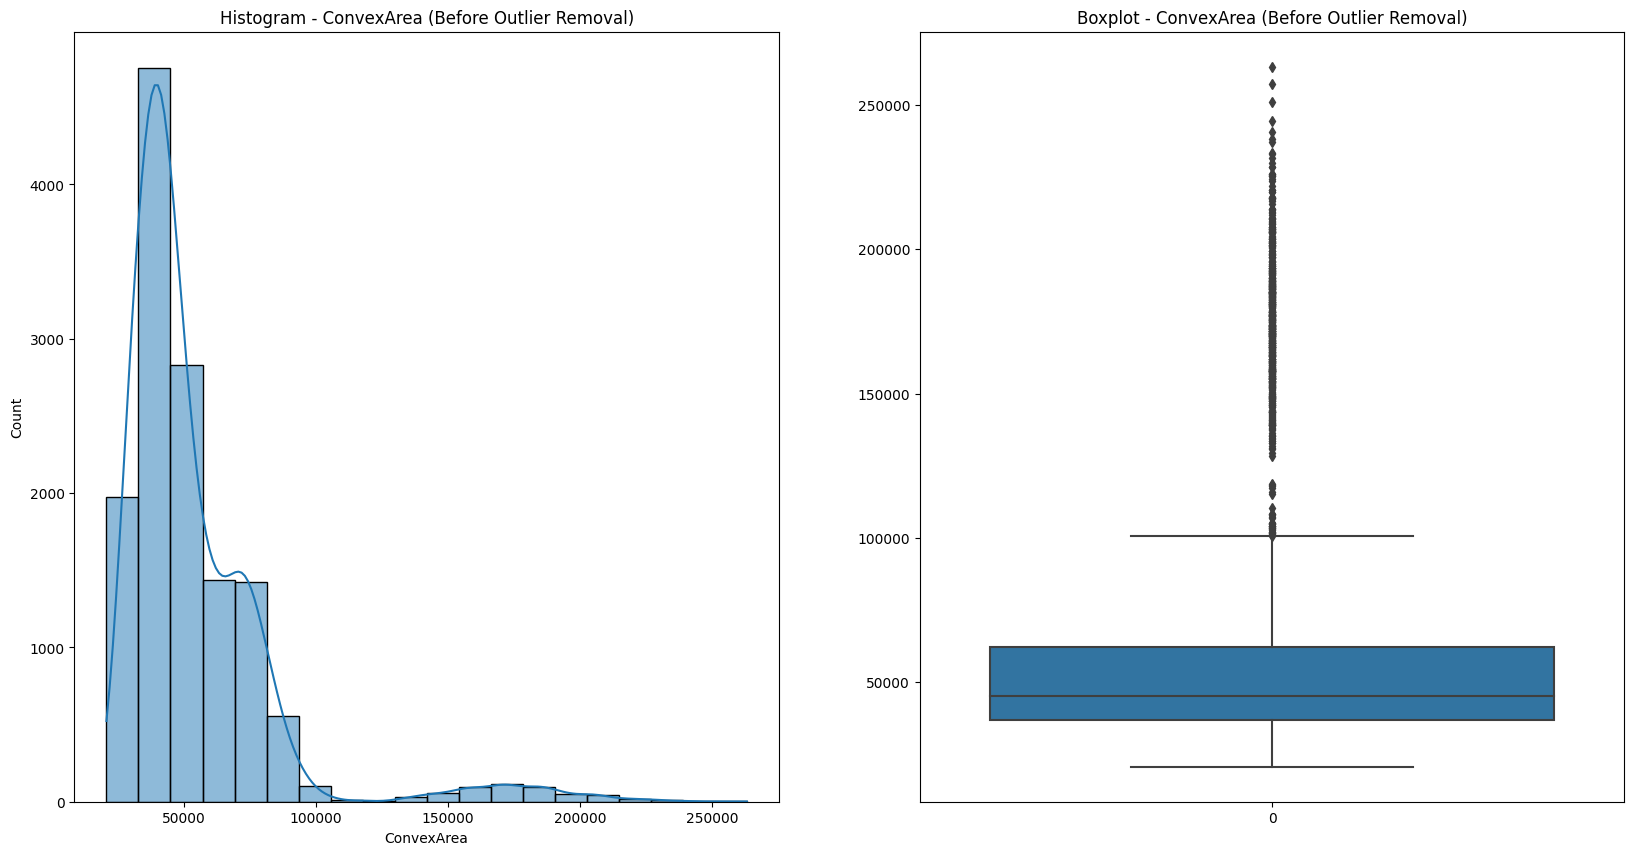

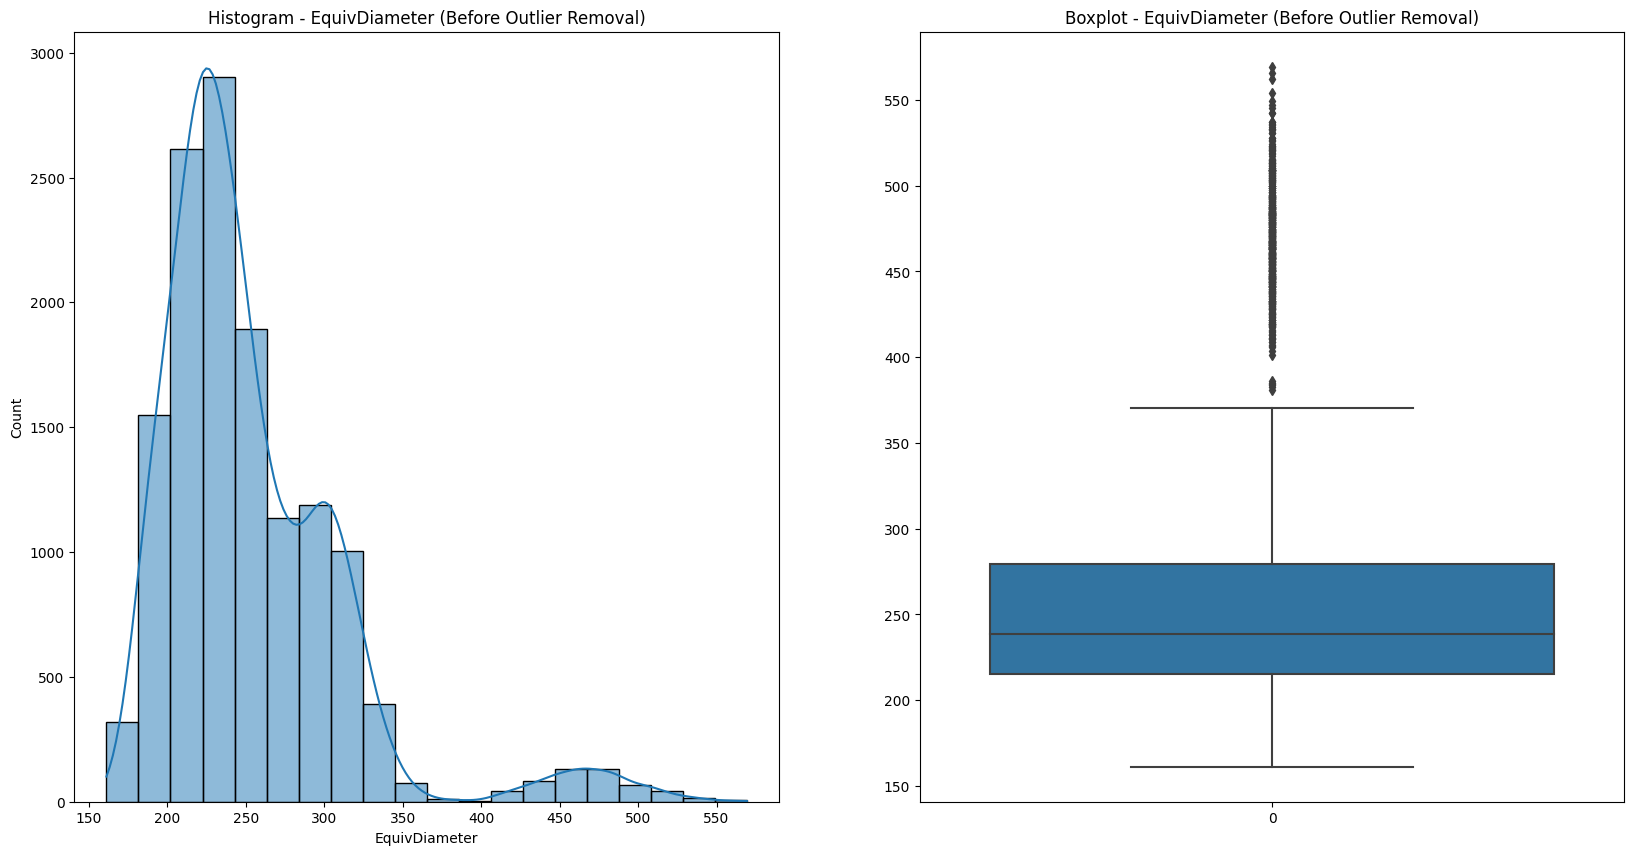

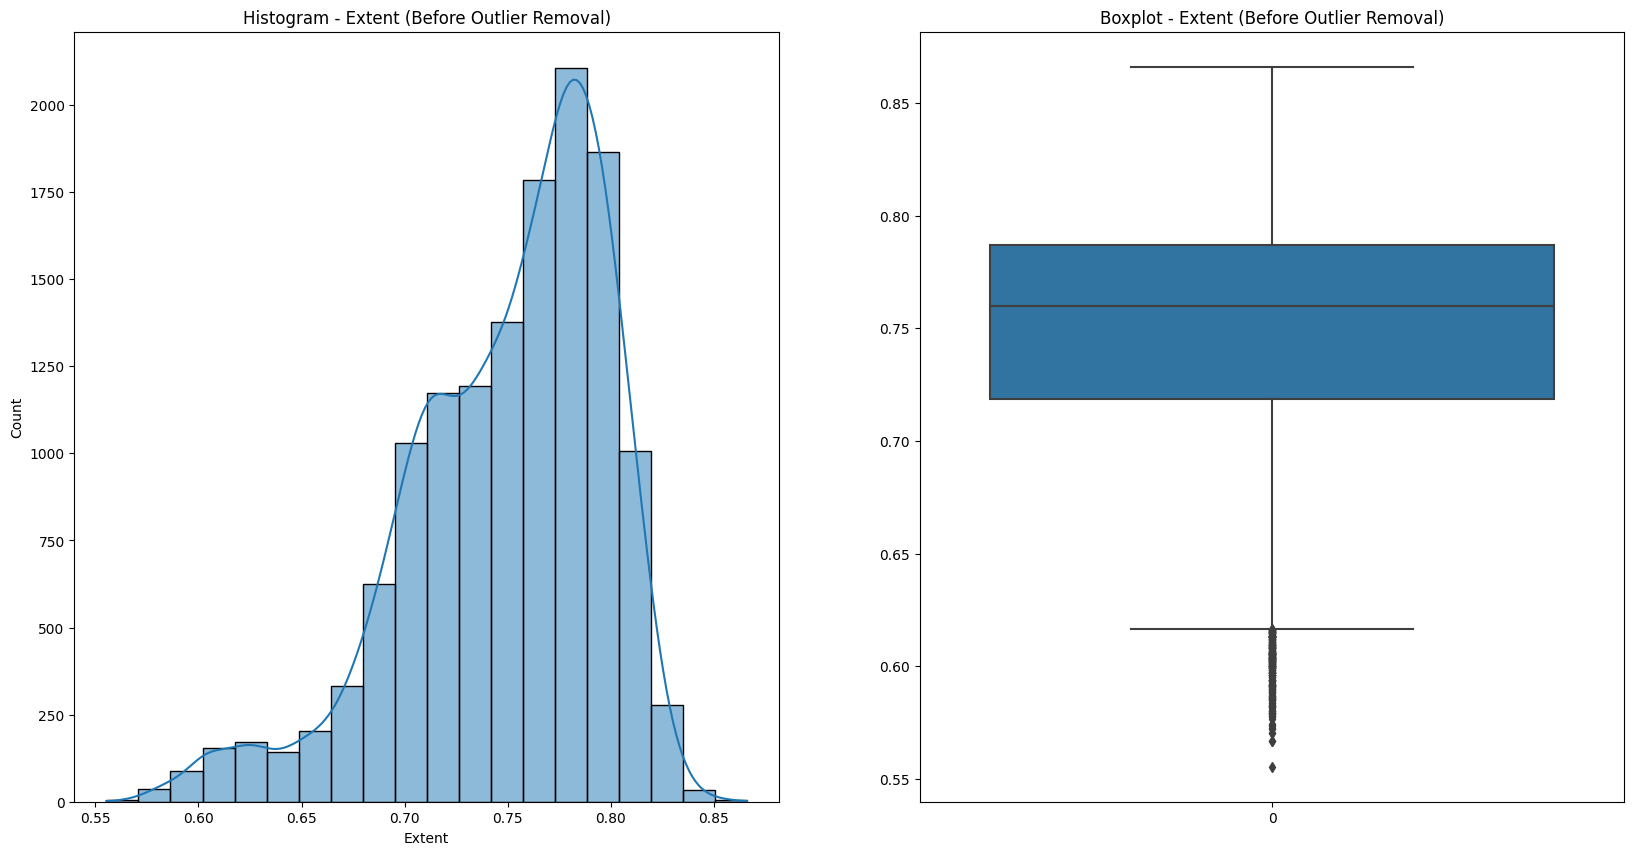

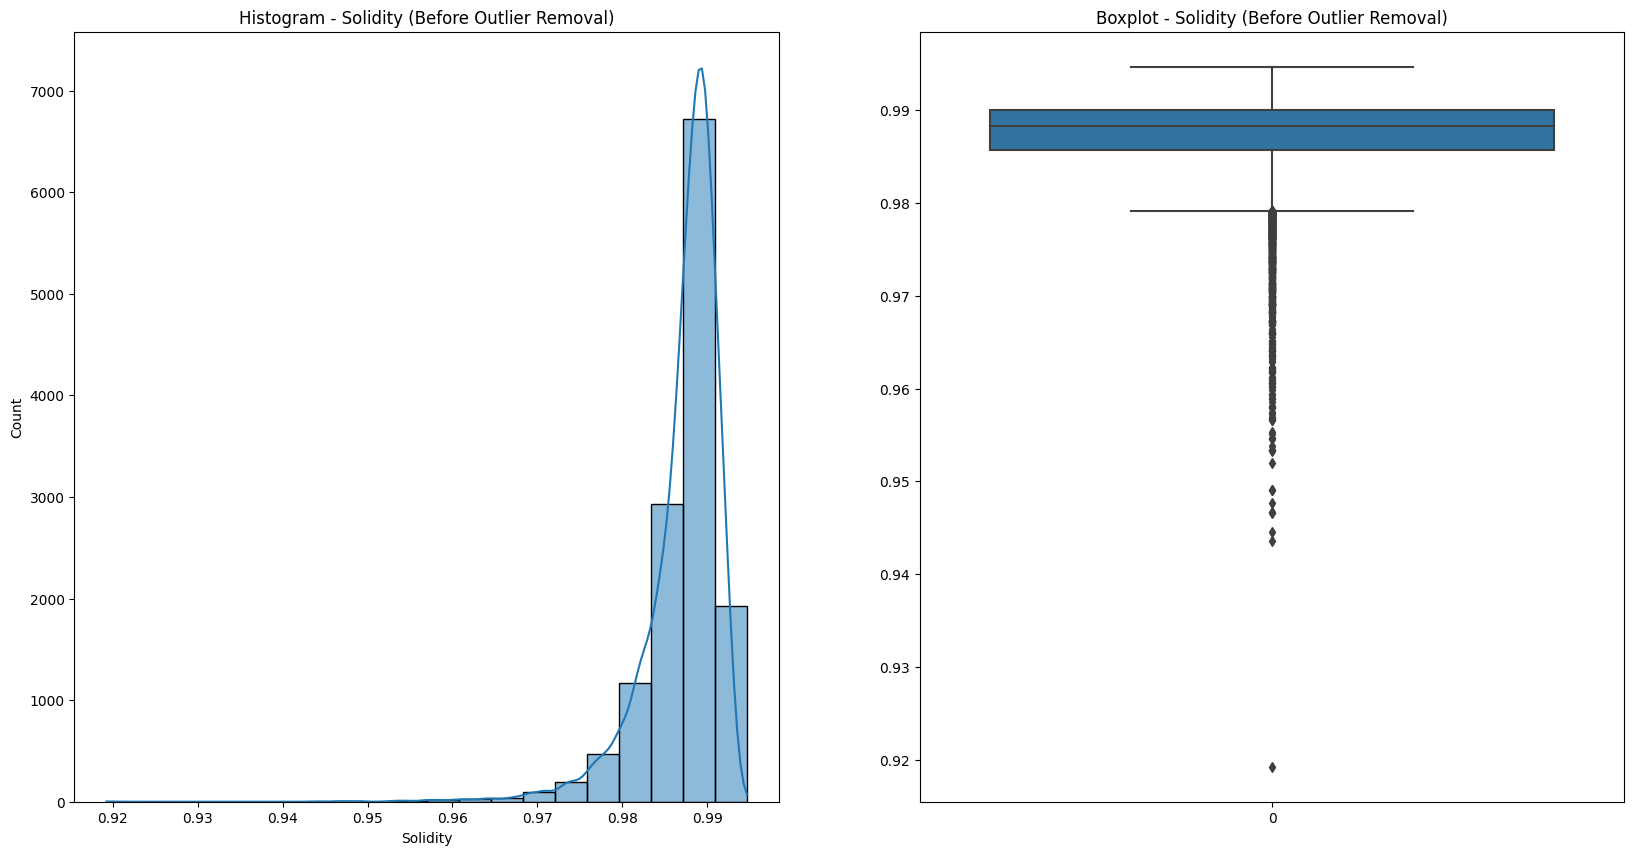

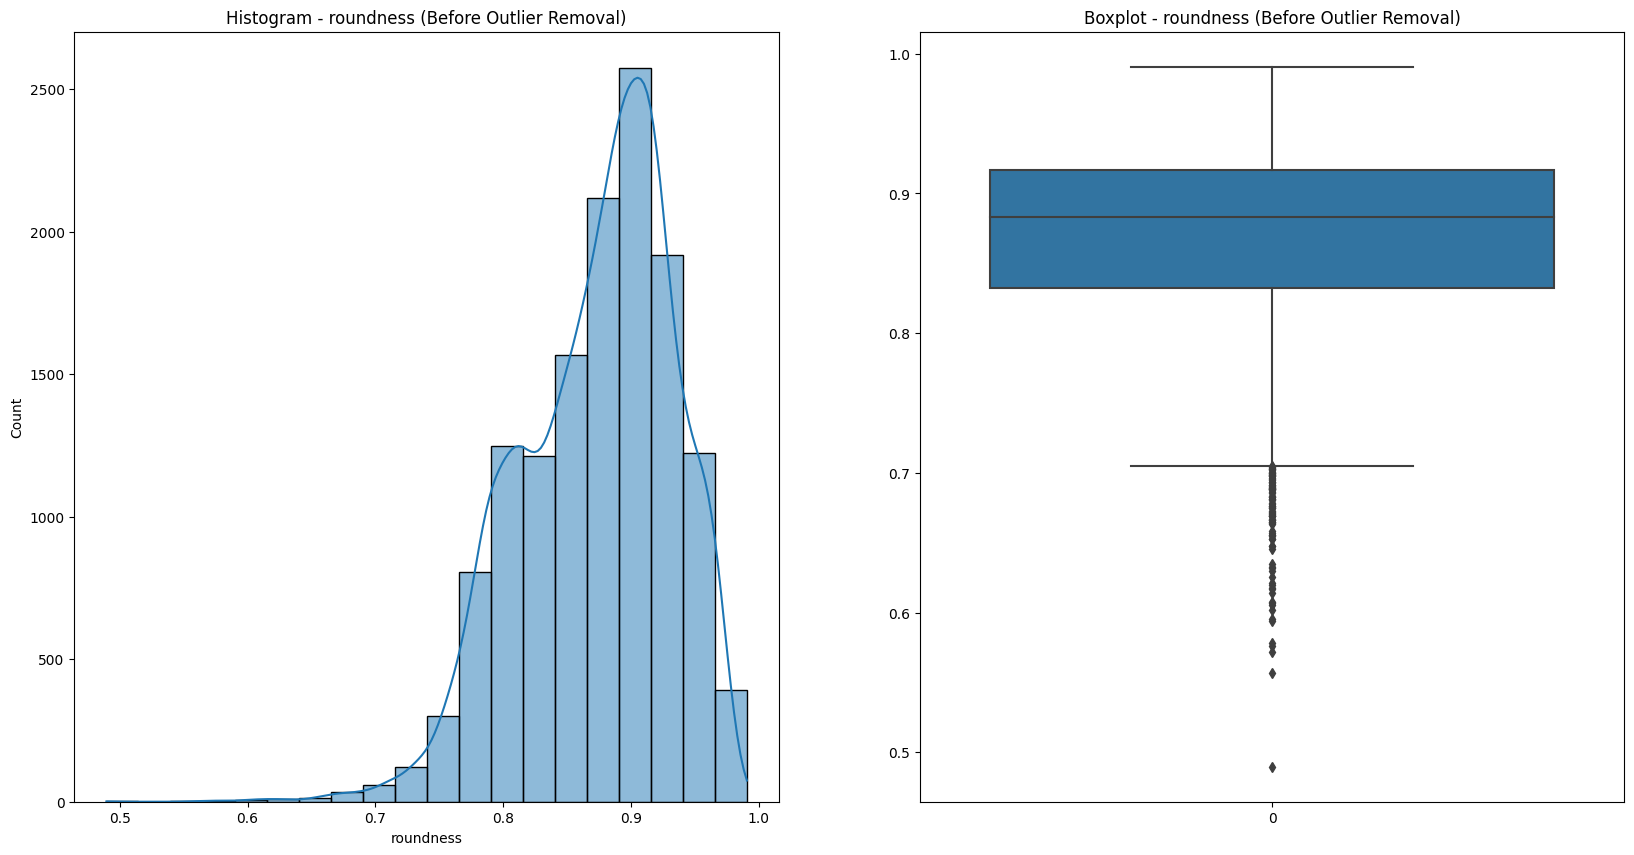

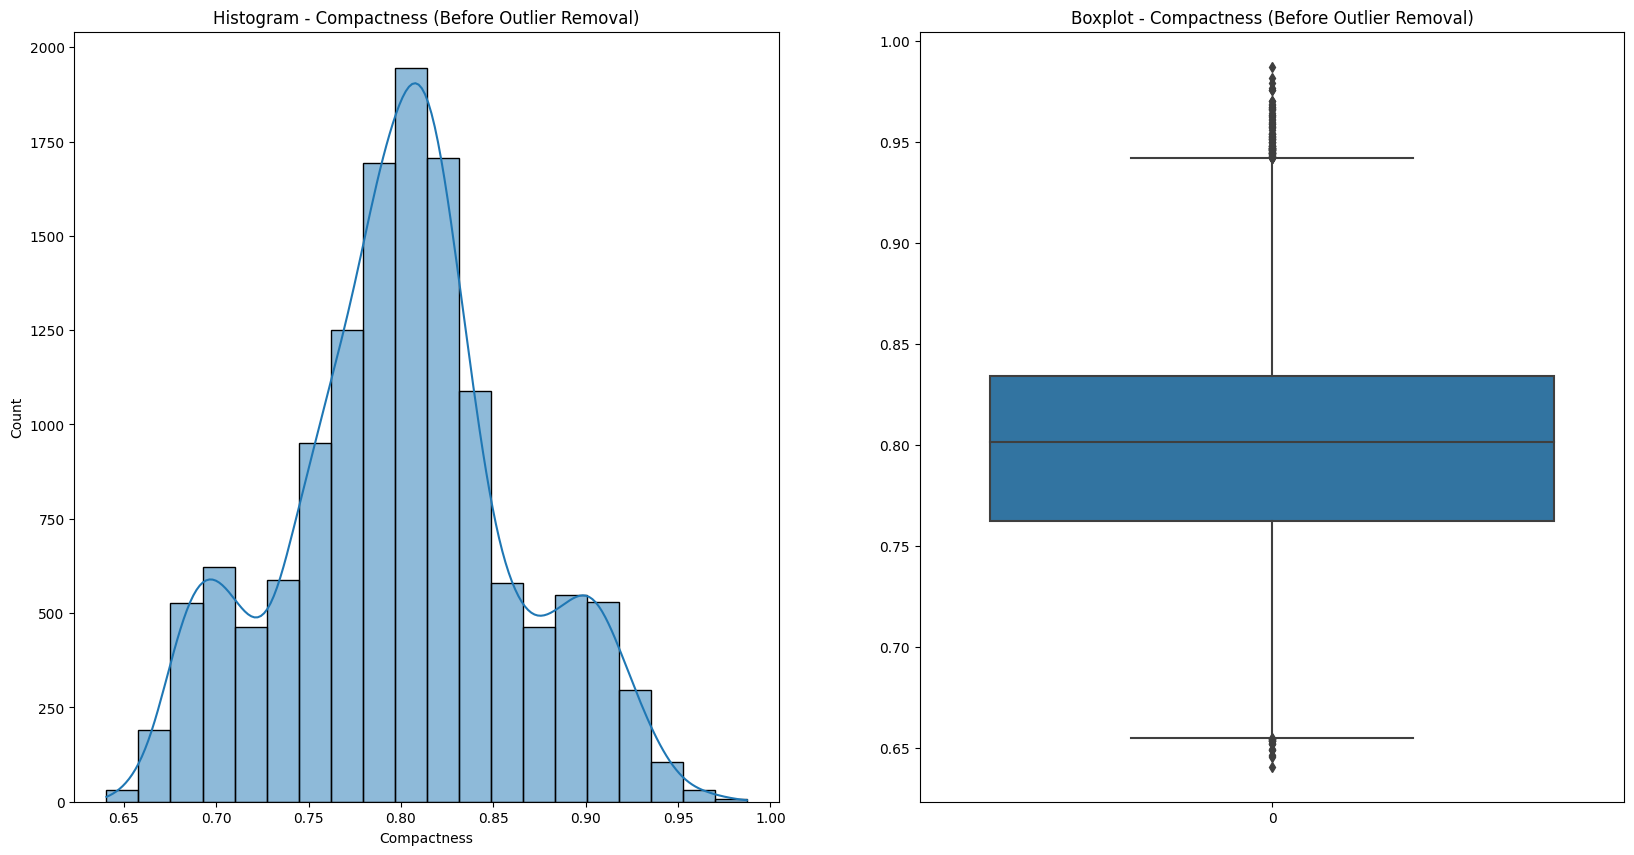

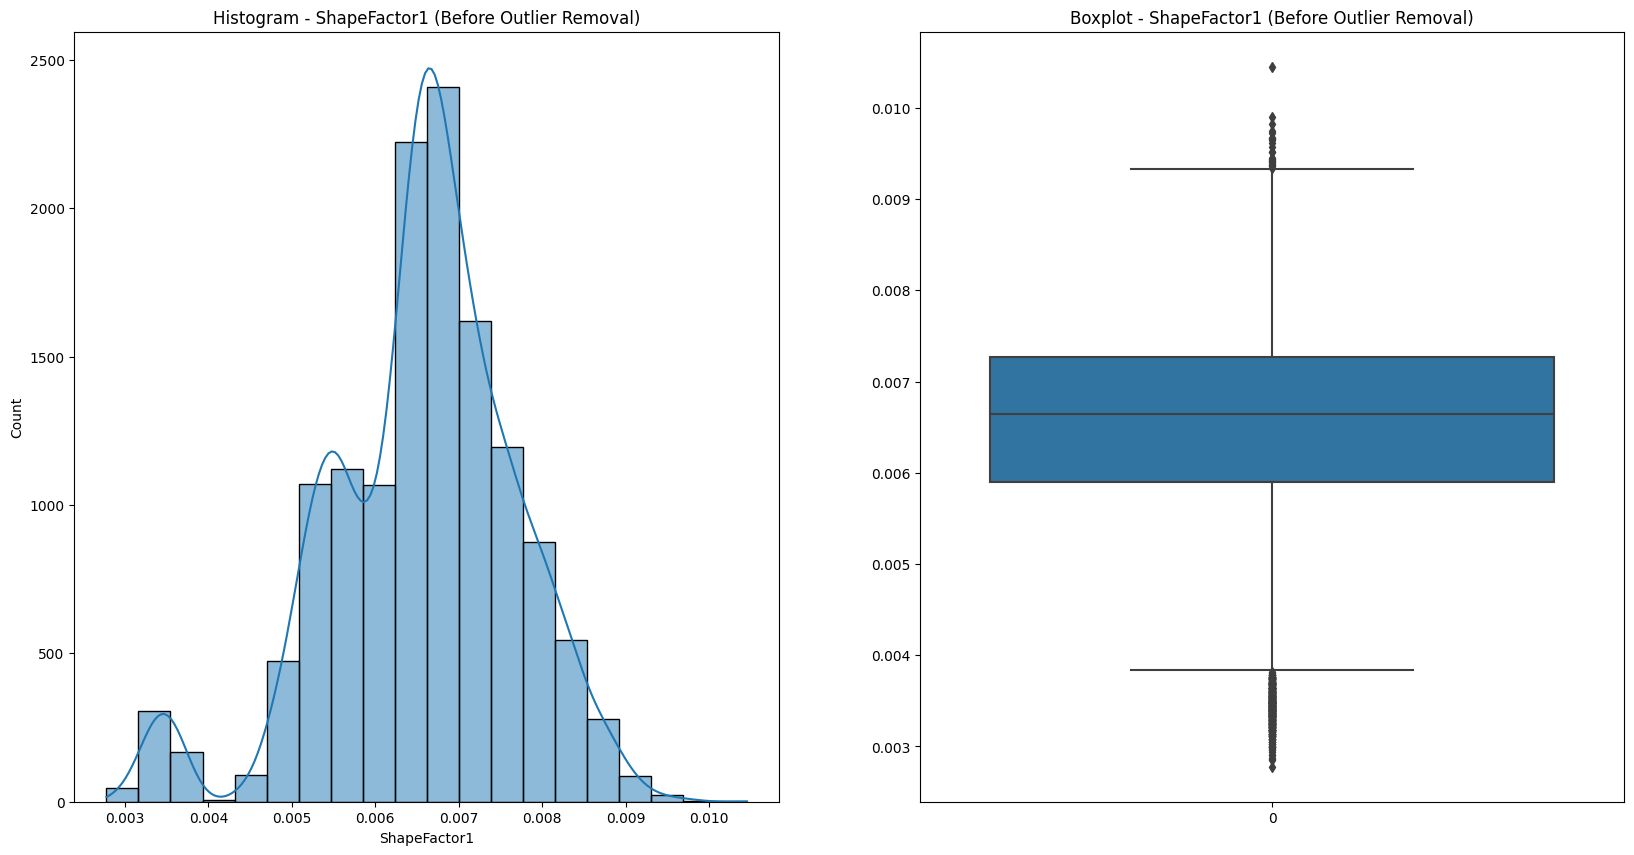

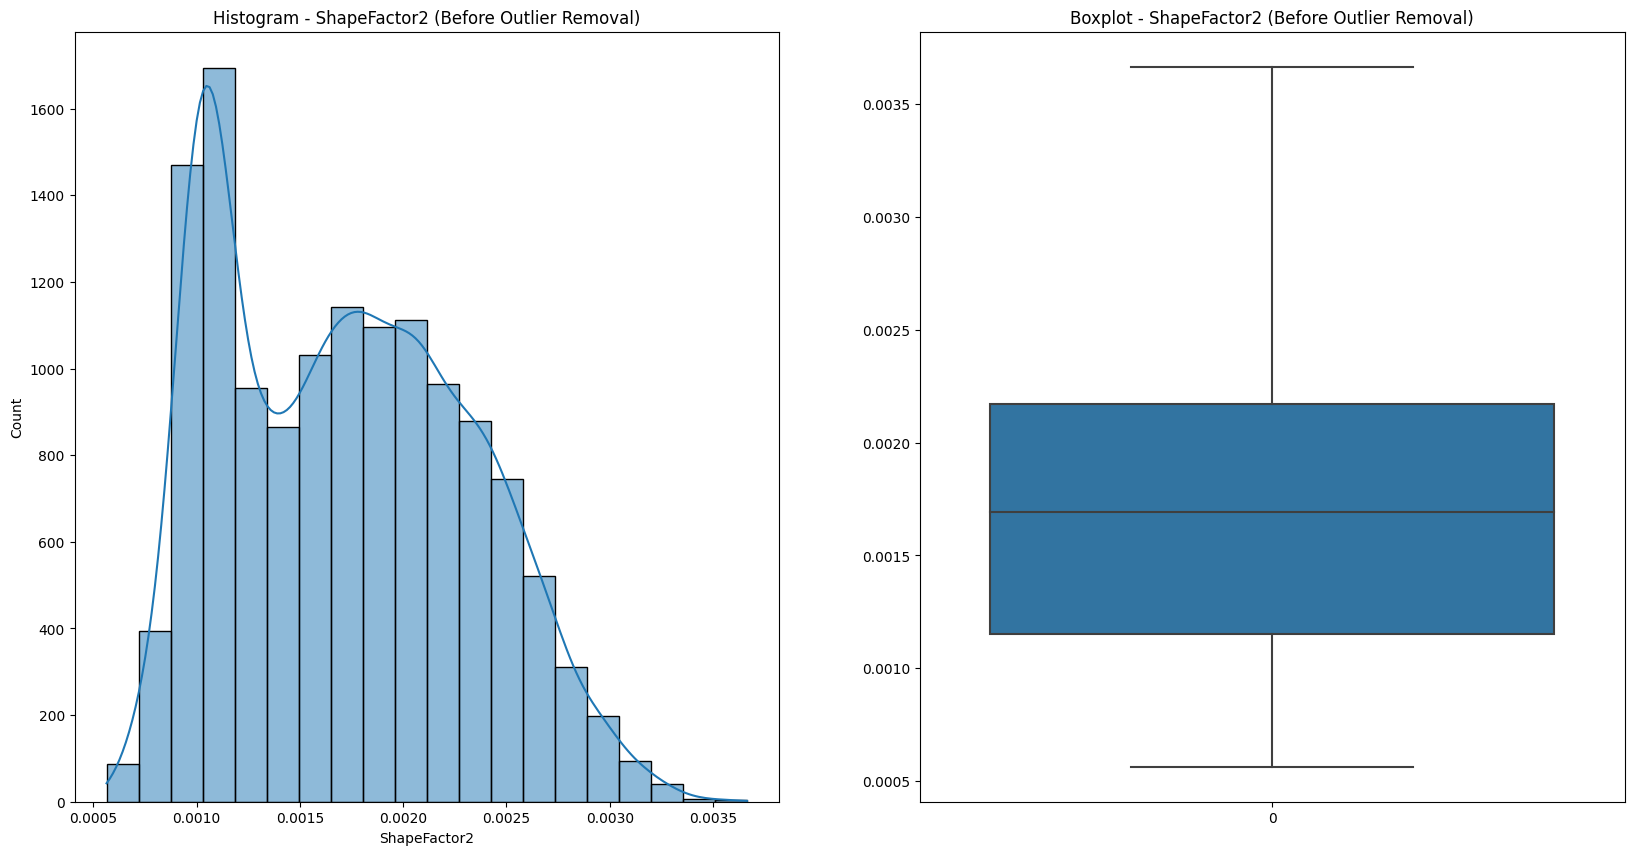

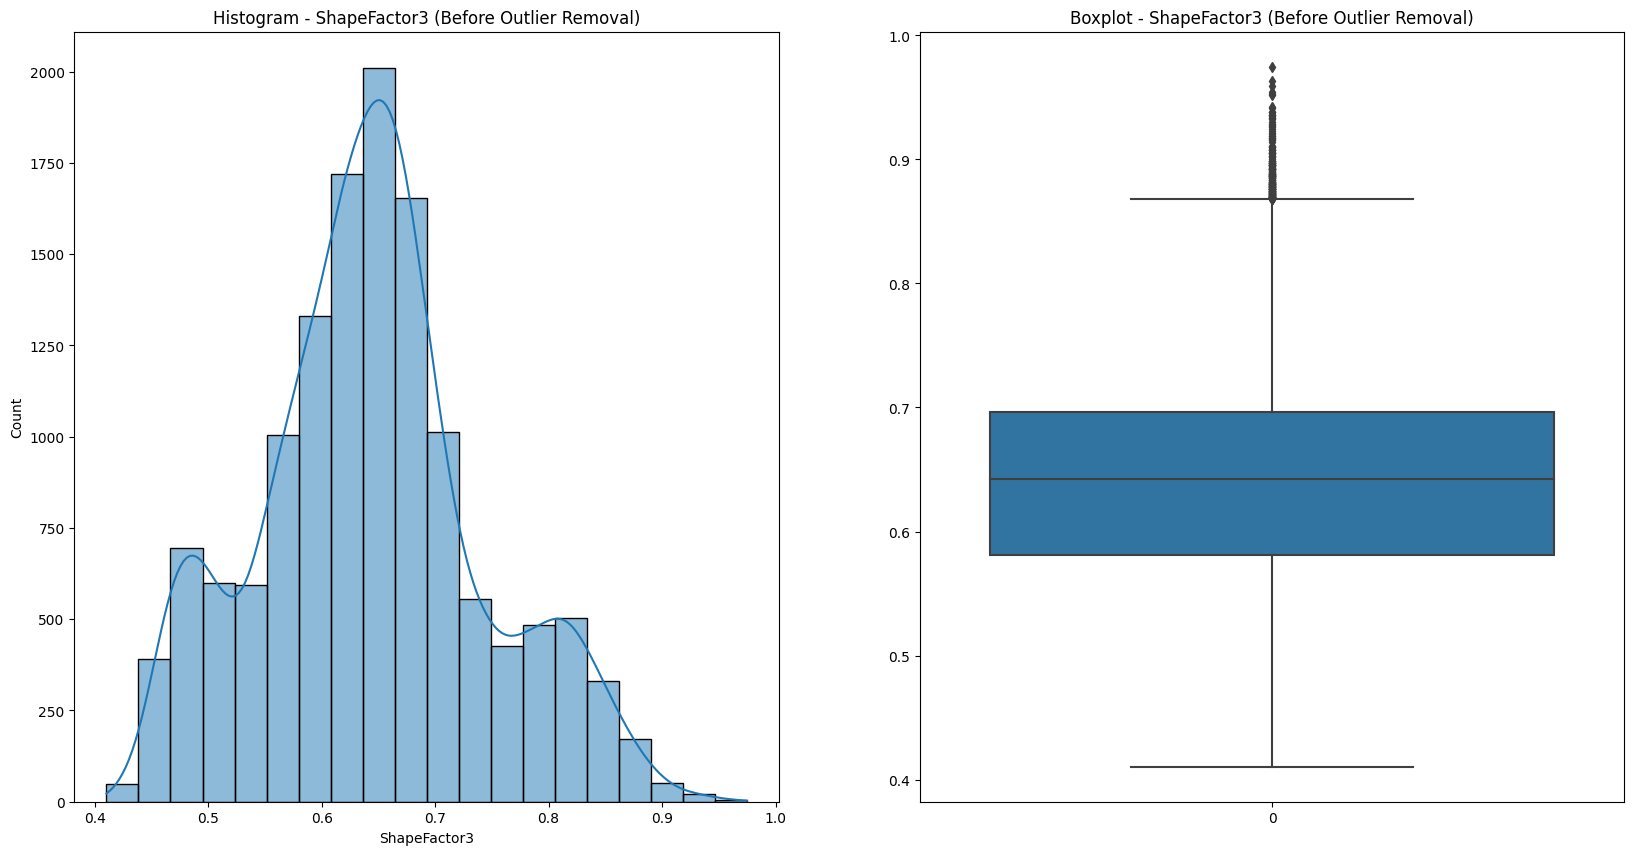

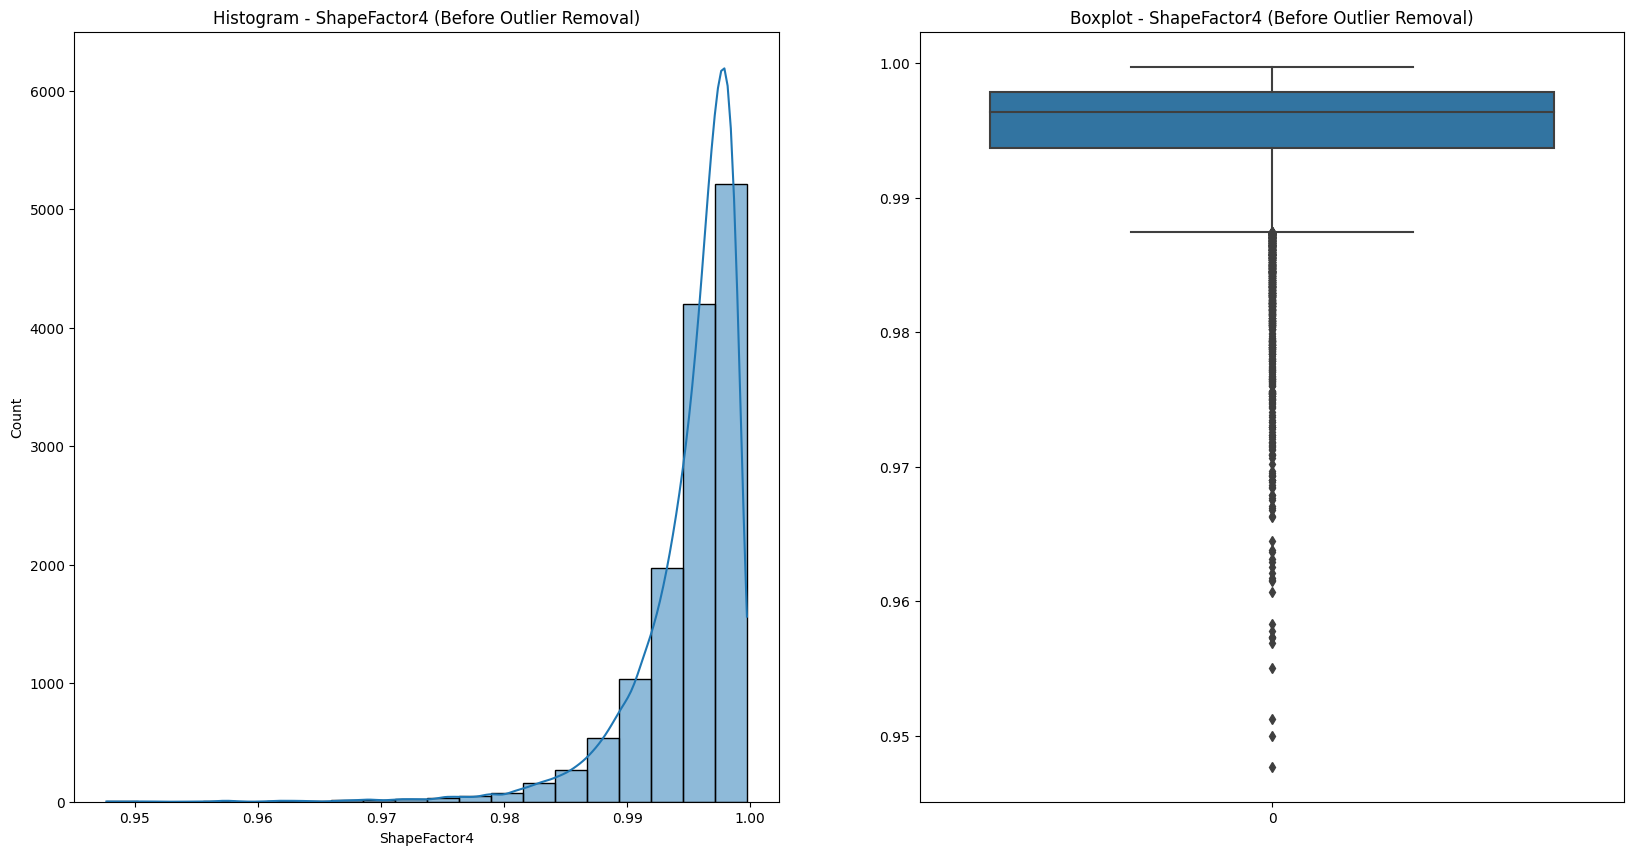

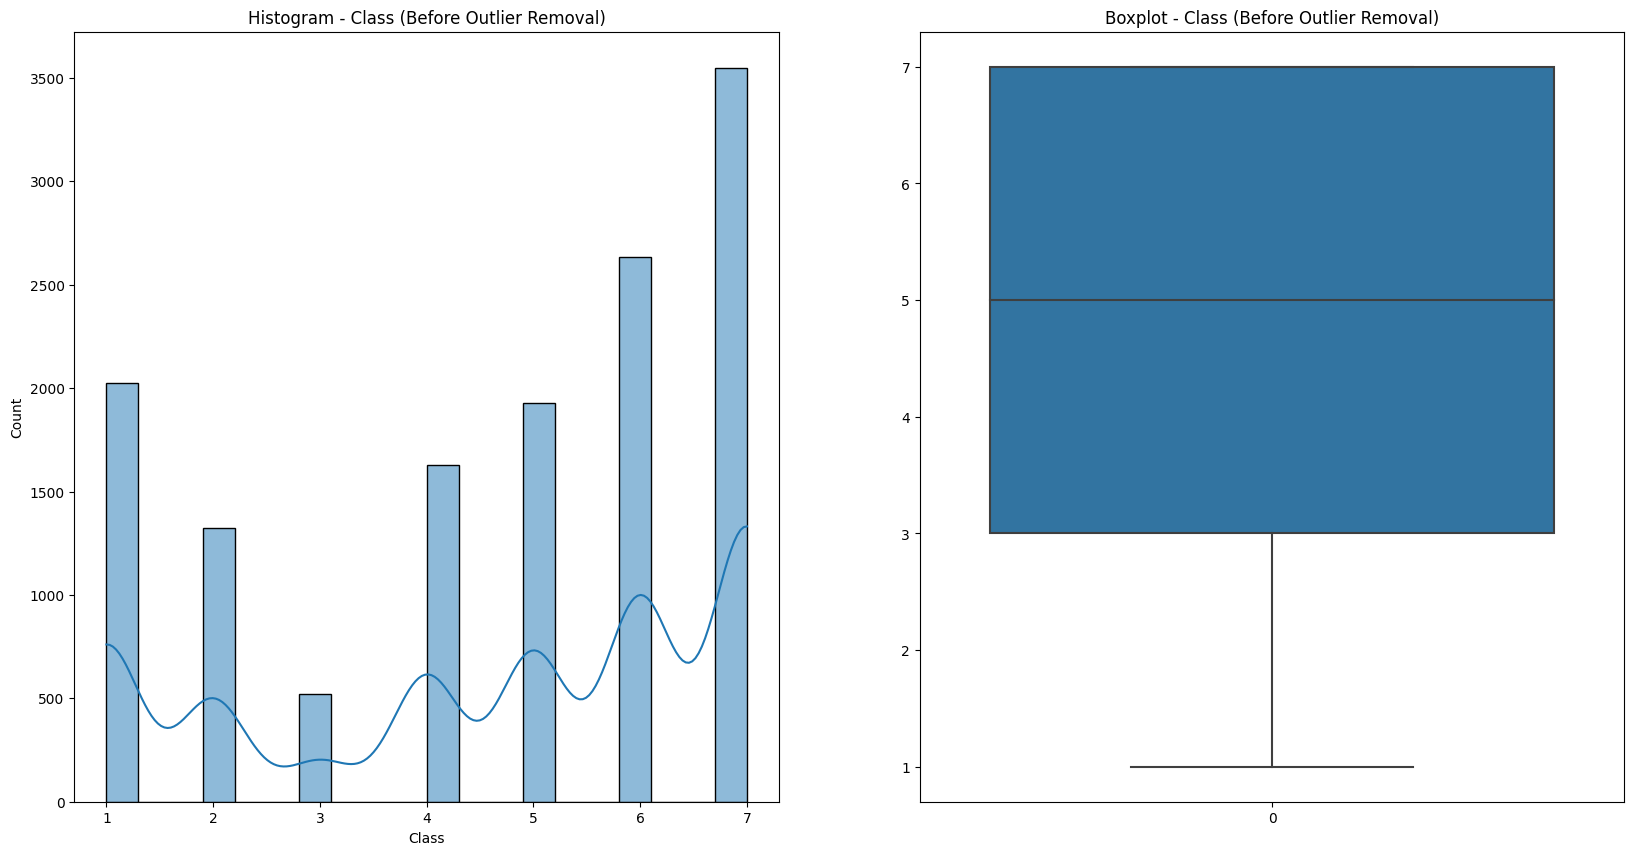

In [13]:
# Selecting only the numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Disable FutureWarnings temporarily
warnings.simplefilter(action='ignore', category=FutureWarning)

for col in numeric_cols:
    plt.figure(figsize=(20, 10))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram - {col} (Before Outlier Removal)')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot - {col} (Before Outlier Removal)')
    
    plt.show()

# Re-enable the FutureWarnings after plotting
warnings.simplefilter(action='default', category=FutureWarning)


#### This code will display histograms and boxplots for each numerical column, helping to visualize the distribution and detect outliers before performing any outlier removal. After plotting, the FutureWarnings are re-enabled to avoid unnecessary alerts.

#### **2.2.1.13** Visualize data imbalance

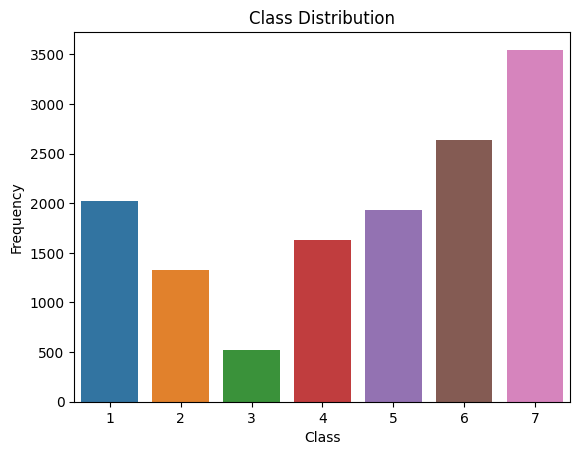

In [14]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### The dataset has a highly imbalanced class distribution across 7 classes. Techniques like resampling, SMOTE, or adjusting class weights can help address this imbalance.

### **2.2.2** Preprocessing

#### **2.2.2.1** Remove duplicate rows

In [15]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

#### This code removes duplicate rows from the DataFrame df and stores the cleaned data in df_cleaned.

#### **2.2.2.2** Verify duplicates are removed

In [16]:
# Verify duplicates are removed
print("\nCount of Duplicate Rows After Removing:")
print(df_cleaned.duplicated().sum())


Count of Duplicate Rows After Removing:
0


#### This code checks and prints the number of duplicate rows in the cleaned DataFrame df_cleaned, confirming that duplicates have been removed.

#### **2.2.2.3** Correlation matrix after removing high correlation

Highly Correlated Feature Pairs (Threshold > 0.9):
[('Area', 'Perimeter'), ('Area', 'MajorAxisLength'), ('Area', 'MinorAxisLength'), ('Area', 'ConvexArea'), ('Area', 'EquivDiameter'), ('Perimeter', 'MajorAxisLength'), ('Perimeter', 'MinorAxisLength'), ('Perimeter', 'ConvexArea'), ('Perimeter', 'EquivDiameter'), ('MajorAxisLength', 'ConvexArea'), ('MajorAxisLength', 'EquivDiameter'), ('MinorAxisLength', 'ConvexArea'), ('MinorAxisLength', 'EquivDiameter'), ('MinorAxisLength', 'ShapeFactor1'), ('AspectRation', 'Eccentricity'), ('AspectRation', 'Compactness'), ('AspectRation', 'ShapeFactor3'), ('Eccentricity', 'Compactness'), ('Eccentricity', 'ShapeFactor3'), ('ConvexArea', 'EquivDiameter'), ('Compactness', 'ShapeFactor3')]
Dropped features: {'Perimeter', 'Compactness', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'ShapeFactor1', 'Eccentricity', 'EquivDiameter', 'ShapeFactor3'}


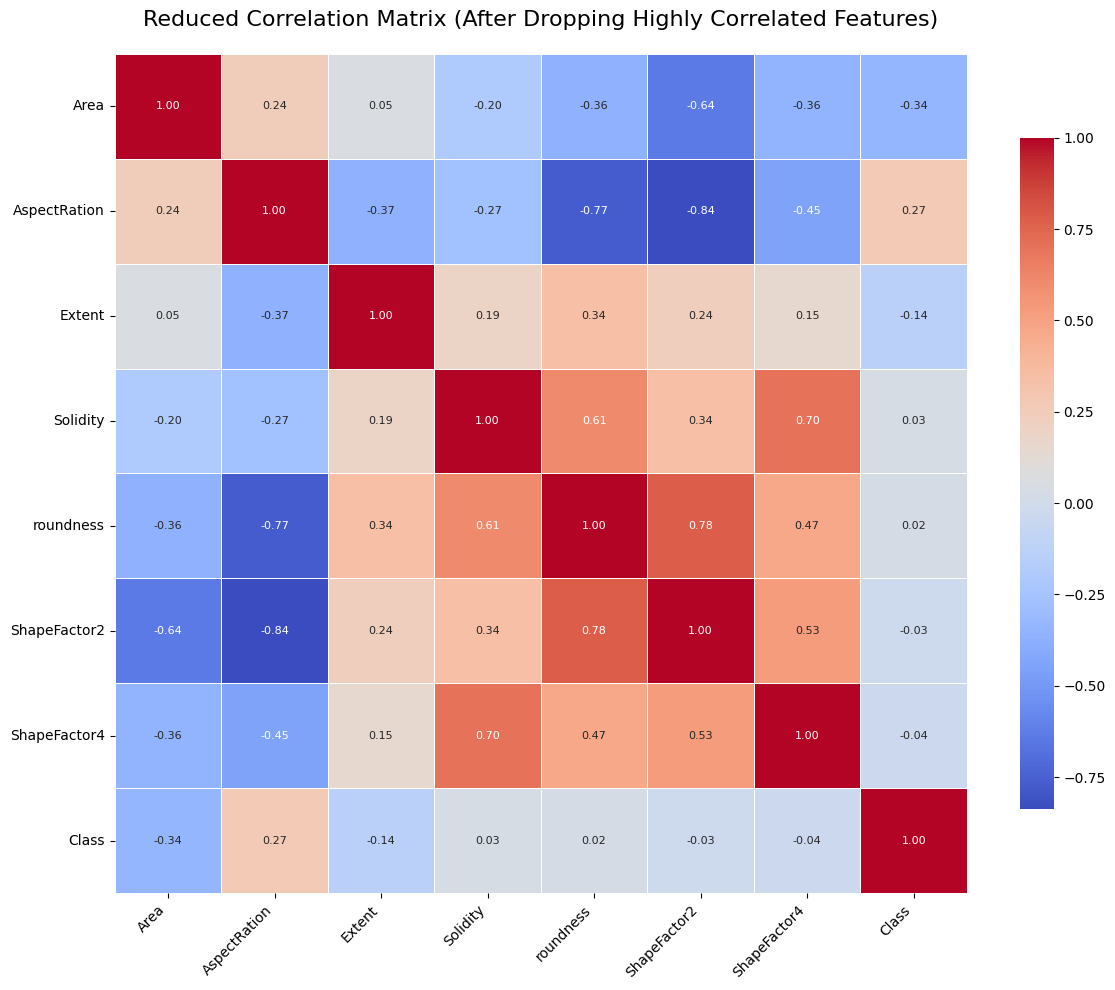

In [17]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set a threshold for high correlation
threshold = 0.9

# Identify highly correlated features
high_corr_var = np.where(np.abs(correlation_matrix) > threshold)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                   for x, y in zip(*high_corr_var) if x != y and x < y]

print("Highly Correlated Feature Pairs (Threshold > 0.9):")
print(high_corr_pairs)

# Drop one feature from each highly correlated pair
features_to_drop = set(pair[1] for pair in high_corr_pairs)
df_reduced = df.drop(columns=features_to_drop)

print(f"Dropped features: {features_to_drop}")

# Recompute the correlation matrix
reduced_corr_matrix = df_reduced.corr()

# Redraw the heatmap with reduced features
plt.figure(figsize=(12, 10))
sns.heatmap(
    reduced_corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    annot_kws={"size": 8}, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Reduced Correlation Matrix (After Dropping Highly Correlated Features)", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


#### Highly correlated features such as EquivDiameter, ShapeFactor1, MajorAxisLength, and Compactness were removed due to their redundancy with other features like Area and AspectRation. Retained features include unique and less correlated ones, preserving the most informative attributes for analysis while reducing multicollinearity.

#### **2.2.2.4** Dropping features based on high VIF values

In [18]:
# Define the function to calculate VIF
def calculate_vif(df):
    X = add_constant(df)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Feature"] != "const"]

# Dropping features iteratively based on high VIF values
threshold = 10
features_to_remove = []

while True:
    vif_df = calculate_vif(df)
    max_vif = vif_df["VIF"].max()
    if max_vif > threshold:
        feature_to_drop = vif_df.loc[vif_df["VIF"].idxmax(), "Feature"]
        features_to_remove.append(feature_to_drop)
        print(f"Dropping feature: {feature_to_drop} (VIF = {max_vif:.2f})")
        df = df.drop(columns=[feature_to_drop])
    else:
        break

print("\nFinal Features Retained:")
print(df.columns.tolist())

Dropping feature: EquivDiameter (VIF = 336203.58)
Dropping feature: Compactness (VIF = 316451.66)
Dropping feature: Area (VIF = 55141.85)
Dropping feature: MajorAxisLength (VIF = 4425.92)
Dropping feature: Perimeter (VIF = 1901.92)
Dropping feature: ShapeFactor3 (VIF = 1199.99)
Dropping feature: MinorAxisLength (VIF = 587.53)
Dropping feature: ShapeFactor2 (VIF = 116.14)
Dropping feature: AspectRation (VIF = 13.93)

Final Features Retained:
['Eccentricity', 'ConvexArea', 'Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor4', 'Class']


#### In this process, features with high Variance Inflation Factor (VIF) values, such as EquivDiameter, Compactness, and Area, were iteratively dropped to address multicollinearity. Features like Eccentricity, ConvexArea, and Extent were retained as they exhibited lower VIF values, ensuring the dataset is free from multicollinearity while preserving essential attributes for analysis.

#### **2.2.2.5** Variance Inflation Factor (VIF)

In [19]:
# Add constant for intercept term in regression
X = add_constant(df.drop(columns=['Class']))  # Assuming 'Class' is the target column

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        feature           VIF
0         const  82982.773883
1  Eccentricity      3.926171
2    ConvexArea      5.166144
3        Extent      1.209047
4      Solidity      3.372332
5     roundness      4.413916
6  ShapeFactor1      5.292099
7  ShapeFactor4      2.777129


#### After removing highly correlated features, the VIF values for the remaining features dropped significantly, with all falling below a threshold of 10. This indicates reduced multicollinearity, improving the dataset's suitability for regression analysis.

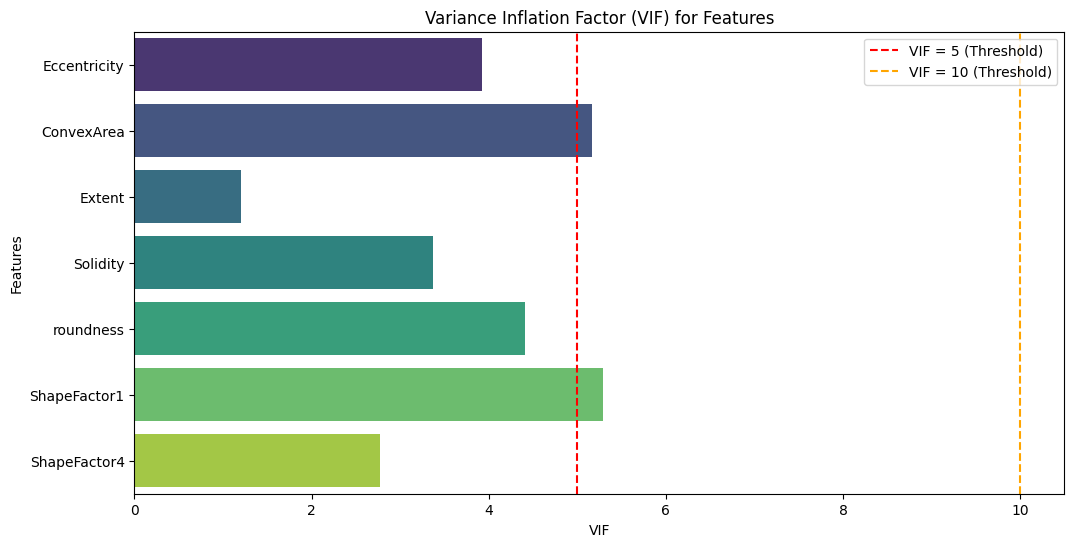

In [20]:
# Exclude the target variable 'Class' from the features
X = df.drop(columns=['Class'])

# Add constant for calculating VIF
X_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Remove the constant from the VIF data (we are only interested in the features)
vif_data = vif_data[vif_data['Feature'] != 'const']

# Plotting VIF
plt.figure(figsize=(12, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Features')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.axvline(x=5, color='r', linestyle='--', label='VIF = 5 (Threshold)')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10 (Threshold)')
plt.legend()
plt.show()


#### Some features have VIF values exceeding 5, indicating moderate multicollinearity. However, these features are retained to prevent underfitting, as their removal might exclude critical information essential for accurate model predictions.

#### **2.2.2.6** Handling outliers

In [21]:
# Selecting only the numerical columns, excluding the 'Class' column
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(['Class'])

# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Disable FutureWarnings temporarily
warnings.simplefilter(action='ignore', category=FutureWarning)

# Perform outlier removal within each class
filtered_df_list = []  # List to store filtered dataframes for each class

for class_value in df['Class'].unique():
    class_df = df[df['Class'] == class_value]  # Filter data for the current class

    for col in numeric_cols:
        # Calculate Q1, Q3, and IQR for the current class
        Q1 = class_df[col].quantile(0.25)
        Q3 = class_df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers for the current column within the class
        class_df = class_df[(class_df[col] >= lower_bound) & (class_df[col] <= upper_bound)]

    # Append the filtered class data to the list
    filtered_df_list.append(class_df)

# Concatenate all filtered class dataframes
df = pd.concat(filtered_df_list, ignore_index=True)

# Re-enable the FutureWarnings after filtering
warnings.simplefilter(action='default', category=FutureWarning)

# Check the distribution of your class labels
print(df['Class'].value_counts())

Class
7    3151
6    2354
1    1708
5    1603
4    1484
2    1170
3     457
Name: count, dtype: int64


#### Outliers were removed within each class using IQR-based filtering to maintain data consistency. The final dataset preserves class distributions, ensuring balanced representation for model training.

#### **2.2.2.7** Visualizations of dataset (Histogram)

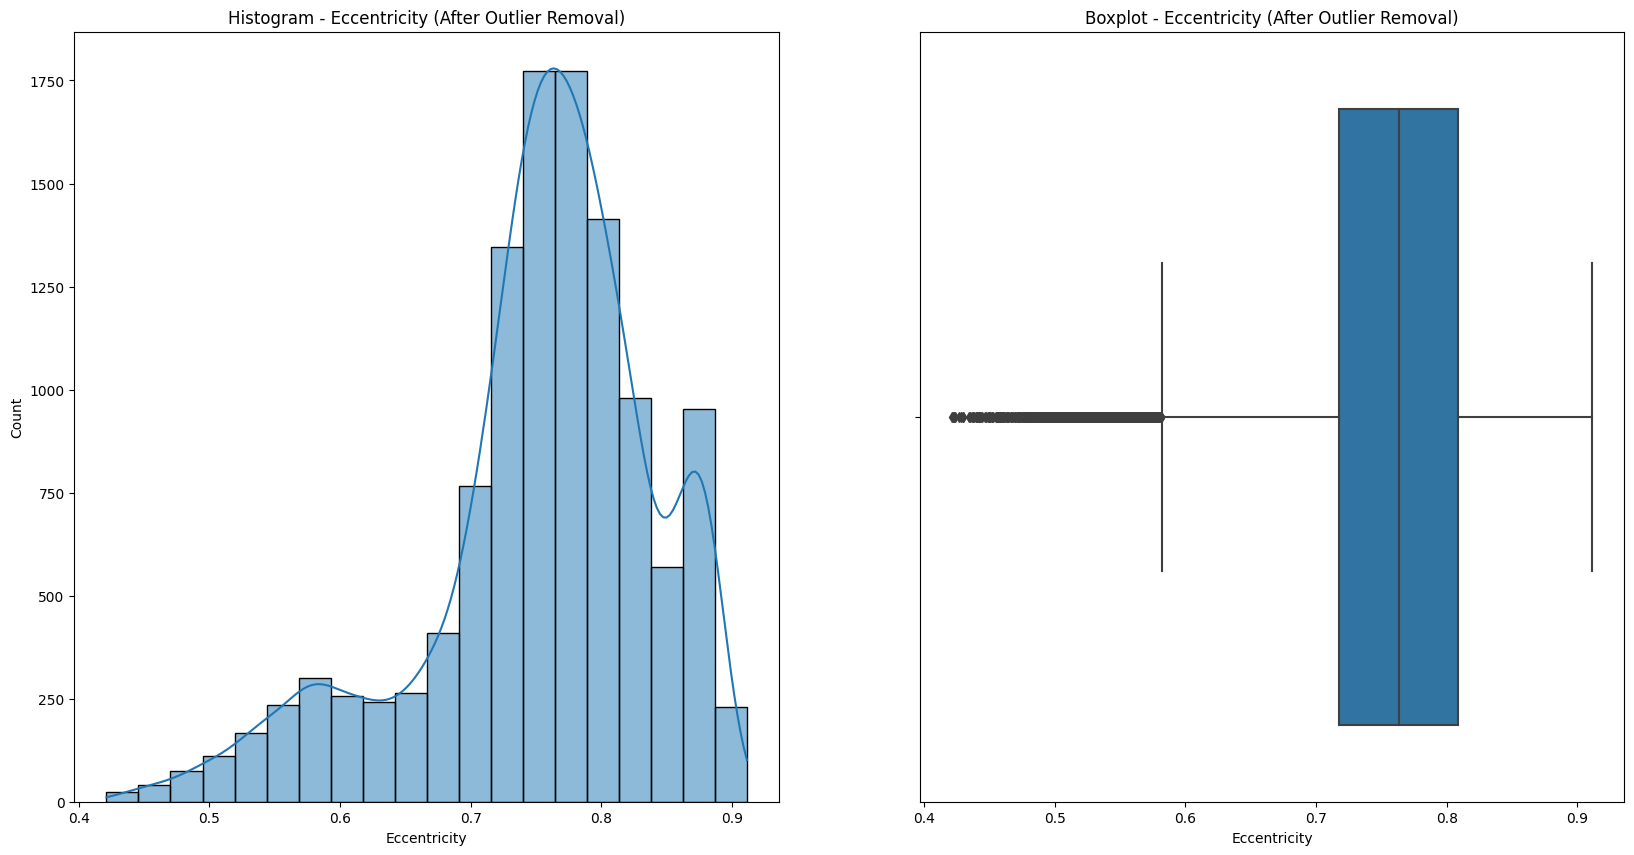

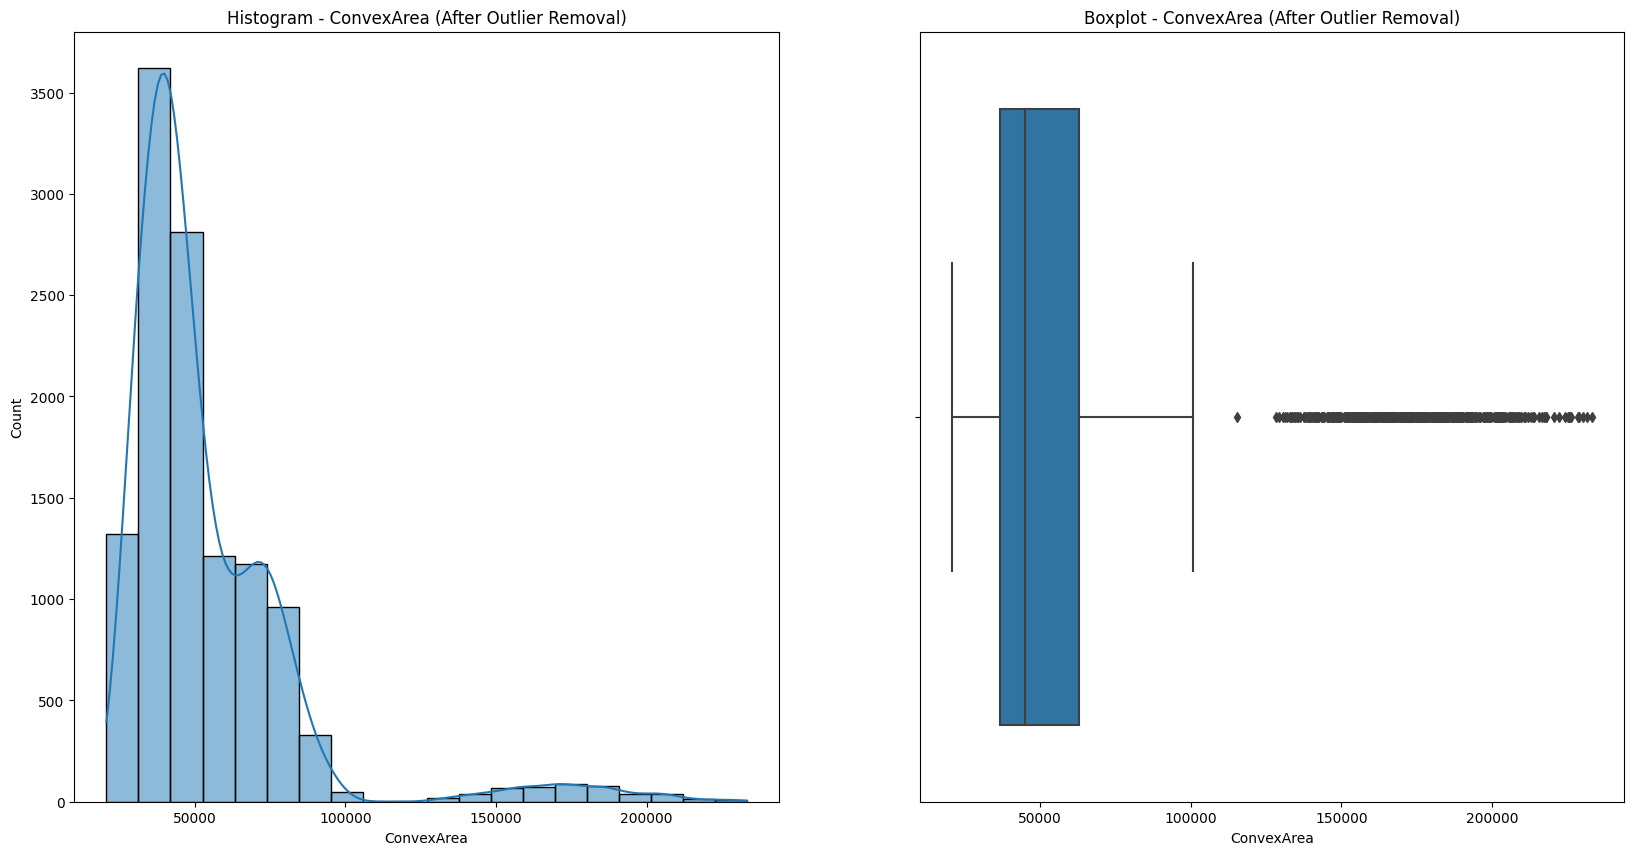

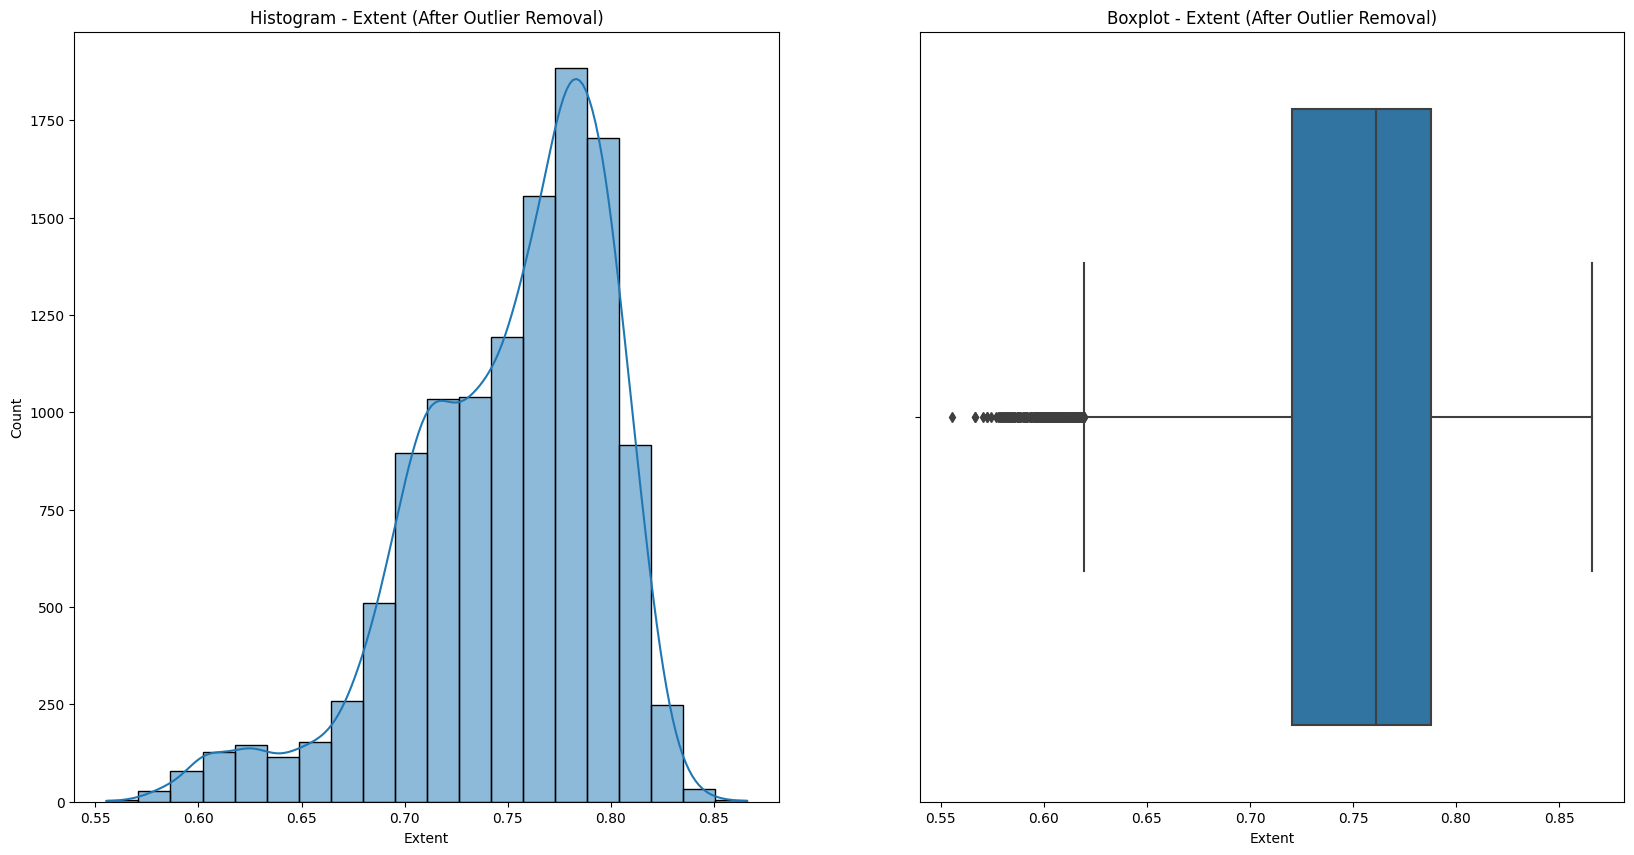

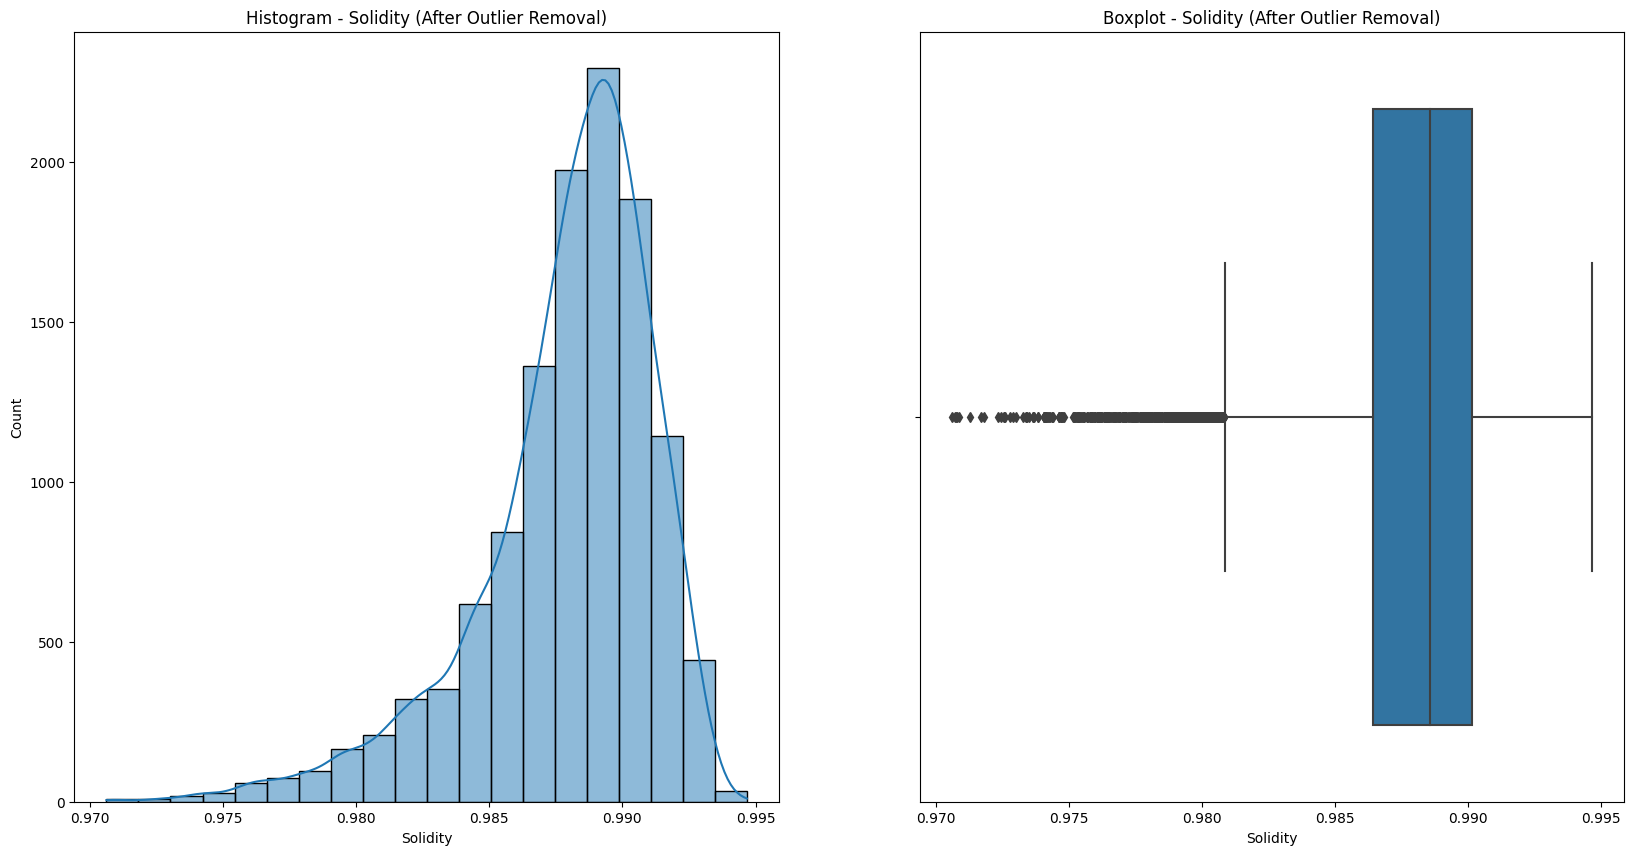

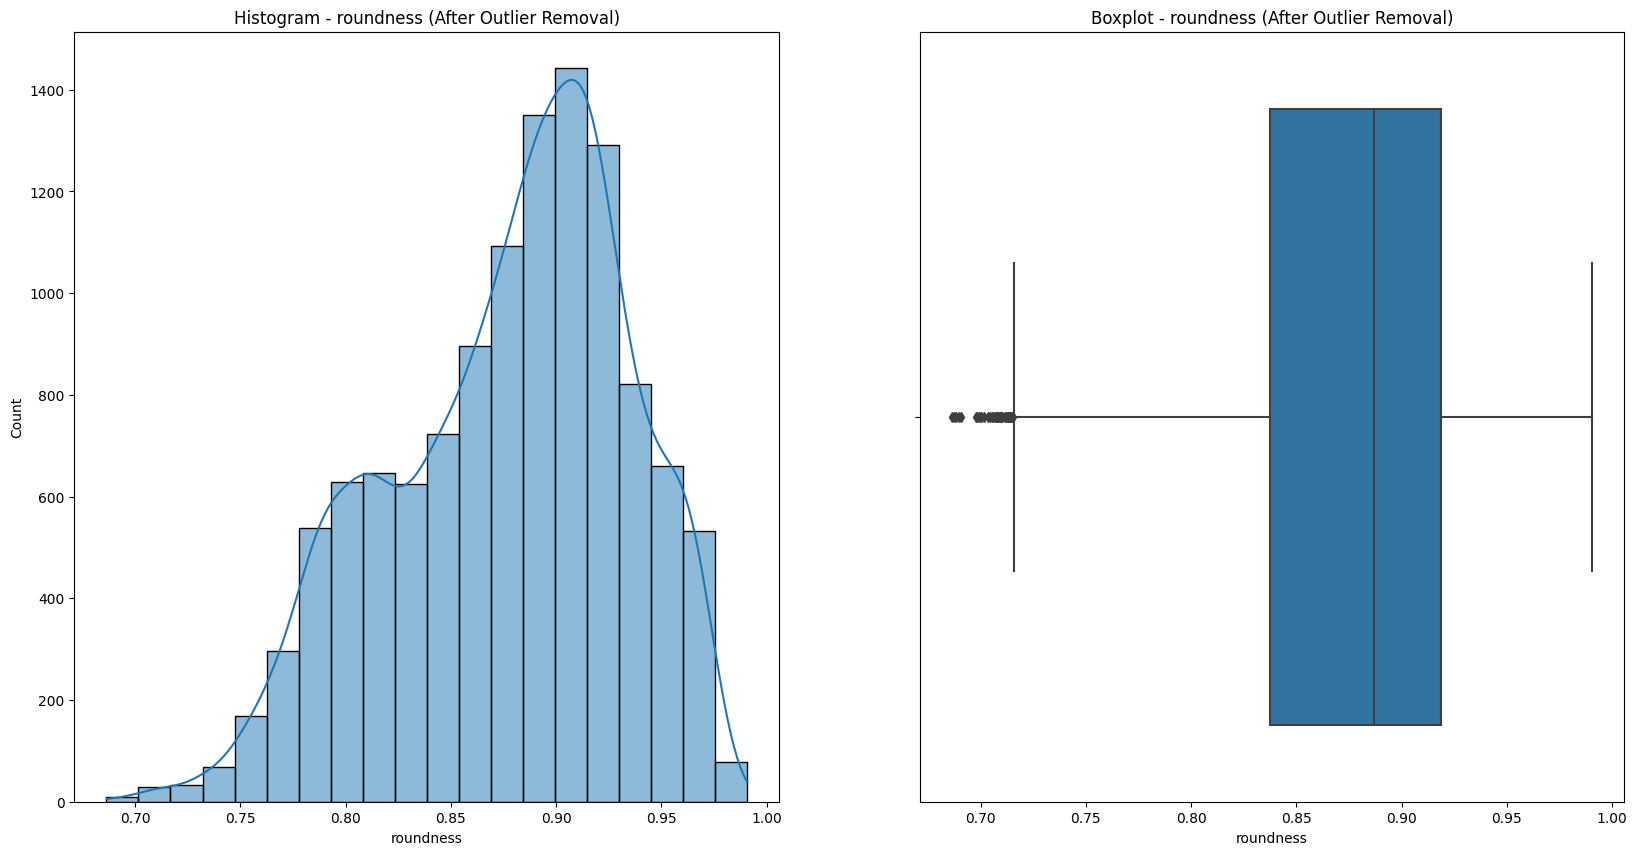

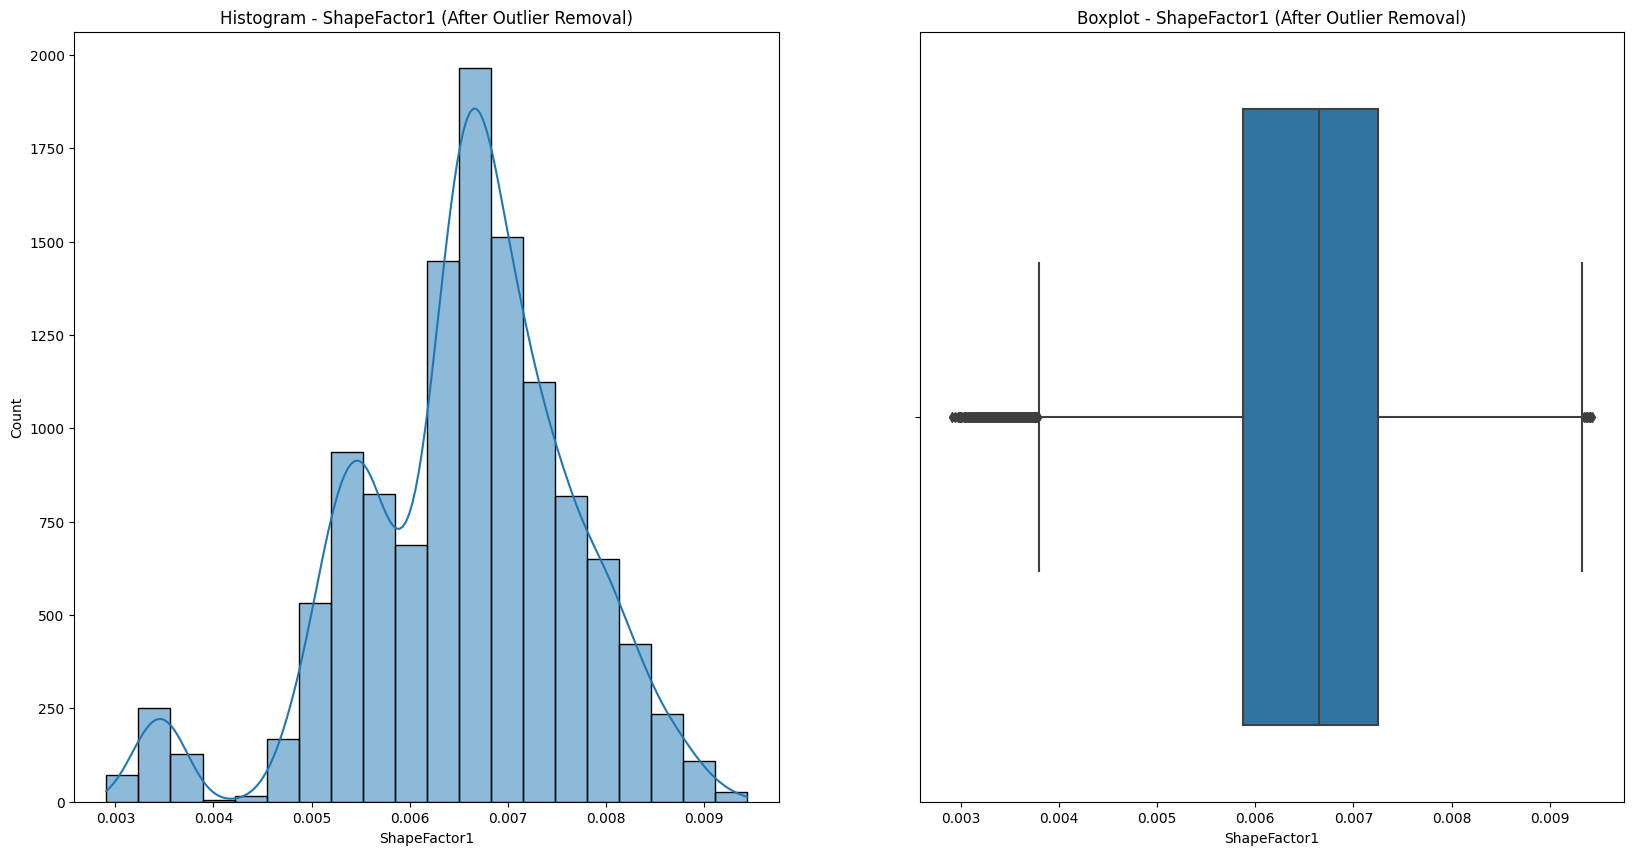

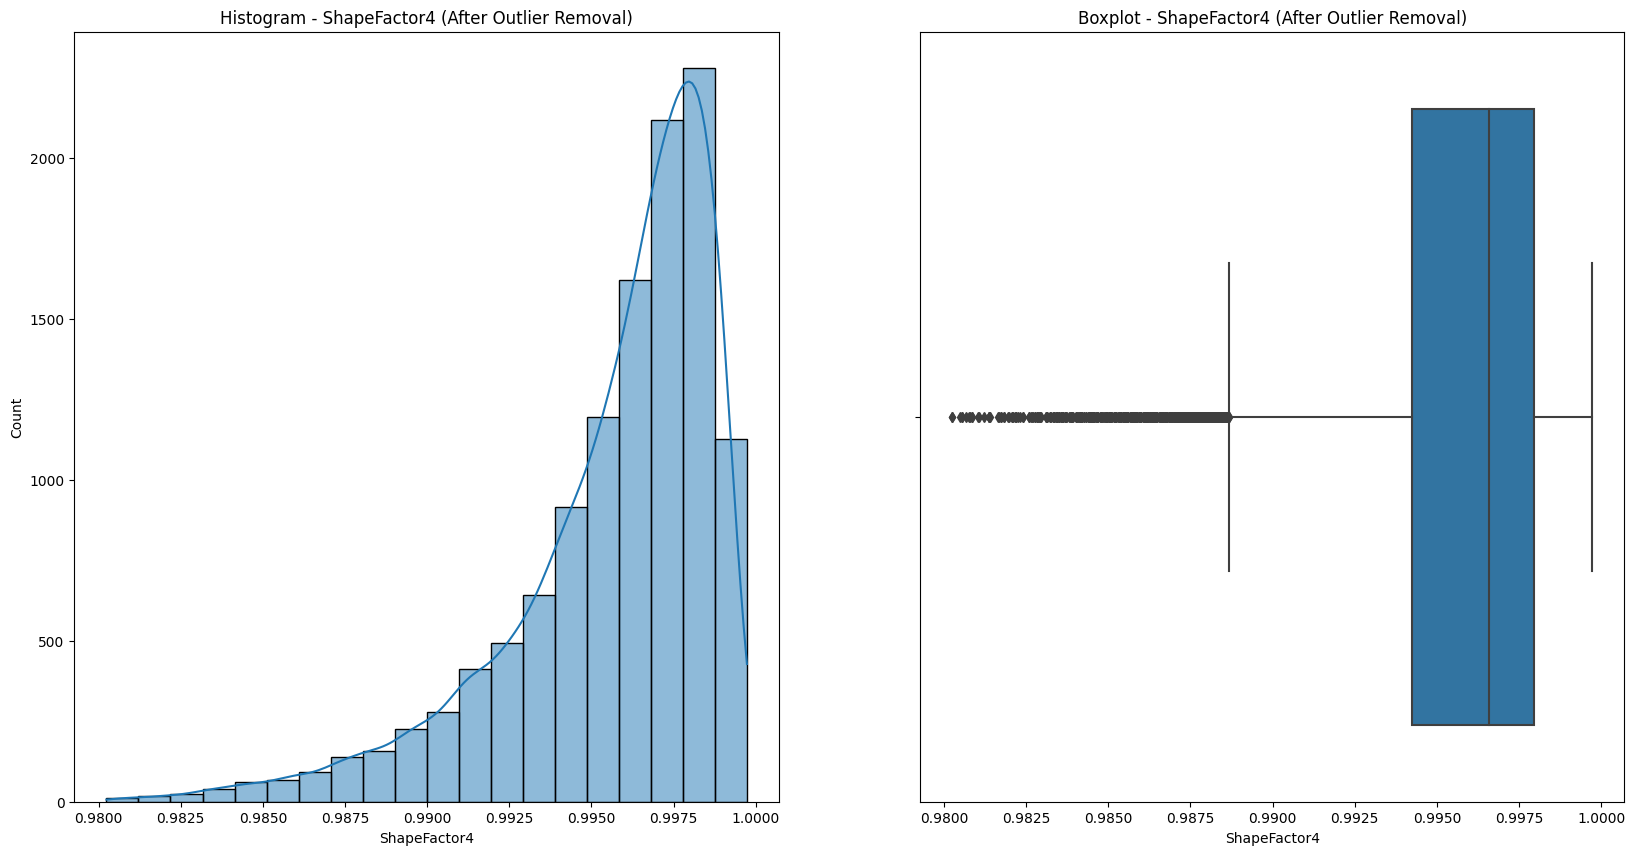

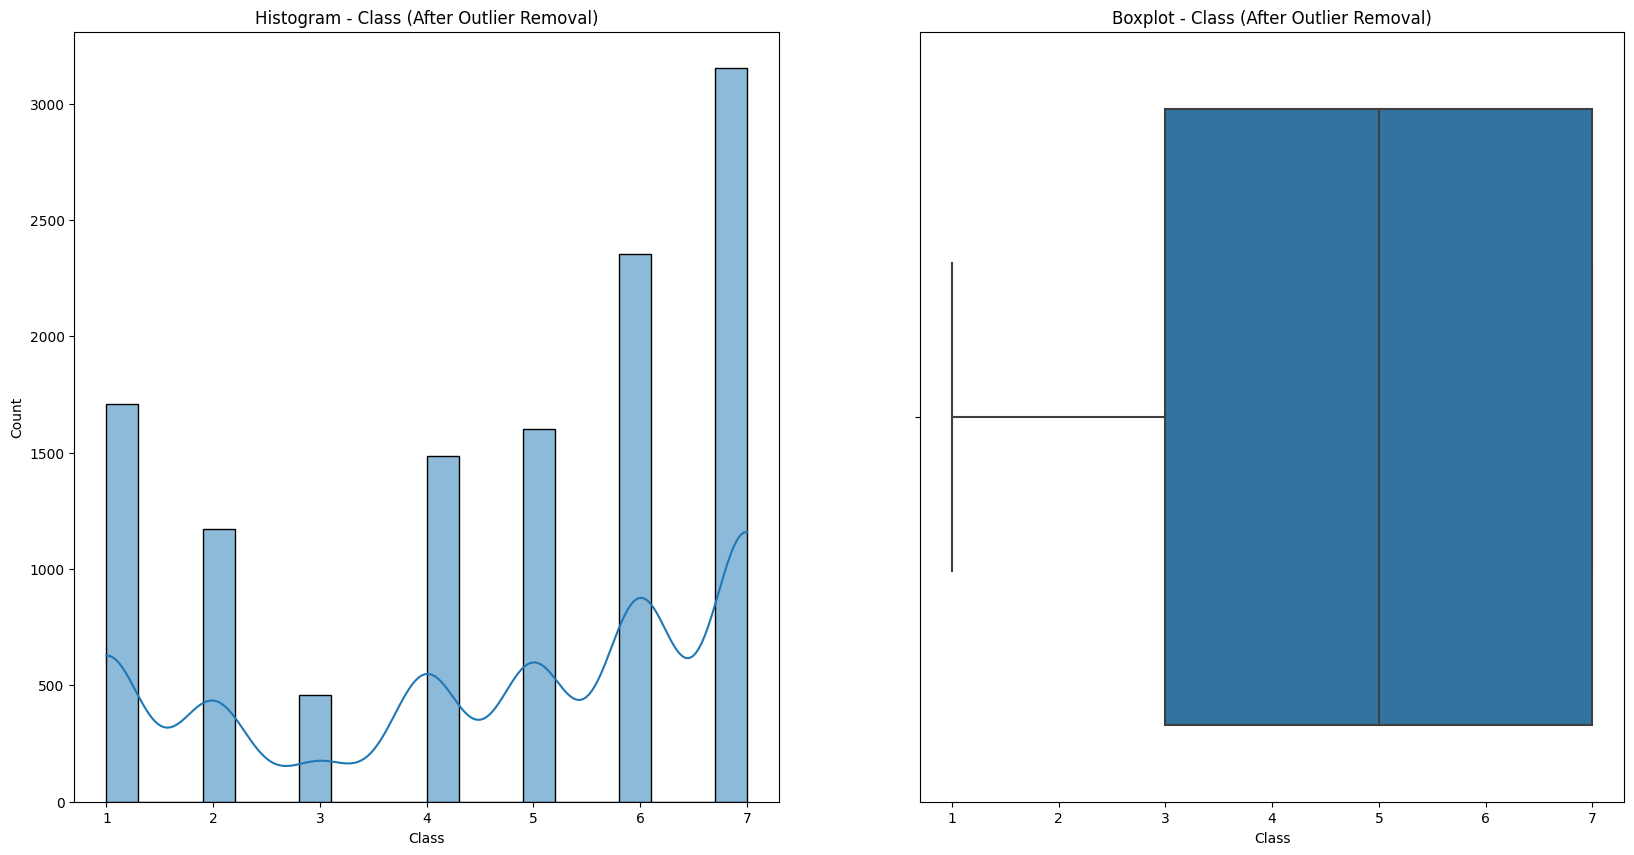

In [22]:
# Suppress the specific FutureWarning related to 'use_inf_as_na'
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version")

# Selecting only the numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Disable FutureWarnings temporarily
warnings.simplefilter(action='ignore', category=FutureWarning)

for col in numeric_cols:
    # Plotting after outlier removal
    plt.figure(figsize=(20, 10))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram - {col} (After Outlier Removal)')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col} (After Outlier Removal)')

    plt.show()

# Re-enable the FutureWarnings after plotting
warnings.simplefilter(action='default', category=FutureWarning)


#### This code removes infinite values, suppresses FutureWarnings, and plots histograms and boxplots for numerical columns to visualize data distributions and outliers.

#### **2.2.2.8** Fix class imbalance

In [23]:
# Assuming your DataFrame is named 'df' and the target column is 'Class'
# Separate features and target
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame (optional)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

# Check new class distribution
print(df_resampled['Class'].value_counts())

df = df_resampled

Class
1    3151
2    3151
3    3151
4    3151
5    3151
6    3151
7    3151
Name: count, dtype: int64


#### SMOTE was applied to balance the dataset by oversampling minority classes. The resulting dataset now has an equal class distribution, ensuring improved model training without bias.

#### **2.2.2.9** Check class balance

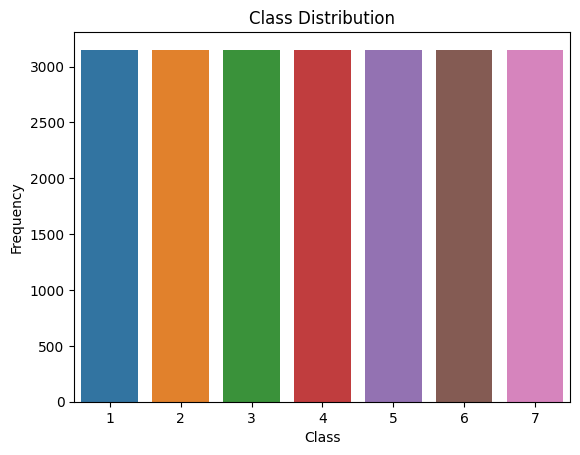

In [24]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### The code visualizes the distribution of the Class column in the dataset by creating a bar plot showing the frequency of each class. It helps identify class imbalances. All classes have same height indicating balance.

#### **2.2.2.10** Apply Z-score standardization 

In [26]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Select only the numerical columns, excluding the 'Class' column
numeric_cols = df.columns.difference(['Class'])

# Apply standardization to the numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Print the first few rows of the standardized dataframe
df

Eccentricity  ConvexArea    Extent  Solidity  roundness  ShapeFactor1  \
0         -2.186576   -0.890667  0.530524  0.588872   1.427281      0.915021   
1         -2.662009   -0.870925  0.478553  0.574817   1.357042      0.749938   
2         -2.736605   -0.865566  0.371243  0.533794   1.765671      0.719766   
3         -2.732996   -0.861293  0.390097  0.266553   1.539558      0.704838   
4         -2.288624   -0.859644  0.649900  0.947925   1.821349      0.768382   
...             ...         ...       ...       ...        ...           ...   
22052      0.089321   -0.528254 -0.396760 -0.499800   0.127988      0.440049   
22053     -0.381765   -0.575397 -0.831286 -0.286319   0.644489      0.381099   
22054     -0.400855   -0.593426 -0.349385  0.272140   0.582229      0.425597   
22055      0.092159   -0.651156  1.013325  0.153920   0.337571      0.750593   
22056      0.236671   -0.430953  0.965938  0.891543   0.344177      0.260529   

       ShapeFactor4  Class  
0          1.205772      1  
1          1.256553      1  
2          0.989778      1  
3          1.171900      1  
4          1.204277      1  
...             ...    ...  
22052     -0.497628      6  
22053     -0.181319      6  
22054     -0.706165      6  
22055      0.823247      6  
22056      0.334826      6  

[22057 rows x 8 columns]

#### The numerical features were standardized using StandardScaler to ensure a mean of 0 and a standard deviation of 1. This helps improve model performance by normalizing feature scales without affecting the target variable.

#### **2.2.2.11** Split into train and test

In [27]:
# Assuming df is your DataFrame and 'Class' is the target column
X = df.drop(columns=['Class'])  # Features (exclude the 'Class' column)
y = df['Class']  # Target variable ('Class' column)

# Split the data into training and testing sets (80-20 or 70-30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of the splits to verify
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 17645 rows
Test set size: 4412 rows


#### The dataset was split into training and testing sets using an 80-20 ratio, resulting in 17,645 rows for training and 4,412 rows for testing. This ensures sufficient data for model training and validation.

#### **2.2.2.12** Download cleaned dataset

In [28]:
# Save the DataFrame as a CSV file in the output directory
df.to_csv('/kaggle/working/updated_data_classification.csv', index=False)

#### Download the updated dataset

## **2.3** SVM Implementation

### **2.3.1** Linear SVM Classifier with GridSearchCV

In [29]:
# 1. Linear SVM Classifier with GridSearchCV

# Define the linear SVM model
linear_svm = SVC(kernel='linear')

# Set up the hyperparameter grid for C
param_grid_linear = {'C': [0.1, 1, 10, 100]}

# Perform GridSearchCV for linear SVM
grid_search_linear = GridSearchCV(linear_svm, param_grid_linear, cv=5, scoring='accuracy')
grid_search_linear.fit(X_train, y_train)

# Best parameters and score for linear SVM
print(f"Best parameters for linear SVM: {grid_search_linear.best_params_}")
print(f"Best cross-validation score for linear SVM: {grid_search_linear.best_score_}")

# Train the model with the best hyperparameters
best_linear_svm = grid_search_linear.best_estimator_

Best parameters for linear SVM: {'C': 10}
Best cross-validation score for linear SVM: 0.9688296967979598


#### The best parameters for the Linear SVM model were found to be C = 10, with the best cross-validation score of approximately 96.88%. This indicates a well-performing model with optimal regularization for the given data.

### **2.3.2** Non-Linear SVM (RBF kernel) Classifier with GridSearchCV

In [30]:
# 2. Non-Linear SVM (RBF kernel) Classifier with GridSearchCV

# Define the SVM model with RBF kernel
rbf_svm = SVC(kernel='rbf')

# Set up the hyperparameter grid for C and gamma
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.5, 1, 10]
}

# Perform GridSearchCV for non-linear SVM
grid_search_rbf = GridSearchCV(rbf_svm, param_grid_rbf, cv=5, scoring='accuracy')
grid_search_rbf.fit(X_train, y_train)

# Best parameters and score for RBF SVM
print(f"\nBest parameters for RBF SVM: {grid_search_rbf.best_params_}")
print(f"Best cross-validation score for RBF SVM: {grid_search_rbf.best_score_}")

# Train the model with the best hyperparameters
best_rbf_svm = grid_search_rbf.best_estimator_


Best parameters for RBF SVM: {'C': 1, 'gamma': 1}
Best cross-validation score for RBF SVM: 0.9701898554831396


#### The best parameters for the RBF SVM model were found to be C = 1 and gamma = 1, with the best cross-validation score of approximately 97.02%. This shows that the non-linear SVM with an RBF kernel is slightly better than the linear SVM model in terms of classification accuracy.

## **2.4** Model Evaluation

### **2.4.1** Linear SVM Classifier


Linear SVM Evaluation:
Accuracy: 0.9592021758839528 

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       595
           2       0.97      0.98      0.97       627
           3       1.00      1.00      1.00       600
           4       0.97      0.97      0.97       677
           5       0.99      0.99      0.99       635
           6       0.91      0.90      0.90       662
           7       0.90      0.91      0.90       616

    accuracy                           0.96      4412
   macro avg       0.96      0.96      0.96      4412
weighted avg       0.96      0.96      0.96      4412



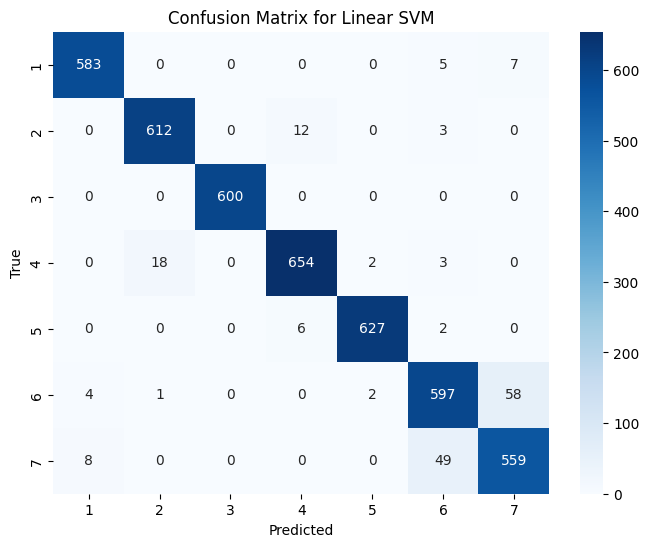

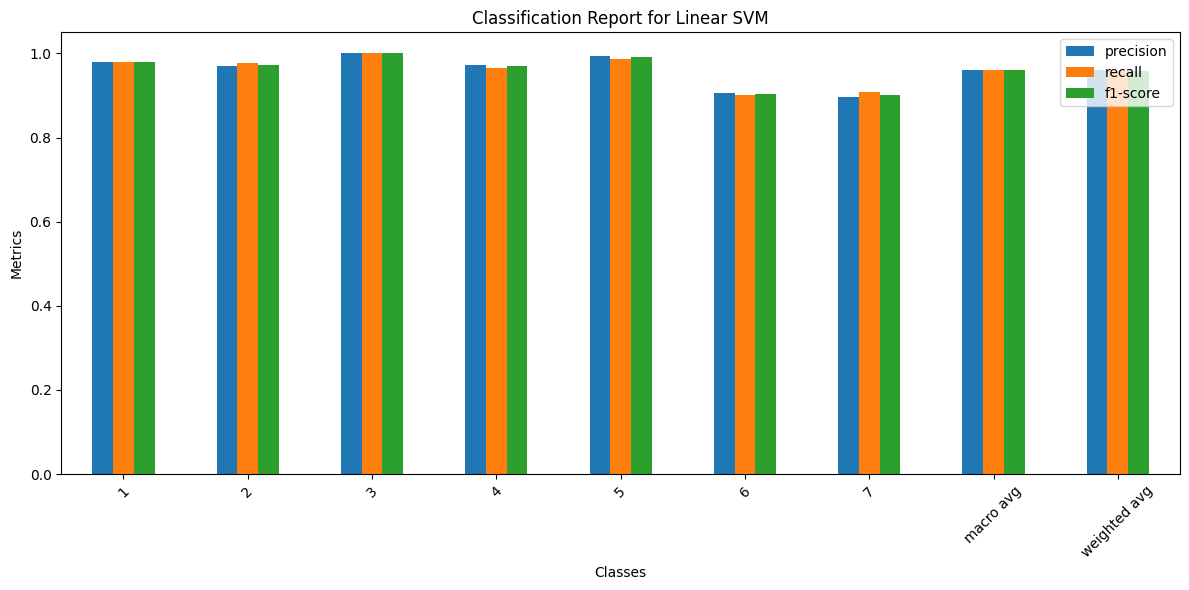

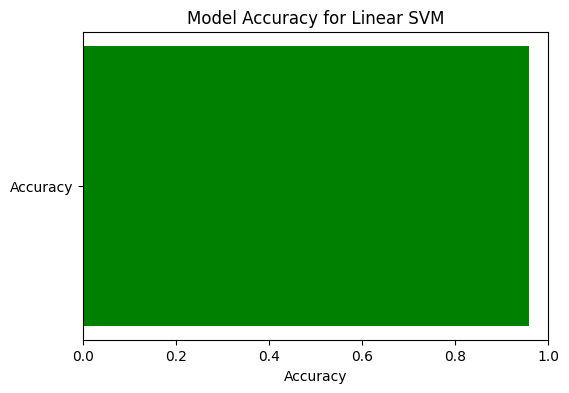

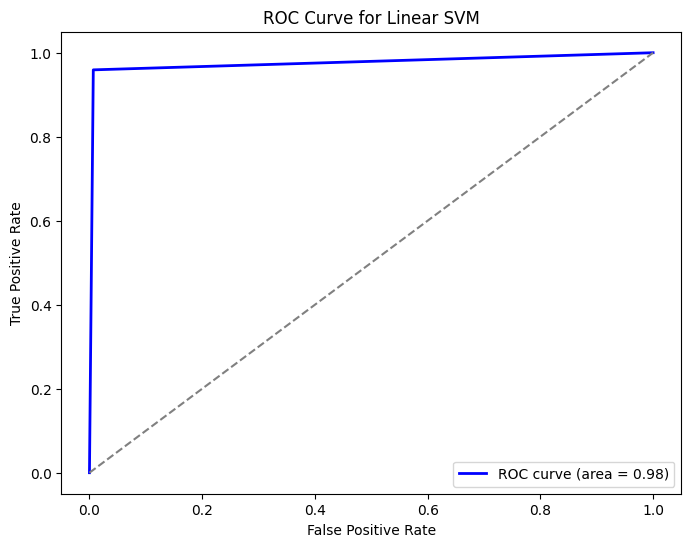


Macro-average ROC AUC score: 0.9764941633431581


In [31]:
# Evaluate the model on the test set
y_pred_linear = best_linear_svm.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_linear)
print("\nLinear SVM Evaluation:")
print(f"Accuracy: {accuracy} \n")

# Classification Report
print("Classification Report:")
classification_rep = classification_report(y_test, y_pred_linear)
print(classification_rep)

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_linear)

# Plotting confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Visualize the classification report as a bar plot
classification_rep_dict = classification_report(y_test, y_pred_linear, output_dict=True)
classification_df = pd.DataFrame(classification_rep_dict).transpose()

# Remove the 'accuracy' row for clarity (accuracy is a single metric and doesn't belong in the same plot)
classification_df = classification_df.drop('accuracy', axis=0)

# Plotting classification report as a bar plot
classification_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title('Classification Report for Linear SVM')
plt.xlabel('Classes')
plt.ylabel('Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, visualize the accuracy score
plt.figure(figsize=(6, 4))
plt.barh(['Accuracy'], [accuracy], color='green')
plt.xlabel('Accuracy')
plt.title('Model Accuracy for Linear SVM')
plt.xlim(0, 1)
plt.show()

# ROC-AUC Score (for multi-class problems, calculate macro-average ROC-AUC)

# Binarize the true labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred_linear, classes=np.unique(y_test))

# Compute the macro-average ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear SVM')
plt.legend(loc='lower right')
plt.show()

print(f"\nMacro-average ROC AUC score: {roc_auc}")

#### The Linear SVM model achieved an accuracy of 95.92% on the test set, with high precision, recall, and F1-scores across all classes. The macro and weighted averages also indicate strong performance, particularly for classes 3 and 5.

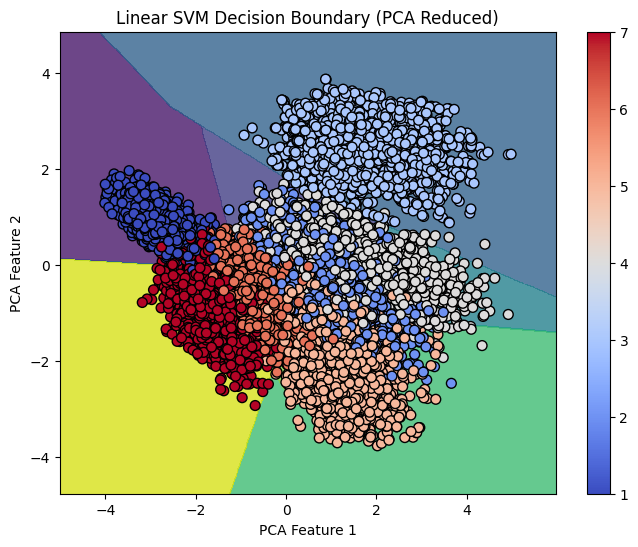

In [32]:
from sklearn.decomposition import PCA

# Suppress warnings
warnings.filterwarnings("ignore")

# Perform PCA to reduce features to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Create the mesh grid to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for every point in the mesh grid
Z = best_linear_svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
plt.title("Linear SVM Decision Boundary (PCA Reduced)")
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()

### **2.4.2** Non-Linear SVM (RBF kernel) Classifier


RBF SVM Evaluation:
Accuracy: 0.9637352674524026 

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       595
           2       0.99      0.98      0.98       627
           3       1.00      1.00      1.00       600
           4       0.98      0.99      0.98       677
           5       1.00      0.99      0.99       635
           6       0.91      0.91      0.91       662
           7       0.90      0.91      0.90       616

    accuracy                           0.96      4412
   macro avg       0.96      0.96      0.96      4412
weighted avg       0.96      0.96      0.96      4412



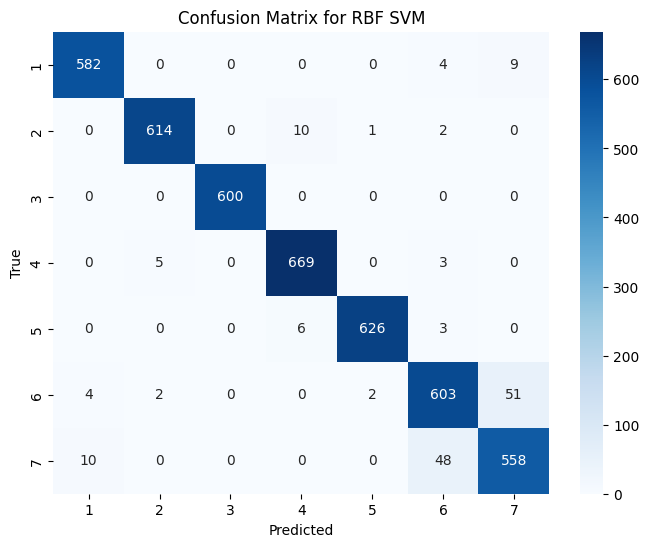

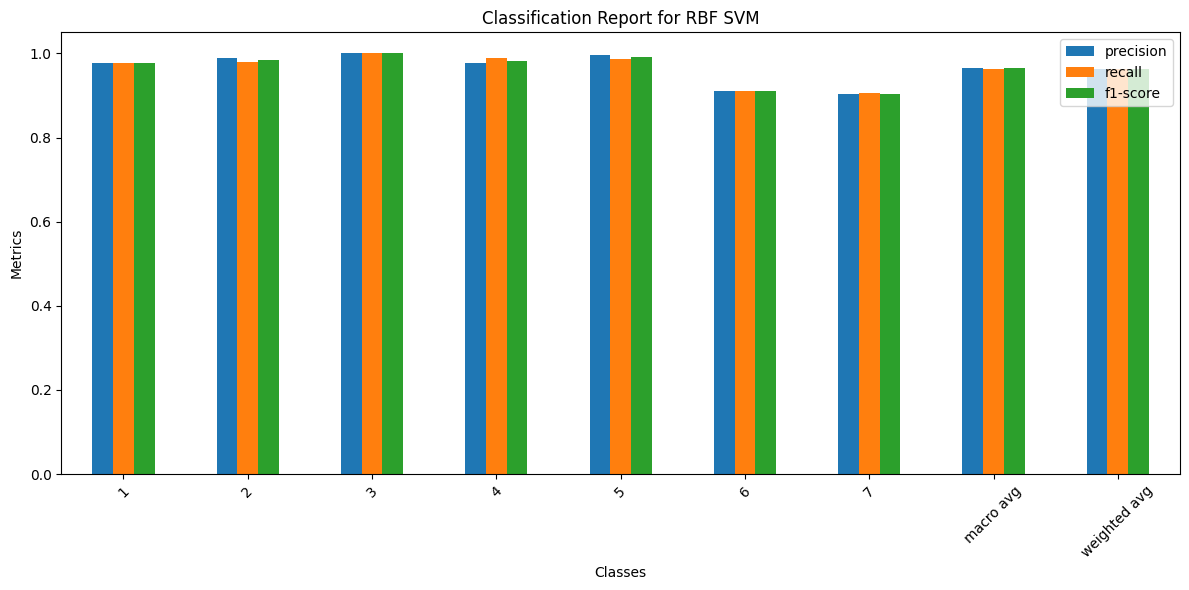

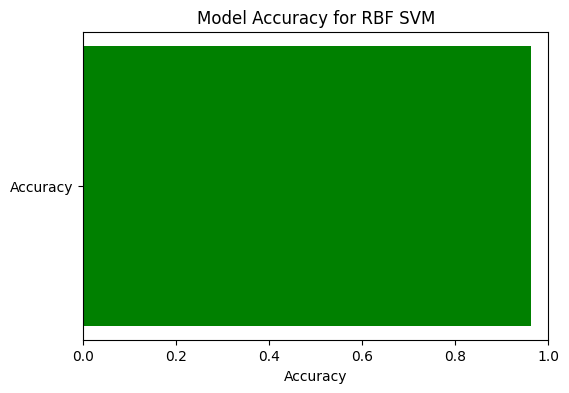

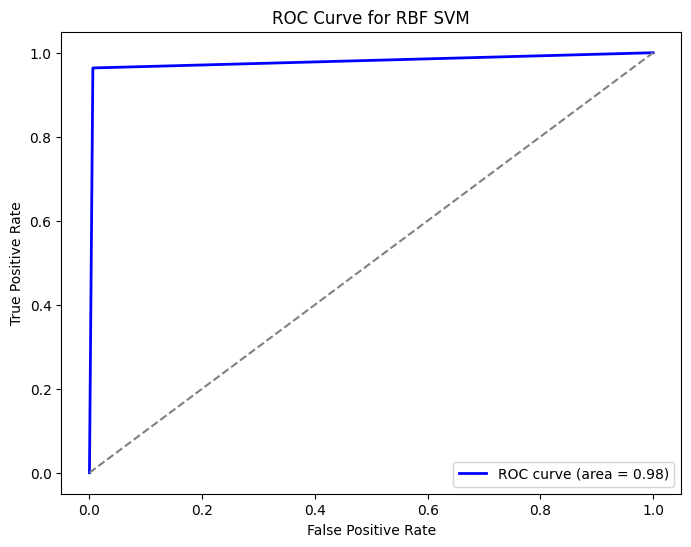


Macro-average ROC AUC score: 0.9789818876707937


In [33]:
# Evaluate the model on the test set
y_pred_rbf = best_rbf_svm.predict(X_test)

# Accuracy Score
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("\nRBF SVM Evaluation:")
print(f"Accuracy: {accuracy_rbf} \n")

# Classification Report
print("Classification Report:")
classification_rep_rbf = classification_report(y_test, y_pred_rbf)
print(classification_rep_rbf)

# Visualize the confusion matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Plotting confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Visualize the classification report as a bar plot
classification_rep_dict_rbf = classification_report(y_test, y_pred_rbf, output_dict=True)
classification_df_rbf = pd.DataFrame(classification_rep_dict_rbf).transpose()

# Remove the 'accuracy' row for clarity (accuracy is a single metric and doesn't belong in the same plot)
classification_df_rbf = classification_df_rbf.drop('accuracy', axis=0)

# Plotting classification report as a bar plot
classification_df_rbf[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title('Classification Report for RBF SVM')
plt.xlabel('Classes')
plt.ylabel('Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, visualize the accuracy score
plt.figure(figsize=(6, 4))
plt.barh(['Accuracy'], [accuracy_rbf], color='green')
plt.xlabel('Accuracy')
plt.title('Model Accuracy for RBF SVM')
plt.xlim(0, 1)
plt.show()

# Binarize the true labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred_rbf, classes=np.unique(y_test))

# Compute the macro-average ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RBF SVM')
plt.legend(loc='lower right')
plt.show()

print(f"\nMacro-average ROC AUC score: {roc_auc}")

#### The RBF SVM model achieved an accuracy of 96.37% on the test set, demonstrating strong performance across all classes. The classification report indicates high precision, recall, and F1-scores, particularly for classes 3 and 5. The ROC AUC score, which is 0.98, further reinforces the model's excellent ability to distinguish between classes.

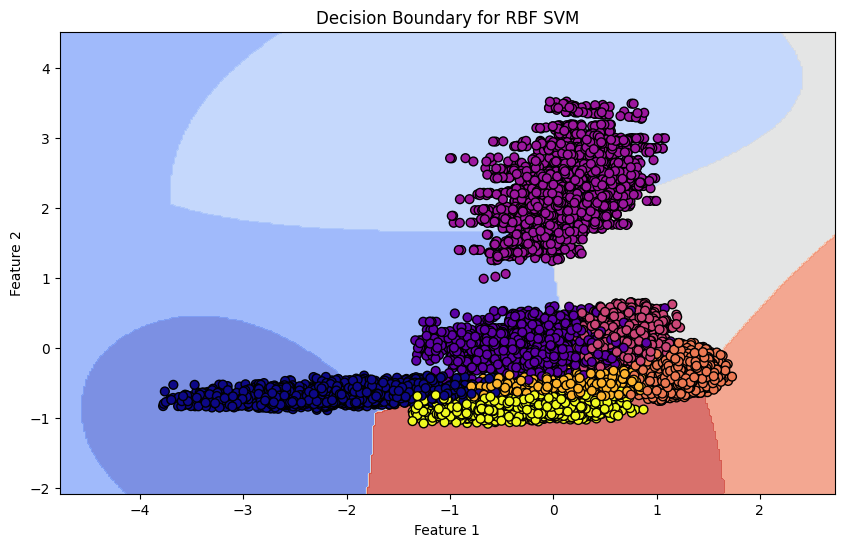

In [36]:
# Check if X_train is a DataFrame and convert it to a NumPy array if needed
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values  # Convert to NumPy array

# Ensure y_train is also a NumPy array
if isinstance(y_train, pd.Series):
    y_train = y_train.values  # Convert to NumPy array

# Train the RBF SVM model if not already trained
rbf_svm.fit(X_train, y_train)  # Train the model with the training data

# Create a meshgrid for plotting the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Assuming X_train has 7 features, create additional features for the mesh grid
remaining_features = X_train[:, 2:]  # All features except the first two
remaining_features_grid = np.tile(remaining_features.mean(axis=0), (xx.size, 1))  # Mean for simplicity

# Combine the mesh grid with the remaining features
mesh_points = np.c_[xx.ravel(), yy.ravel(), remaining_features_grid]

# Predict the class labels for each point in the mesh grid
Z = rbf_svm.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))

# Plot the contour for the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap="coolwarm")

# Scatter plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap="plasma", s=40)
plt.title("Decision Boundary for RBF SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### **2.4.3** K-fold Validation

#### **2.4.3.1** Linear SVM Classifier

Cross-validation scores (Linear SVM): [0.96656277 0.97534712 0.96599603 0.96599603 0.9679796 ]
Mean cross-validation accuracy (Linear SVM): 0.9683763105695664
Standard deviation of cross-validation accuracy (Linear SVM): 0.0035600563954750974 



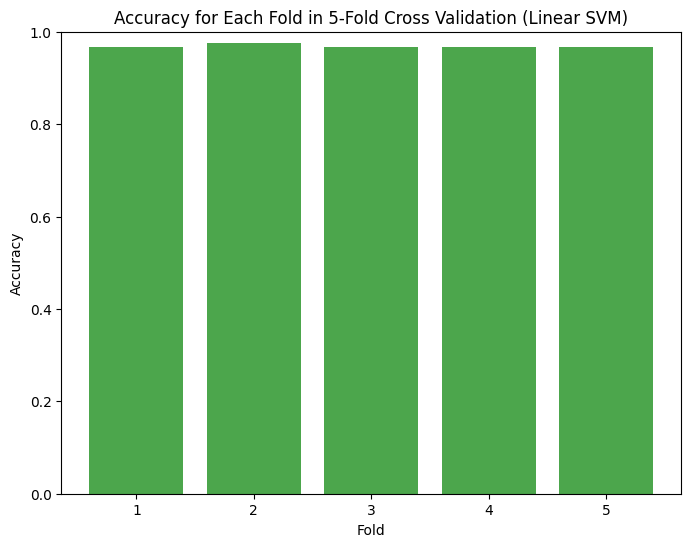

In [37]:
# Create an instance of the Linear SVM
linear_svm = SVC(kernel='linear', C=1)

# Perform 5-fold cross-validation
cv_scores_linear = cross_val_score(linear_svm, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores (Linear SVM): {cv_scores_linear}")
print(f"Mean cross-validation accuracy (Linear SVM): {np.mean(cv_scores_linear)}")
print(f"Standard deviation of cross-validation accuracy (Linear SVM): {np.std(cv_scores_linear)} \n")

# Optionally, visualize the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores_linear, color='green', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Fold in 5-Fold Cross Validation (Linear SVM)')
plt.xticks(range(1, 6))
plt.ylim(0, 1)
plt.show()

#### We perform 5-fold cross-validation on the Linear SVM classifier to assess its generalization ability. The results show the accuracy for each fold, with a mean accuracy of approximately 96.84% and a low standard deviation of 0.36%, indicating stable performance.

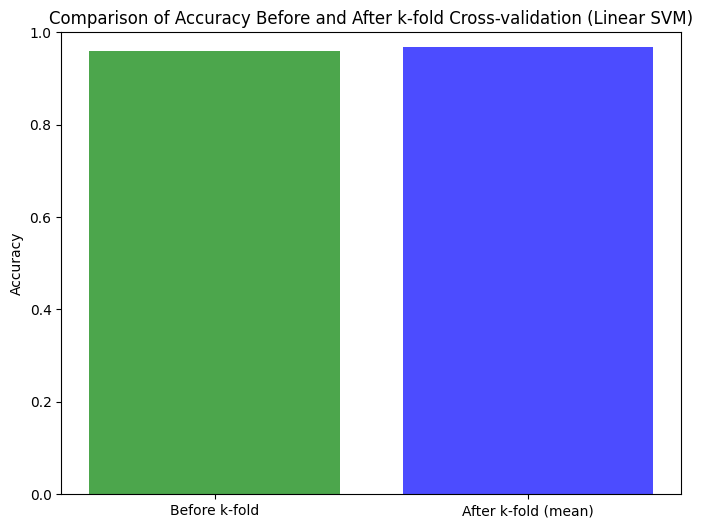

Accuracy before k-fold: 0.9589755213055303
Accuracy after k-fold (mean): 0.9683763105695664


In [38]:
# Create and train the Linear SVM model
linear_svm = SVC(kernel='linear', C=1)

# Train the model on the full training data
linear_svm.fit(X_train, y_train)

# 1. Accuracy before k-fold cross-validation (on the test set)
y_pred_before_kfold = linear_svm.predict(X_test)
accuracy_before_kfold = accuracy_score(y_test, y_pred_before_kfold)

# 2. Accuracy after k-fold cross-validation
cv_scores_linear = cross_val_score(linear_svm, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores_linear)

# Plotting the comparison of accuracies
plt.figure(figsize=(8, 6))
accuracies = [accuracy_before_kfold, mean_cv_accuracy]
labels = ['Before k-fold', 'After k-fold (mean)']

plt.bar(labels, accuracies, color=['green', 'blue'], alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Before and After k-fold Cross-validation (Linear SVM)')
plt.ylim(0, 1)
plt.show()

# Print the accuracy values
print(f"Accuracy before k-fold: {accuracy_before_kfold}")
print(f"Accuracy after k-fold (mean): {mean_cv_accuracy}")


#### Before applying K-fold cross-validation, the accuracy of the Linear SVM model on the test set was 95.90%. After performing 5-fold cross-validation, the model's mean accuracy improved to 96.84%, demonstrating more reliable generalization across different subsets of the data.

#### **2.4.3.2** Non-Linear SVM (RBF kernel) Classifier

Cross-validation scores (RBF SVM): [0.96854633 0.97506376 0.9662794  0.96769623 0.96854633]
Mean cross-validation accuracy (RBF SVM): 0.9692264097478039
Standard deviation of cross-validation accuracy (RBF SVM): 0.003034005965276102 



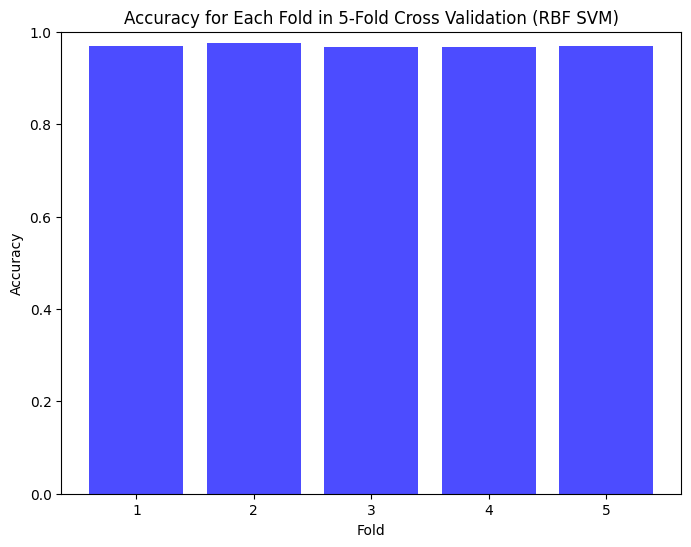

In [39]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')

# Perform 5-fold cross-validation
cv_scores_rbf = cross_val_score(rbf_svm, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores (RBF SVM): {cv_scores_rbf}")
print(f"Mean cross-validation accuracy (RBF SVM): {np.mean(cv_scores_rbf)}")
print(f"Standard deviation of cross-validation accuracy (RBF SVM): {np.std(cv_scores_rbf)} \n")

# Optionally, visualize the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores_rbf, color='blue', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Fold in 5-Fold Cross Validation (RBF SVM)')
plt.xticks(range(1, 6))
plt.ylim(0, 1)
plt.show()

#### Before applying K-fold cross-validation, the accuracy of the Linear SVM model on the test set was 95.90%. After performing 5-fold cross-validation, the model's mean accuracy improved to 96.84%, demonstrating a more reliable generalization across different subsets of the data. This indicates that K-fold cross-validation helped the model perform better by averaging the performance over multiple folds, reducing variance in the evaluation.

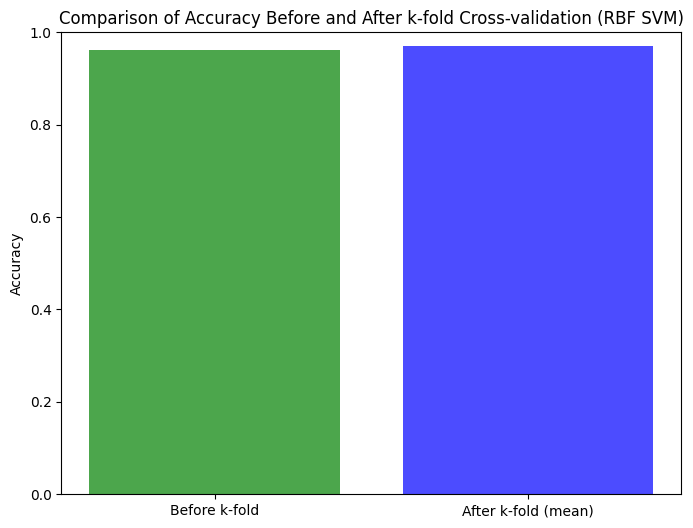

Accuracy before k-fold (RBF SVM): 0.9614687216681777
Accuracy after k-fold (mean) (RBF SVM): 0.9692264097478039


In [40]:
# Create and train the RBF SVM model
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')

# Train the model on the full training data
rbf_svm.fit(X_train, y_train)

# 1. Accuracy before k-fold cross-validation (on the test set)
y_pred_before_kfold_rbf = rbf_svm.predict(X_test)
accuracy_before_kfold_rbf = accuracy_score(y_test, y_pred_before_kfold_rbf)

# 2. Accuracy after k-fold cross-validation
cv_scores_rbf = cross_val_score(rbf_svm, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy_rbf = np.mean(cv_scores_rbf)

# Plotting the comparison of accuracies
plt.figure(figsize=(8, 6))
accuracies_rbf = [accuracy_before_kfold_rbf, mean_cv_accuracy_rbf]
labels_rbf = ['Before k-fold', 'After k-fold (mean)']

plt.bar(labels_rbf, accuracies_rbf, color=['green', 'blue'], alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Before and After k-fold Cross-validation (RBF SVM)')
plt.ylim(0, 1)
plt.show()

# Print the accuracy values
print(f"Accuracy before k-fold (RBF SVM): {accuracy_before_kfold_rbf}")
print(f"Accuracy after k-fold (mean) (RBF SVM): {mean_cv_accuracy_rbf}")


#### Before applying K-fold cross-validation, the accuracy of the RBF SVM model on the test set was 96.15%. After performing 5-fold cross-validation, the model's mean accuracy improved to 96.92%, showing better consistency and generalization across different subsets of the data. This suggests that K-fold cross-validation helped enhance the model's performance by providing a more stable estimate of its accuracy.

# **3.** Regression Task

## **3.1** Dataset Overview (Theme Park Visitor Count Dataset)

## **3.2** Data Exploration and Preprocessing

### **3.2.1** Data Exploration

#### **3.2.1.1** Imports

In [41]:
# Core Libraries
import pandas as pd
import numpy as np
import warnings

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    RandomizedSearchCV
)
from sklearn.preprocessing import (
    StandardScaler, 
    LabelEncoder, 
    label_binarize
)
from sklearn.linear_model import (
    LinearRegression, 
    LogisticRegression
)
from sklearn.svm import (
    SVC, 
    SVR
)
from sklearn.ensemble import (
    RandomForestClassifier, 
    RandomForestRegressor
)
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve, 
    mean_absolute_error, 
    mean_squared_error, 
    r2_score, 
    make_scorer
)

# Statistical Models
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Imbalanced Learning
from imblearn.over_sampling import SMOTE

# Deep Learning
import tensorflow as tf
from tensorflow import keras

# Additional Libraries
from scipy.stats import skew

# Suppress Warnings
warnings.filterwarnings("ignore")

#### **3.2.1.2** Display dataset rows

In [42]:
# Specify the path to the dataset
file_path_ = '/kaggle/input/theme-park-visitor-count-dataset/theme_park_visitor_count_dataset.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path_)

# Display the dataset
df

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  01/01/2011       1   0     1   0        0        6   
1            2  01/01/2011       1   0     1   1        0        6   
2            3  01/01/2011       1   0     1   2        0        6   
3            4  01/01/2011       1   0     1   3        0        6   
4            5  01/01/2011       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  31/12/2012       1   1    12  19        0        1   
17375    17376  31/12/2012       1   1    12  20        0        1   
17376    17377  31/12/2012       1   1    12  21        0        1   
17377    17378  31/12/2012       1   1    12  22        0        1   
17378    17379  31/12/2012       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

#### The code loads a theme park visitor count dataset from a CSV file into a pandas DataFrame and displays the first few rows of the dataset, which contains columns like date, temperature, humidity, and visitor counts.

#### **3.2.1.3** Display dataset shape

In [43]:
# Display dataset shape (number of rows and columns)
print("\nDataset Shape:")
print(df.shape)


Dataset Shape:
(17379, 17)


#### The code prints the shape of the dataset, which has 17,379 rows and 17 columns, providing an overview of the dataset's dimensions.

#### **3.2.1.4** Display column names

In [44]:
# Display columns line by line
for column in df.columns:
    print(column)

instant
dteday
season
yr
mnth
hr
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


#### The code iterates through the dataset's columns and displays each column name line by line. The output shows all 17 column names.

#### **3.2.1.5** Display column data types

In [45]:
# Display data type of each column
print(df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


#### The code outputs the data types of each column in the dataset, indicating that most columns are integers (int64) or floats (float64), with the exception of dteday, which is an object type.

#### **3.2.1.6** Display missing values

In [46]:
# Display the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### The code displays the number of missing values in each column of the dataset, showing that there are no missing values in any of the columns, as all values are zero.

#### **3.2.1.7** Display summary of statistics

In [47]:
# Summary statistics for numerical columns
print("Summary Statistics (Numerical Columns):")
df.describe()

Summary Statistics (Numerical Columns):


instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

#### The summary statistics provide an overview of the distribution of numerical columns, including the mean, standard deviation, minimum, and maximum values for each feature in the dataset.

#### **3.2.1.8** Display unique values

In [48]:
# Number of unique values in each column
print("\nNumber of Unique Values per Column:")
print(df.nunique())


Number of Unique Values per Column:
instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64


#### The output shows the number of unique values for each column in the dataset. For example, the instant column has 17,379 unique values (one for each row), while columns like season, yr, and weathersit have fewer unique values, indicating categorical features with limited possible outcomes.

#### **3.2.1.9** Display duplicates

In [49]:
# Check for duplicate rows
print("\nCount of Duplicate Rows:")
print(df.duplicated().sum())


Count of Duplicate Rows:
0


#### The output indicates that there are no duplicate rows in the dataset, as the count of duplicate rows is 0. This ensures that each record in the dataset is unique.

#### **3.2.1.10** Correlation matrix

In [50]:
df = df.drop(columns=['dteday'])

#### The column dteday is dropped from the DataFrame as it has an object data type, representing dates as strings, which are not necessary for numerical analysis or machine learning tasks.

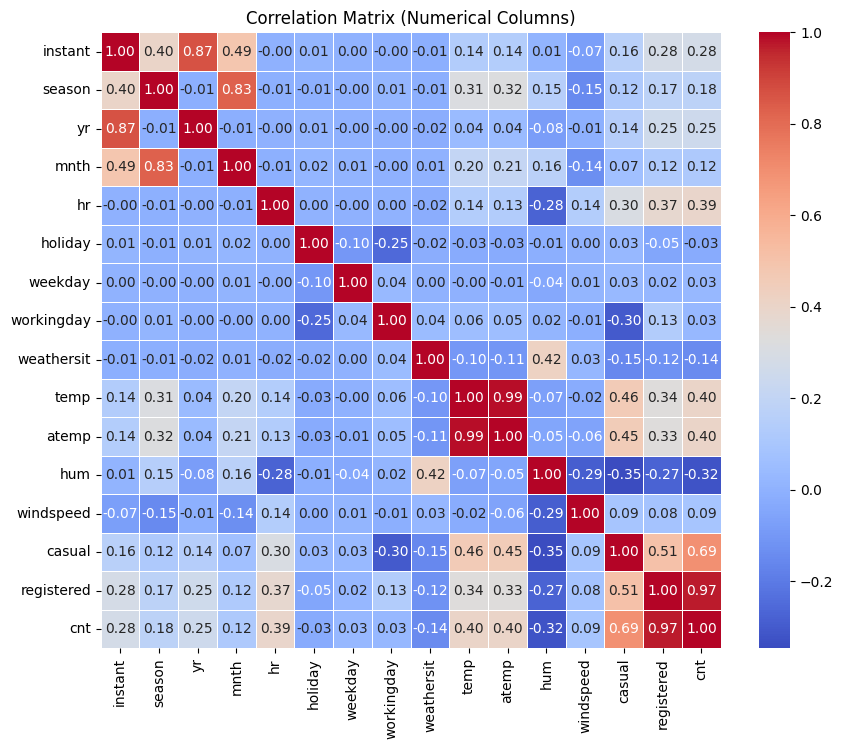

In [51]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix (Numerical Columns)")

# Display the plot
plt.show()

#### This code generates a heatmap to visualize the correlation between numerical columns in the dataset, helping to identify patterns or relationships between variables.

#### **3.2.1.11** Variance Inflation Factor (VIF)

In [52]:
# Add constant for intercept term in regression
X = add_constant(df.drop(columns=['cnt']))  # Assuming 'Class' is the target column

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

       feature         VIF
0        const   48.775231
1      instant  572.102174
2       season    3.528103
3           yr  435.547942
4         mnth  145.817742
5           hr    1.265102
6      holiday    1.084560
7      weekday    1.017868
8   workingday    1.404410
9   weathersit    1.284493
10        temp   43.901532
11       atemp   44.149548
12         hum    1.667936
13   windspeed    1.199939
14      casual    2.181291
15  registered    1.786188


#### The code calculates the Variance Inflation Factor (VIF) for each feature in the dataset to detect multicollinearity, which helps identify features that are highly correlated with others.

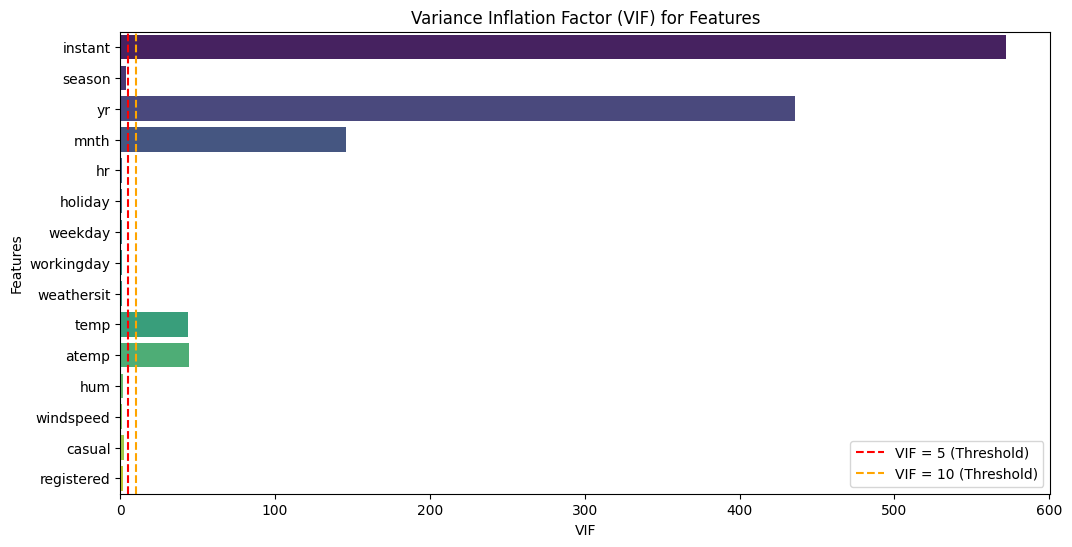

In [53]:
# Assuming 'df1' is your DataFrame
# Exclude the target variable 'Class' from the features
X = df.drop(columns=['cnt'])

# Add constant for calculating VIF
X_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Remove the constant from the VIF data (we are only interested in the features)
vif_data = vif_data[vif_data['Feature'] != 'const']

# Plotting VIF
plt.figure(figsize=(12, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Features')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.axvline(x=5, color='r', linestyle='--', label='VIF = 5 (Threshold)')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10 (Threshold)')
plt.legend()
plt.show()

#### The code calculates the Variance Inflation Factor (VIF) for each feature, identifies multicollinearity, and plots a bar chart of the VIF values. It also adds threshold lines at VIF = 5 and VIF = 10 to highlight features with high multicollinearity.

#### **3.2.1.12** Visualizations of dataset (Histogram)

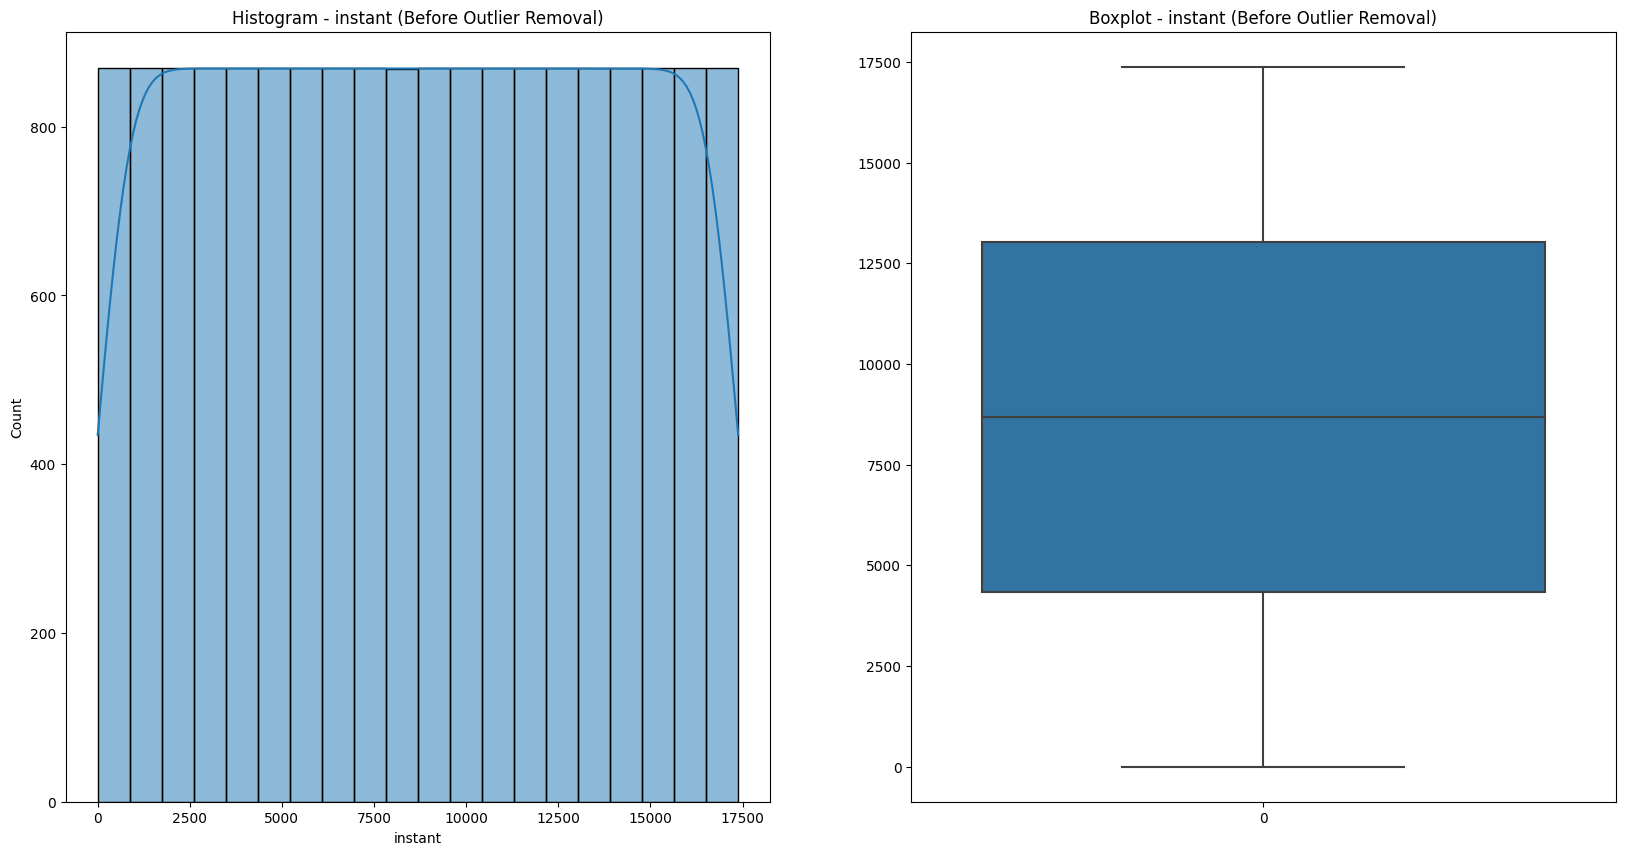

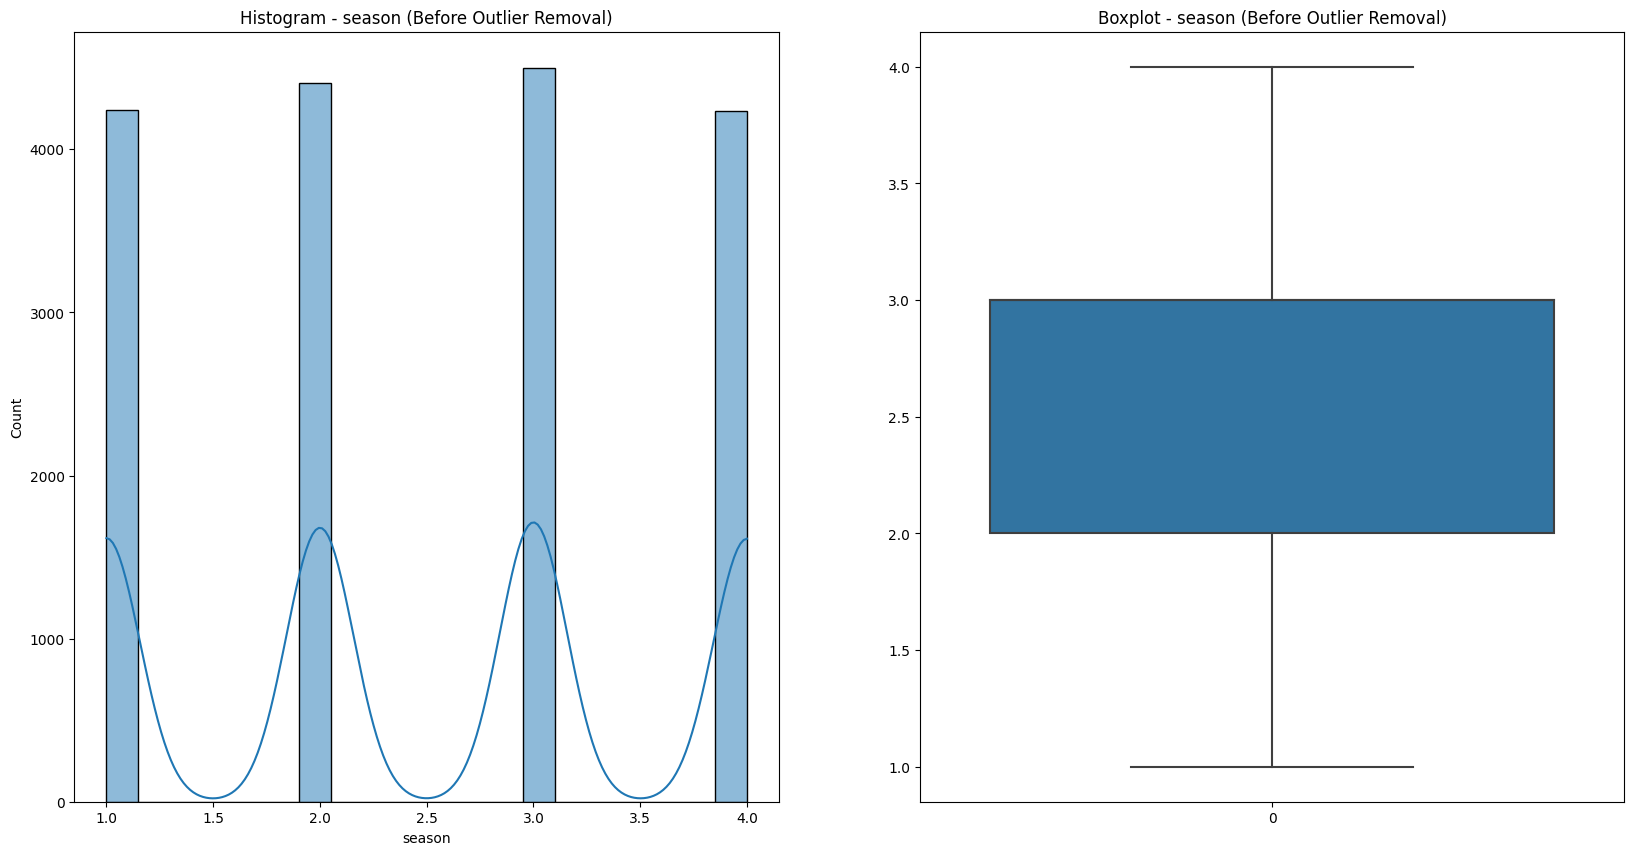

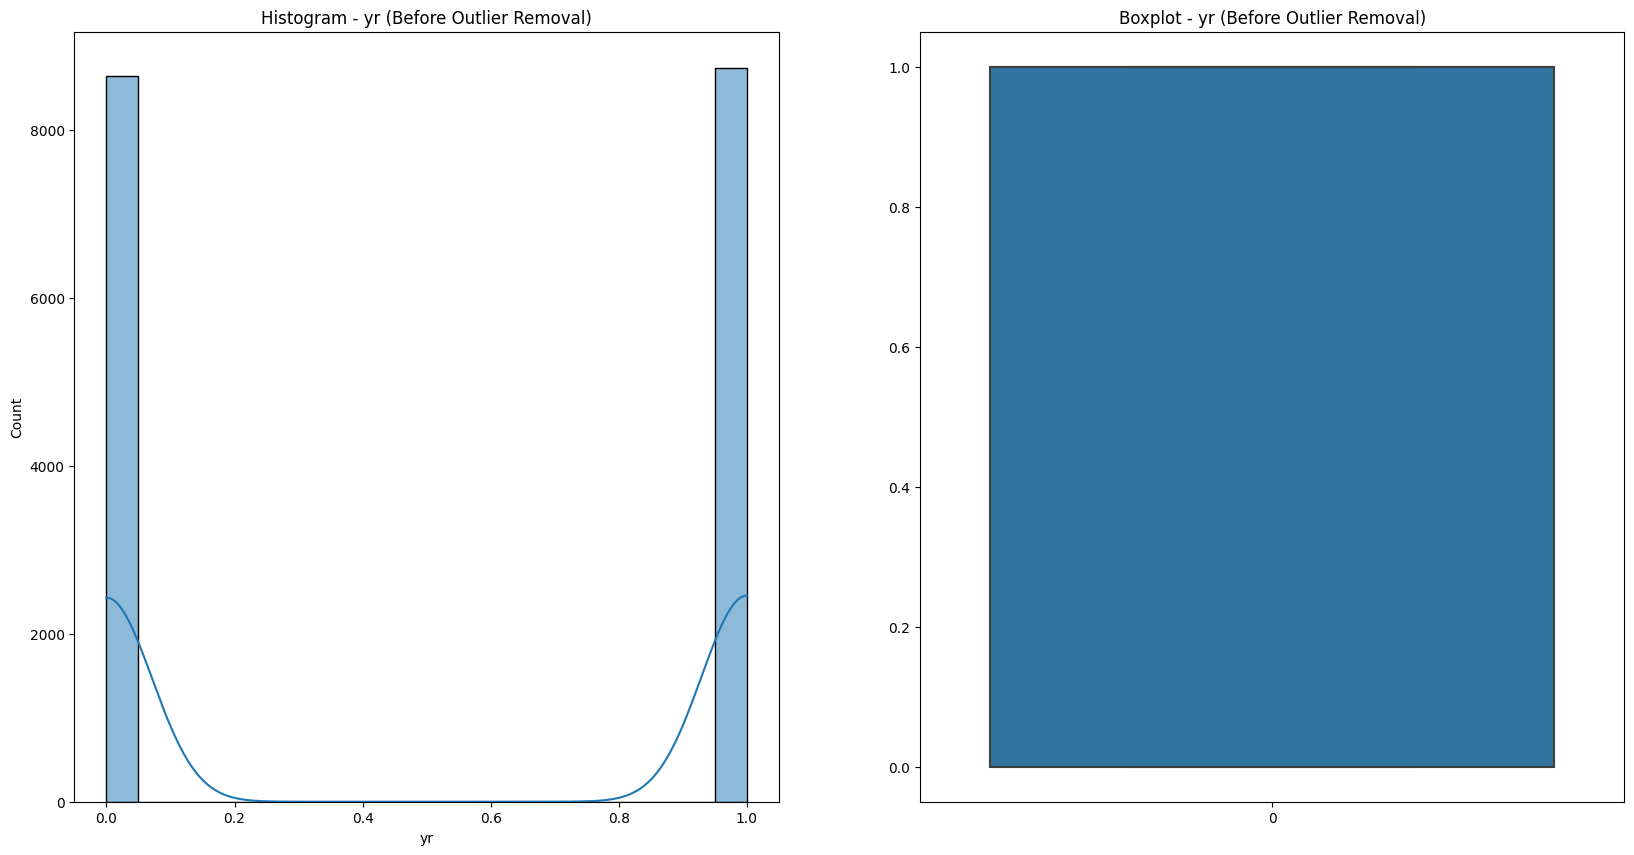

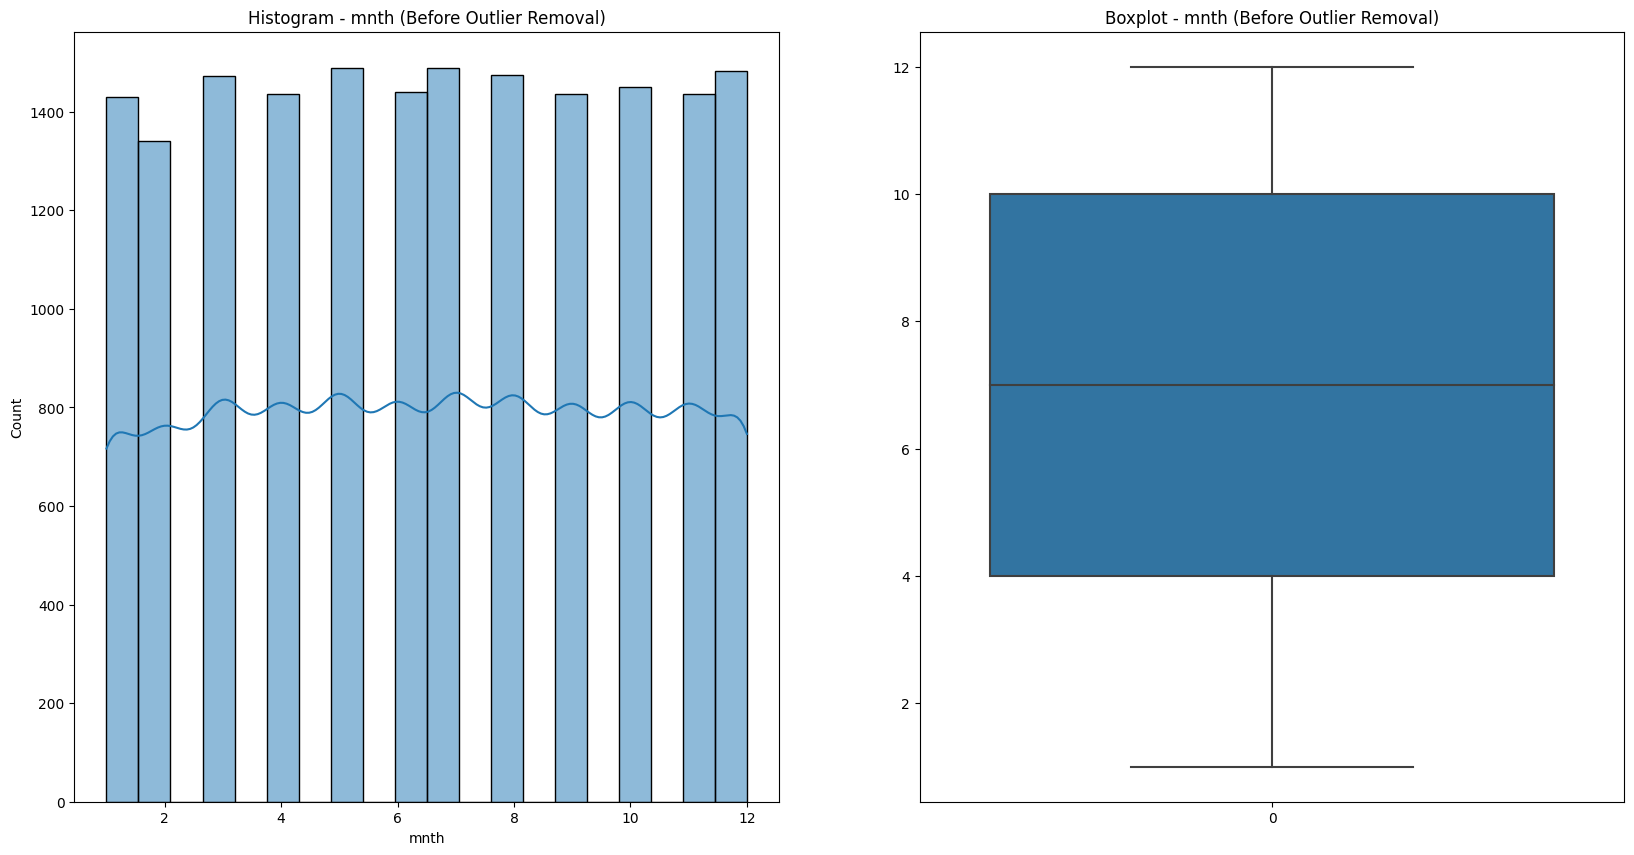

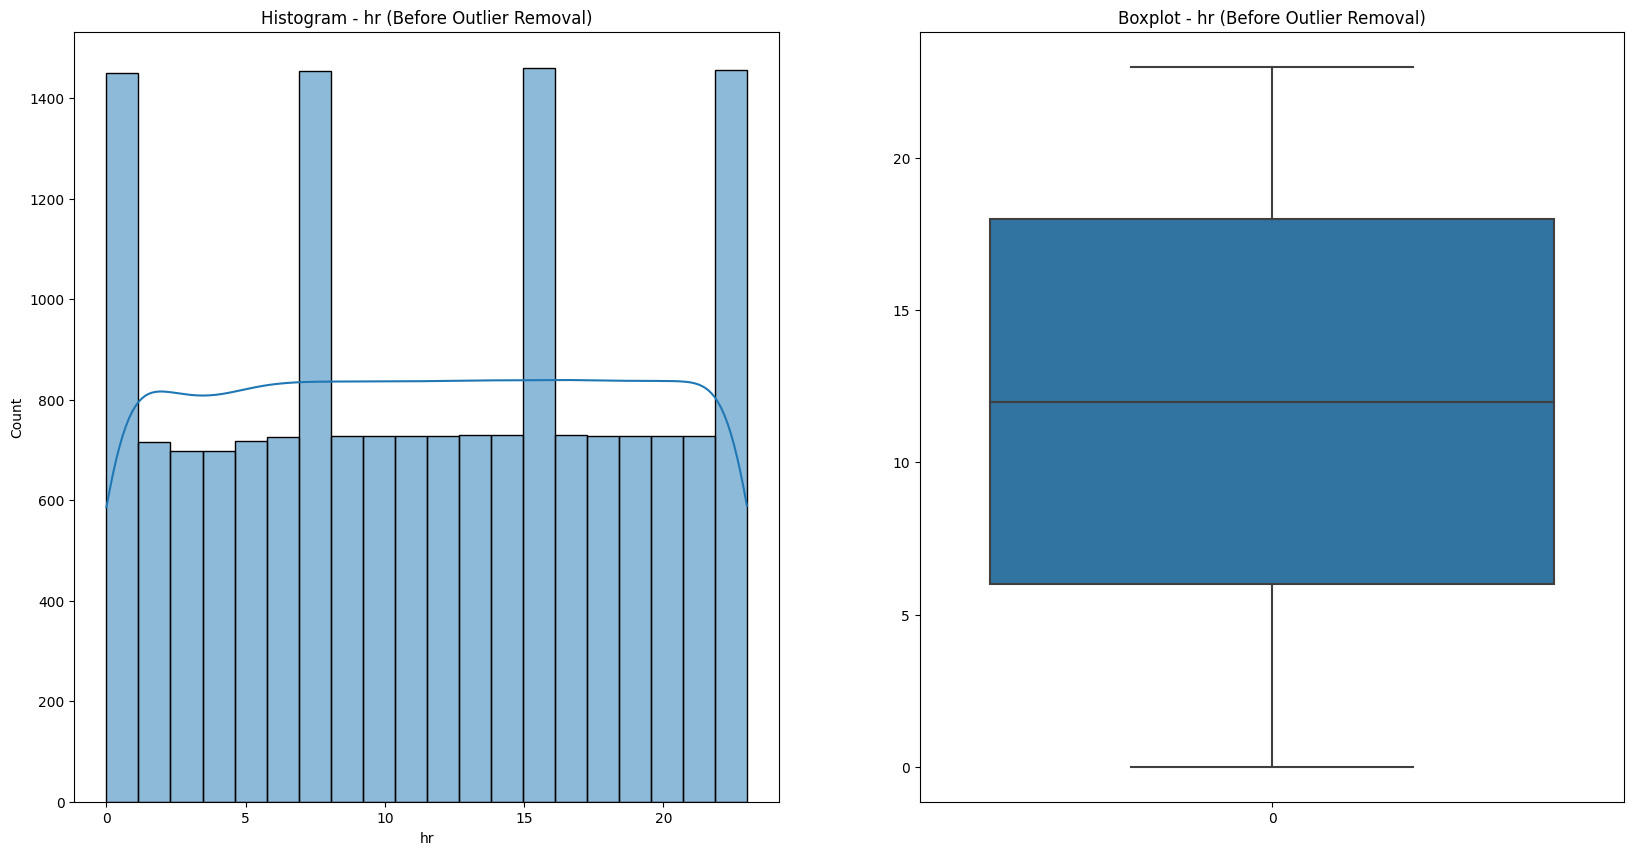

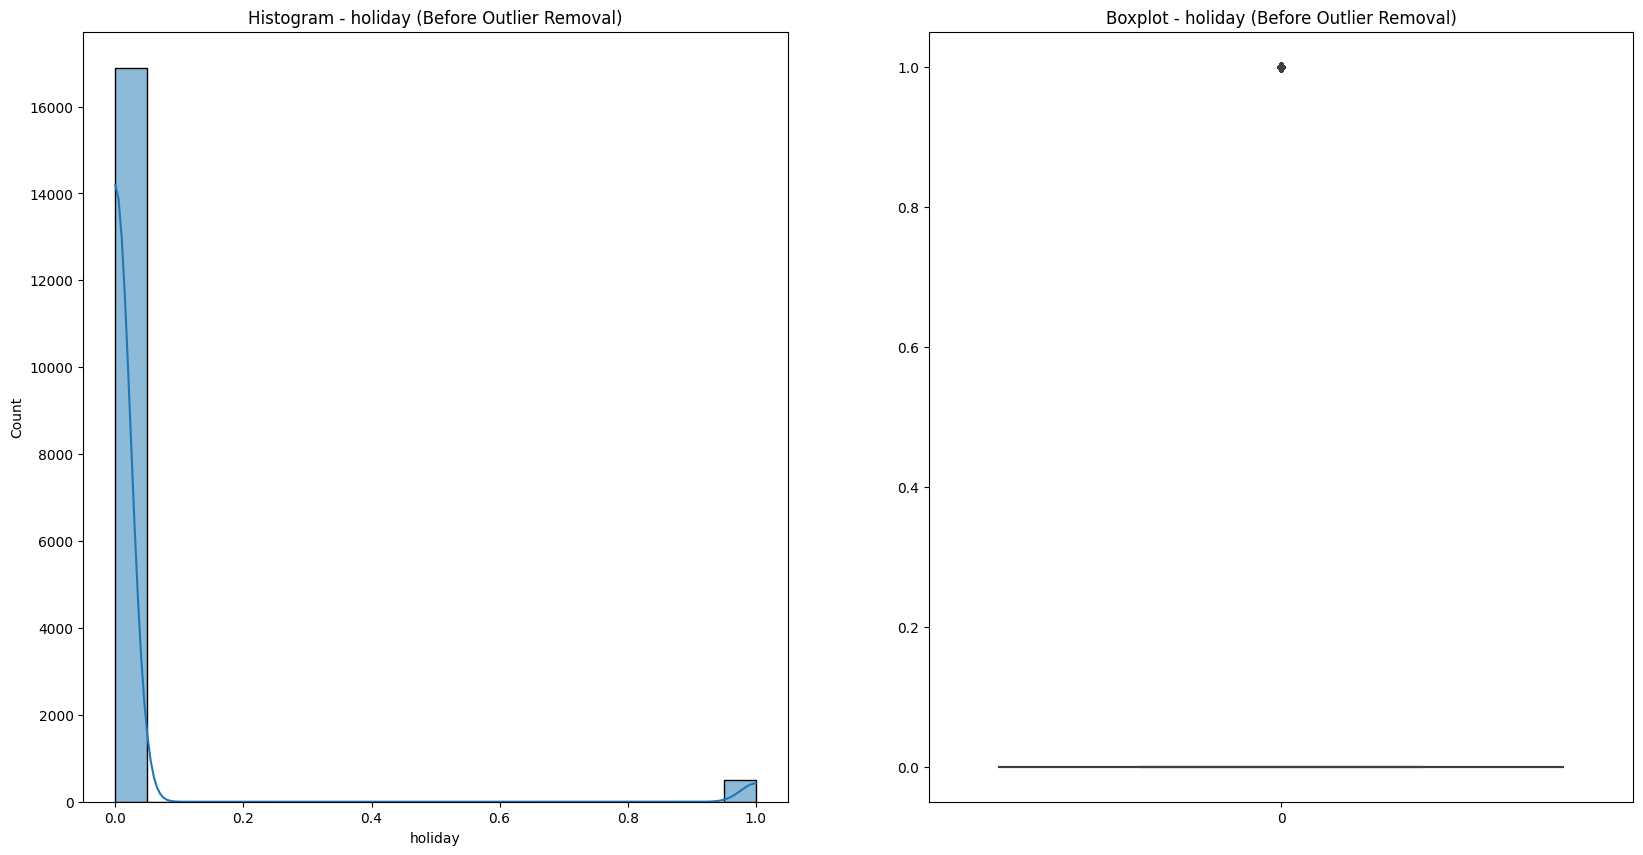

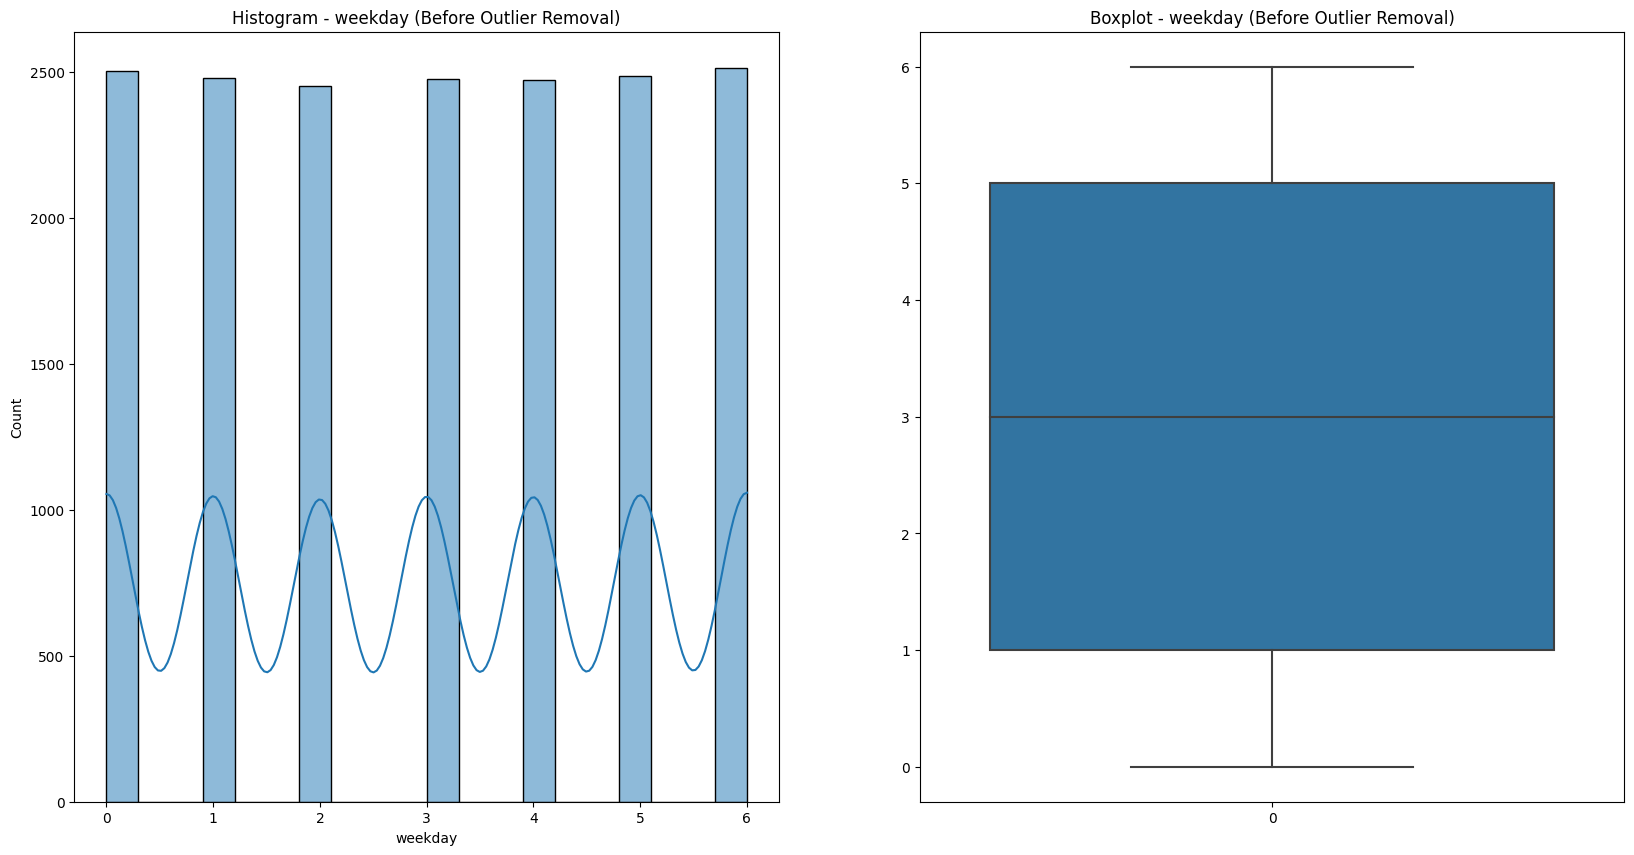

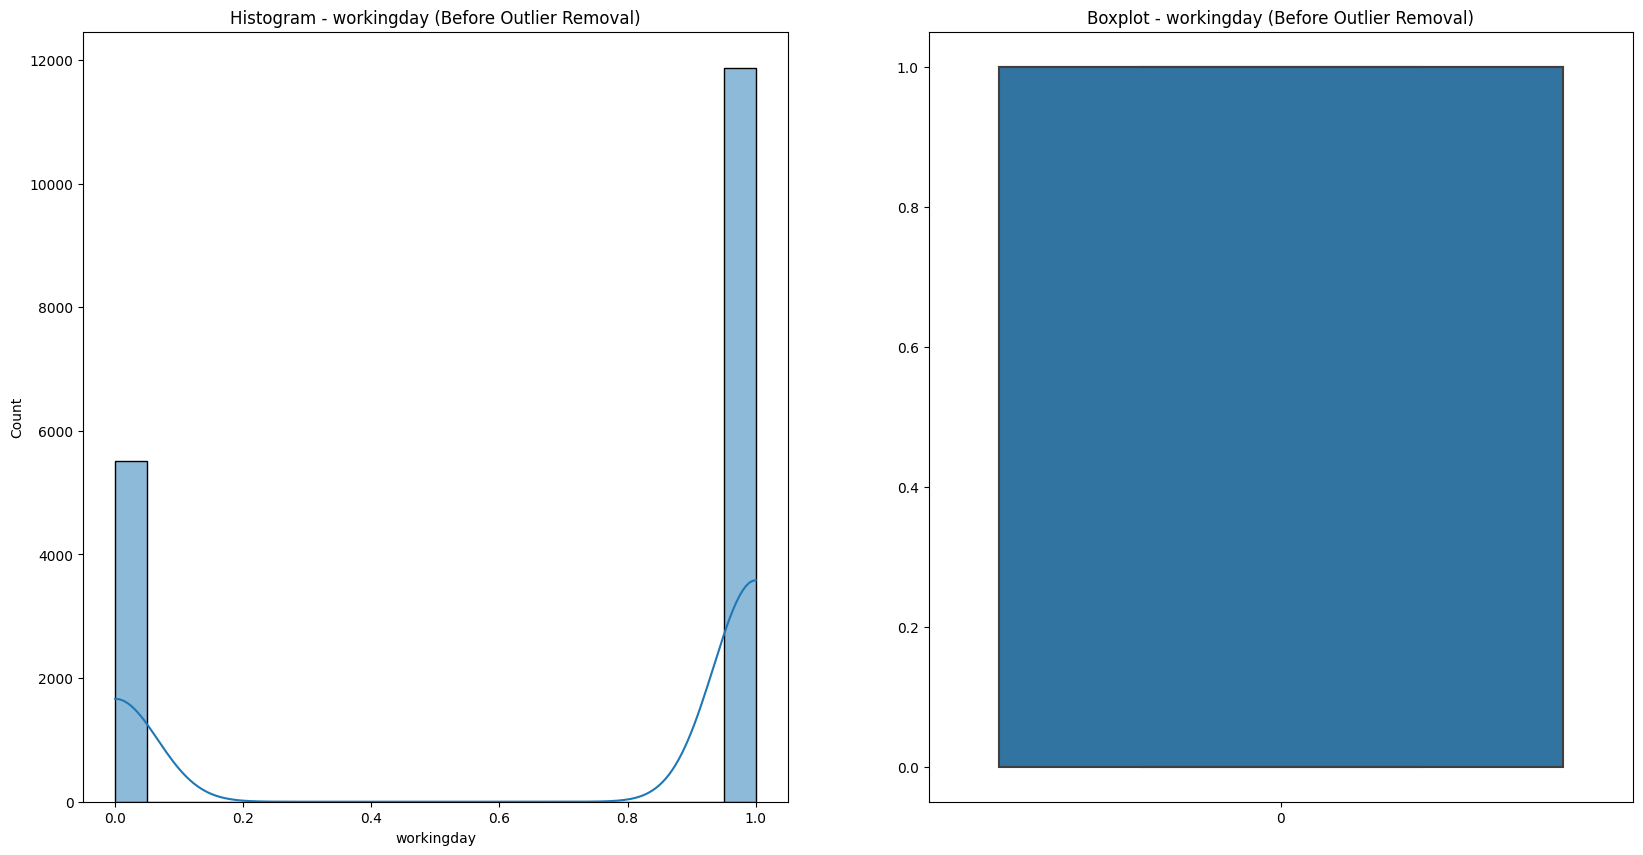

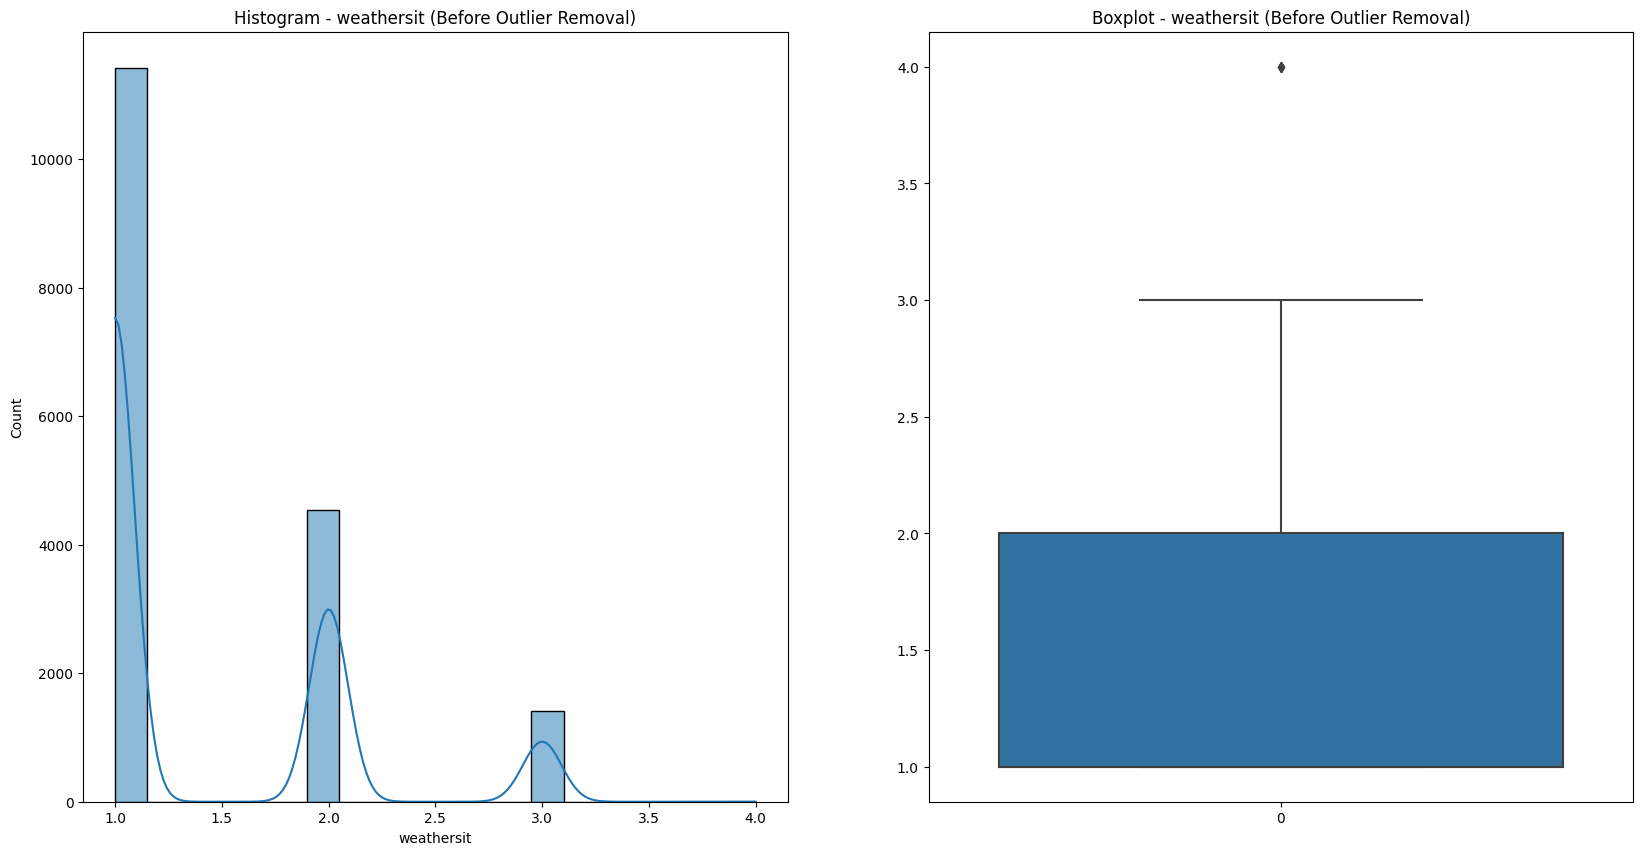

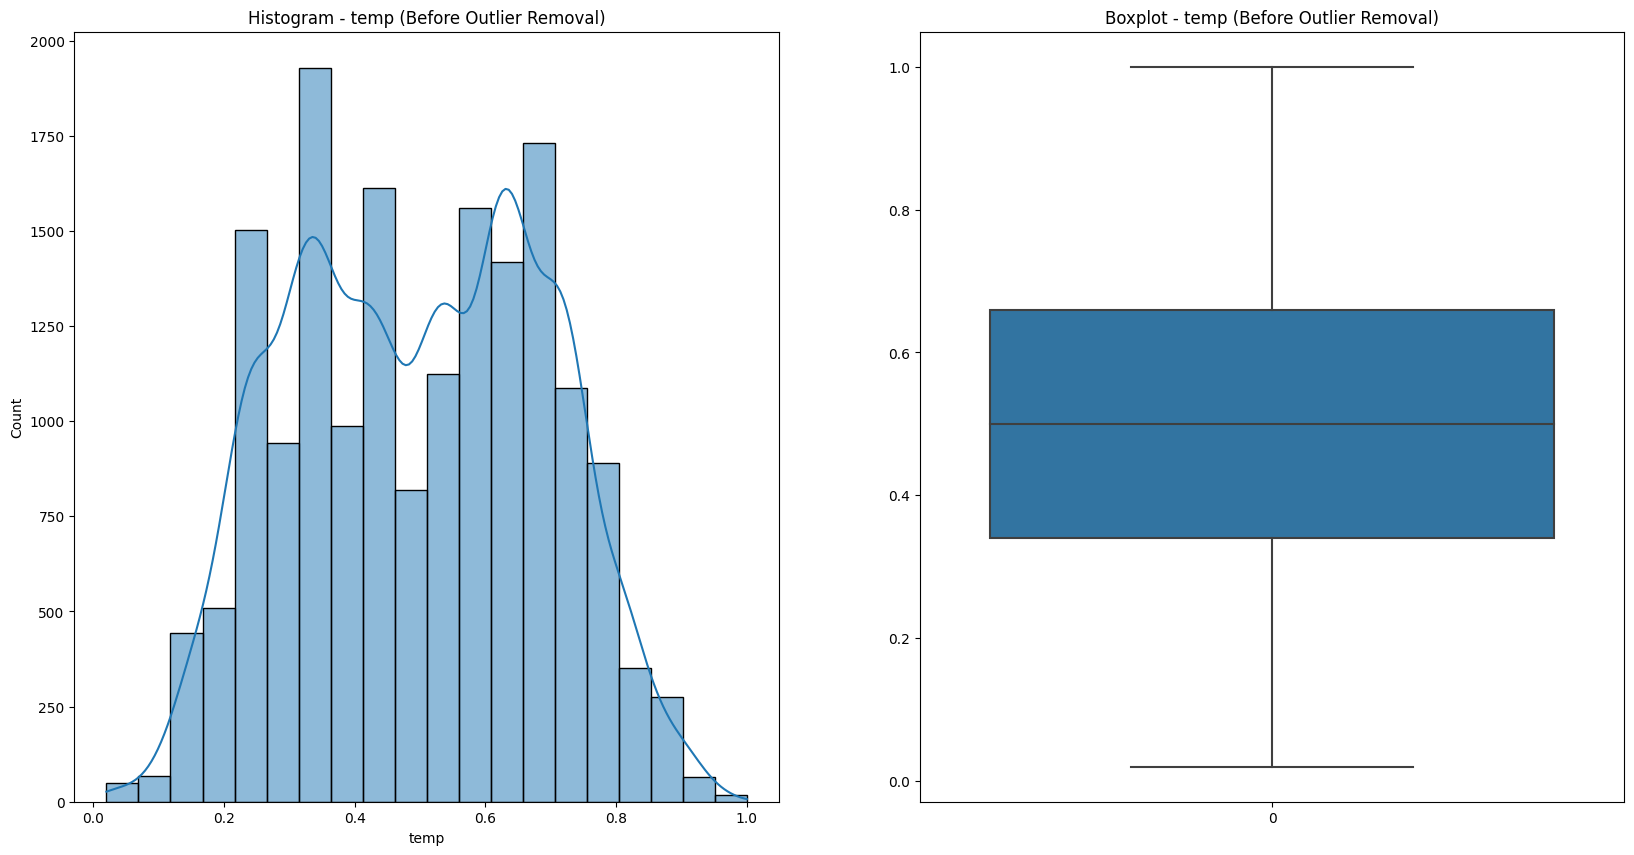

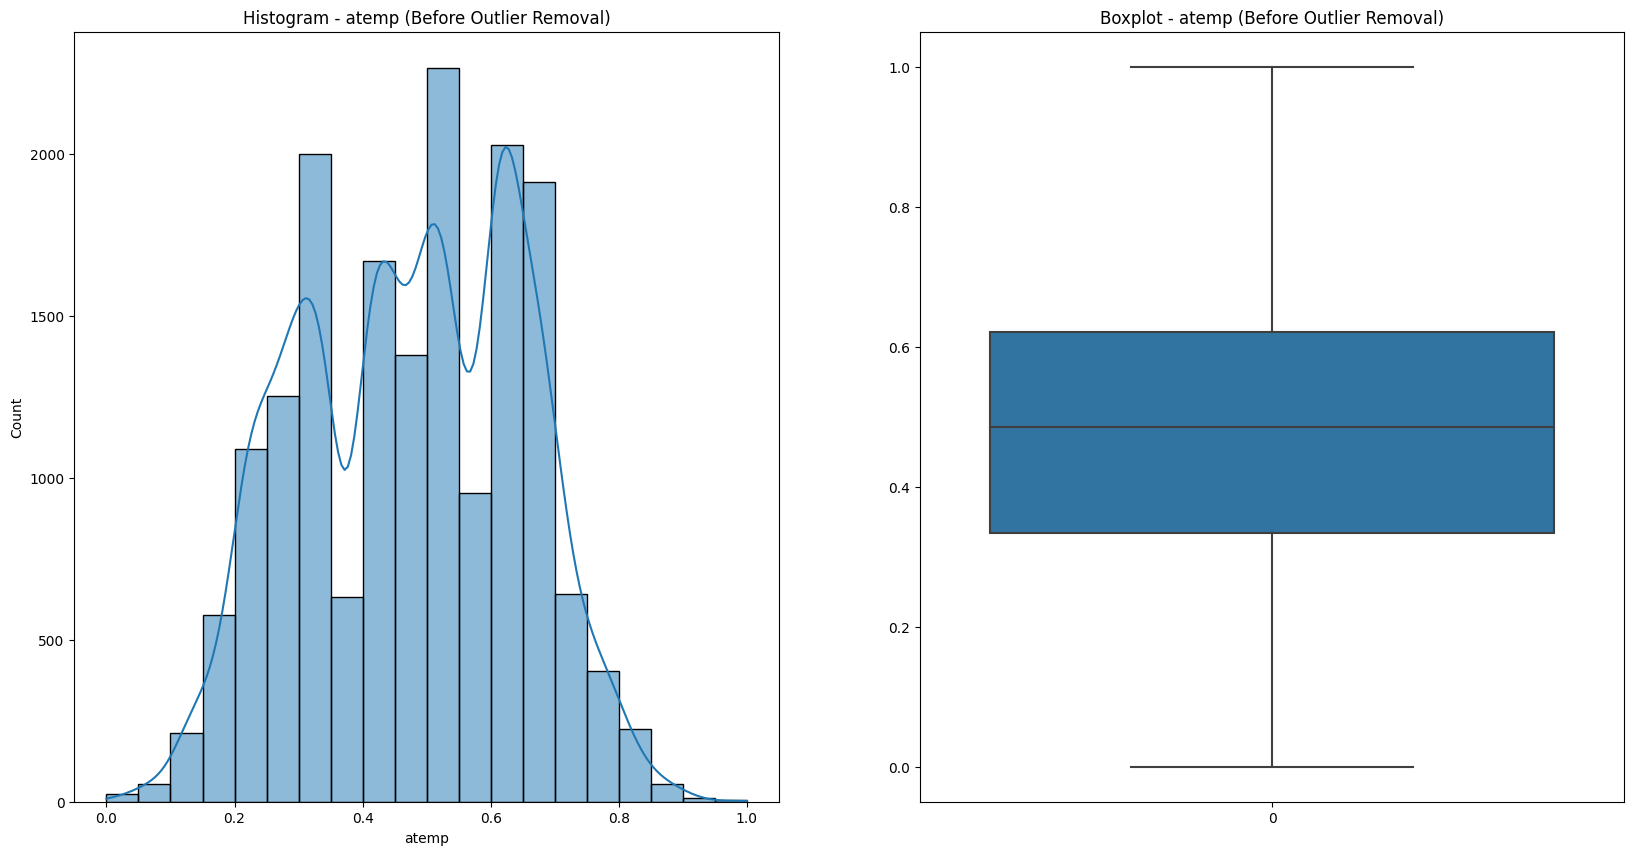

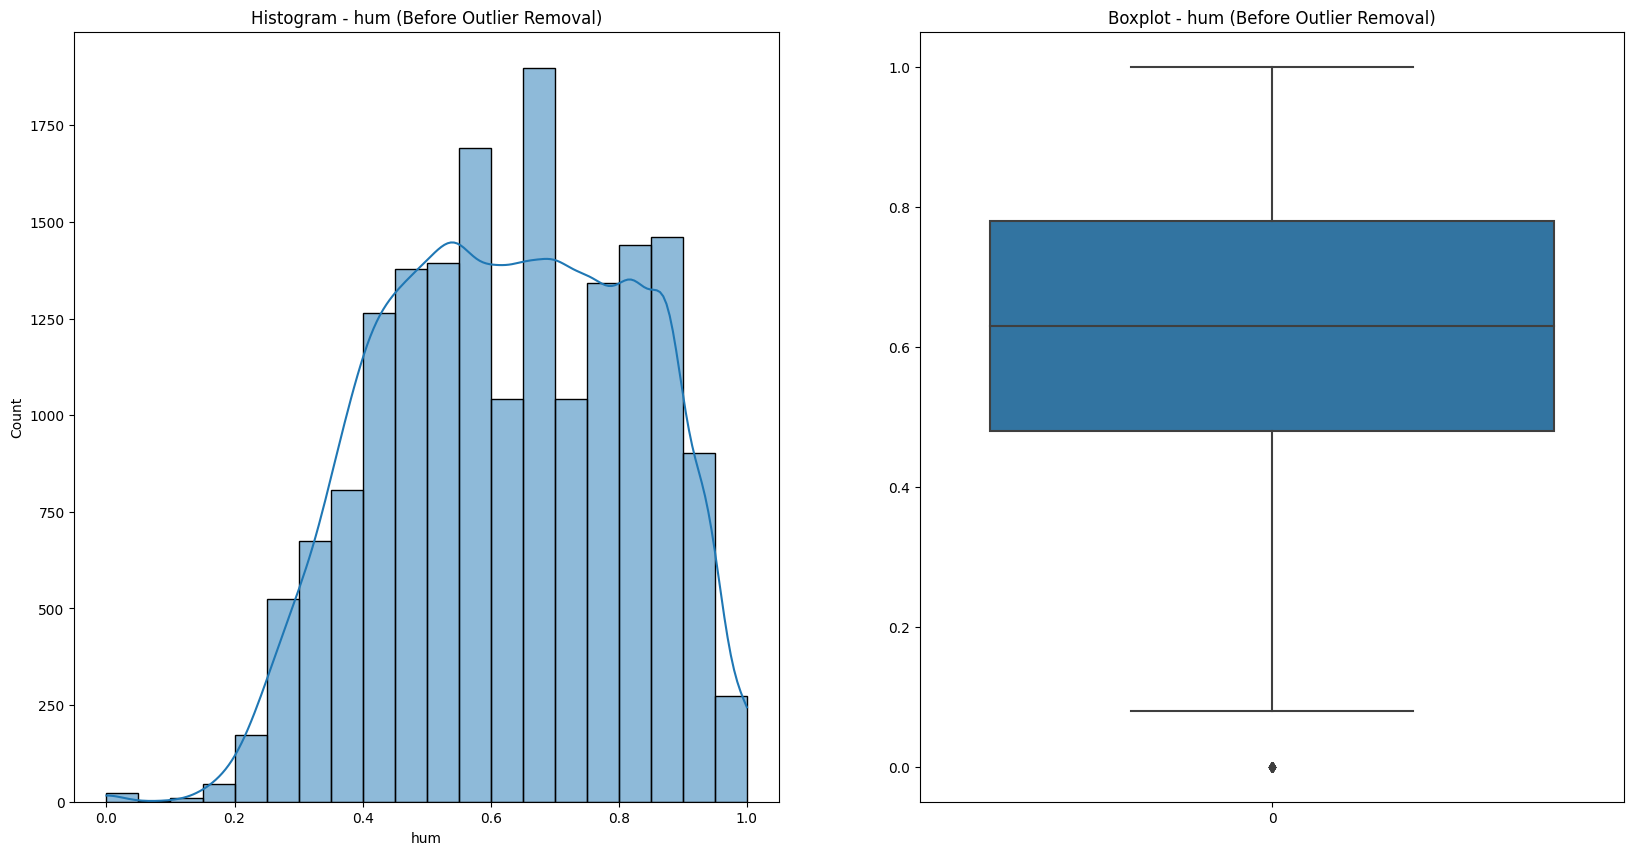

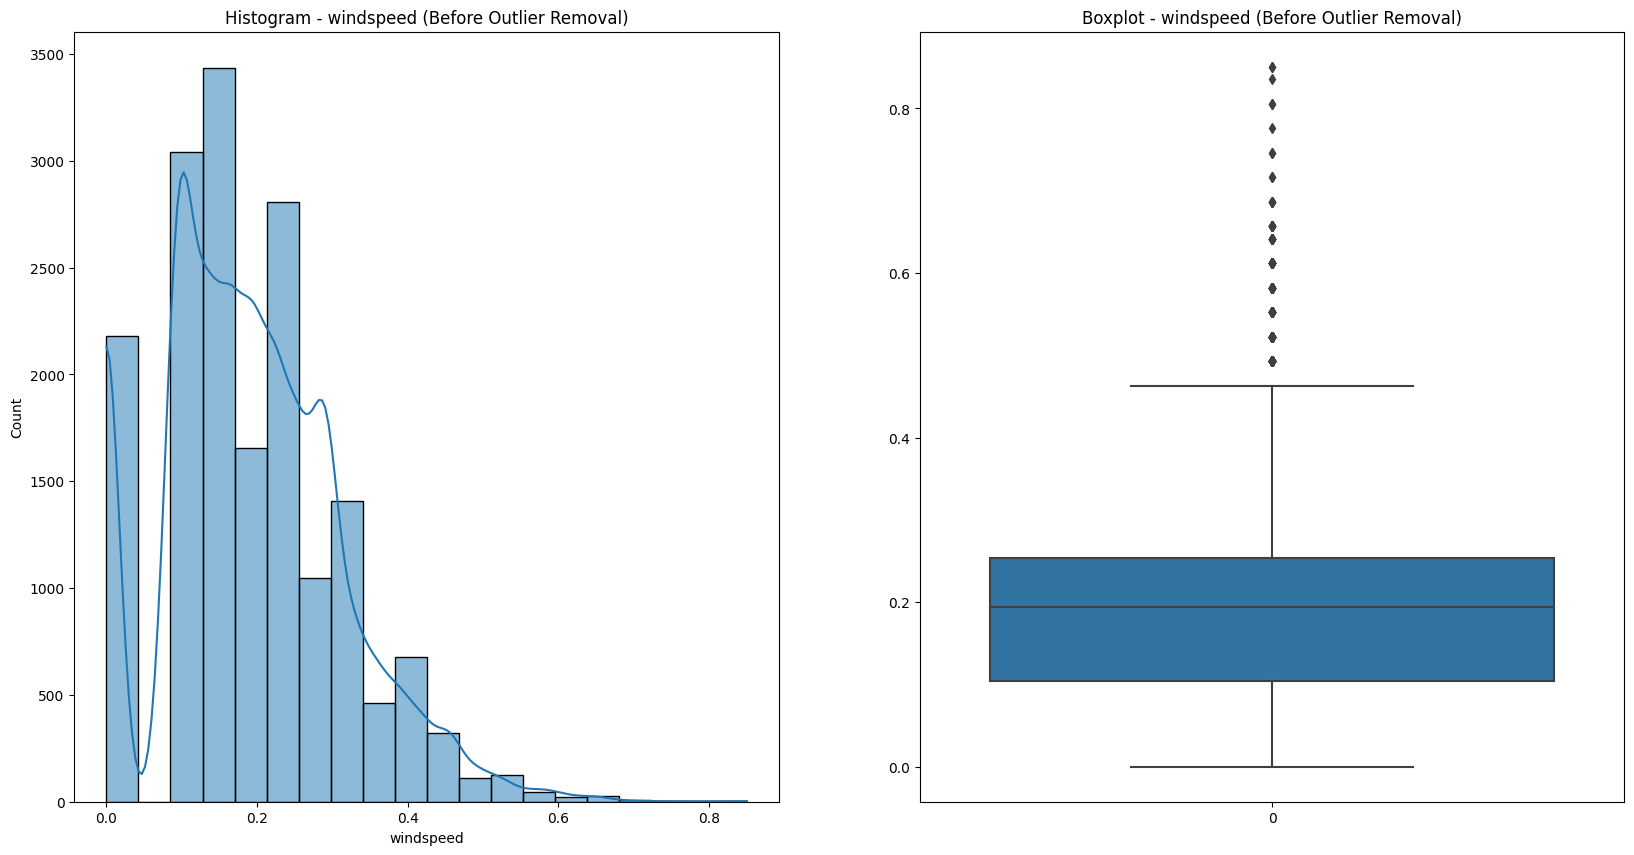

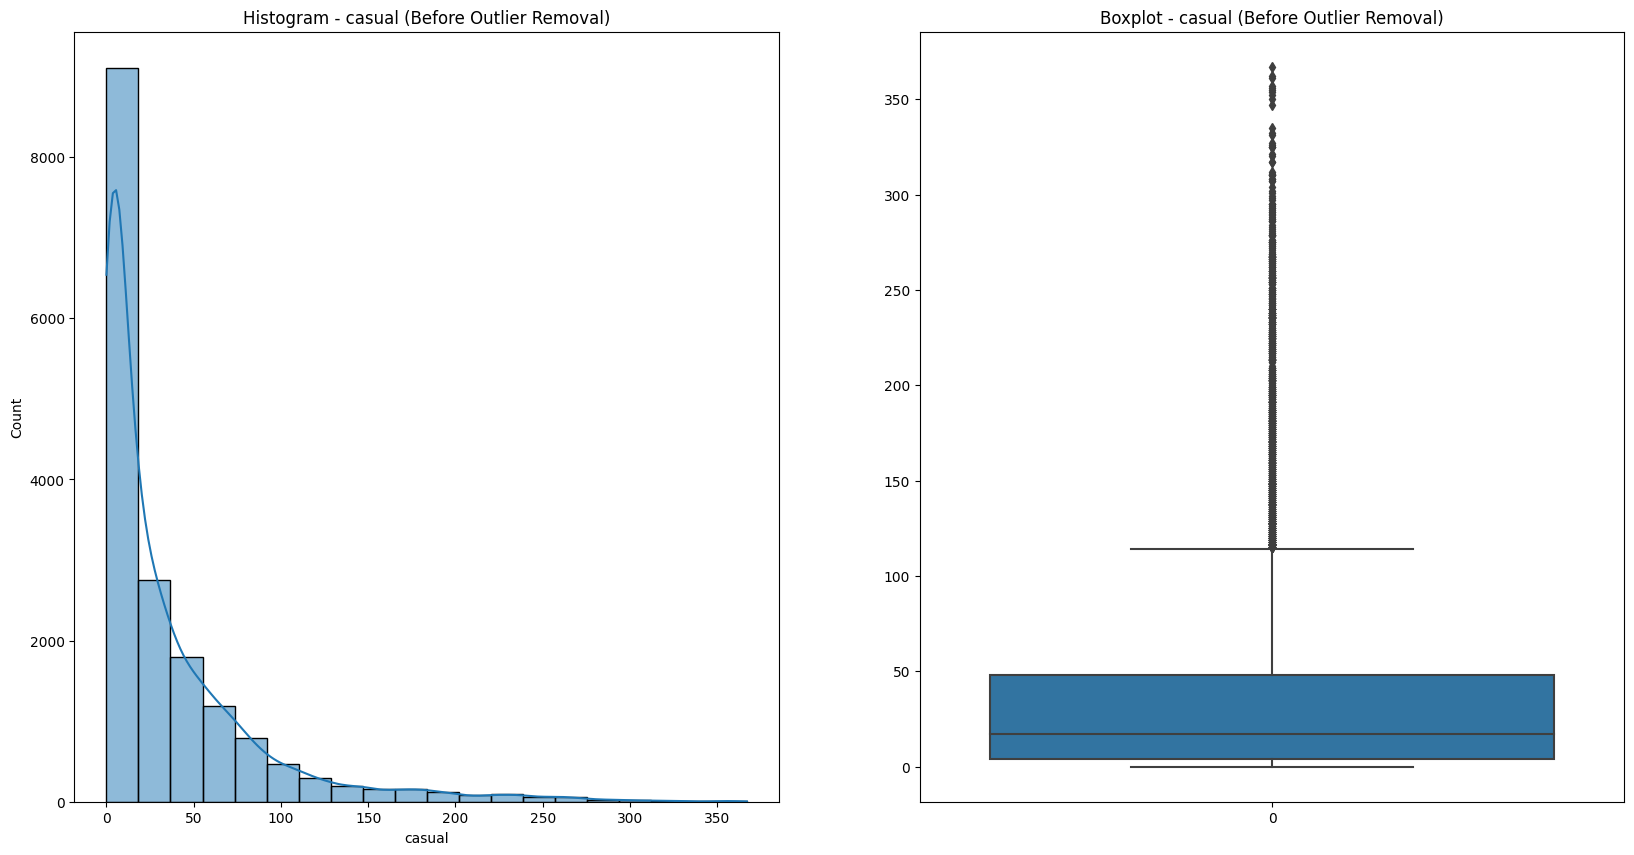

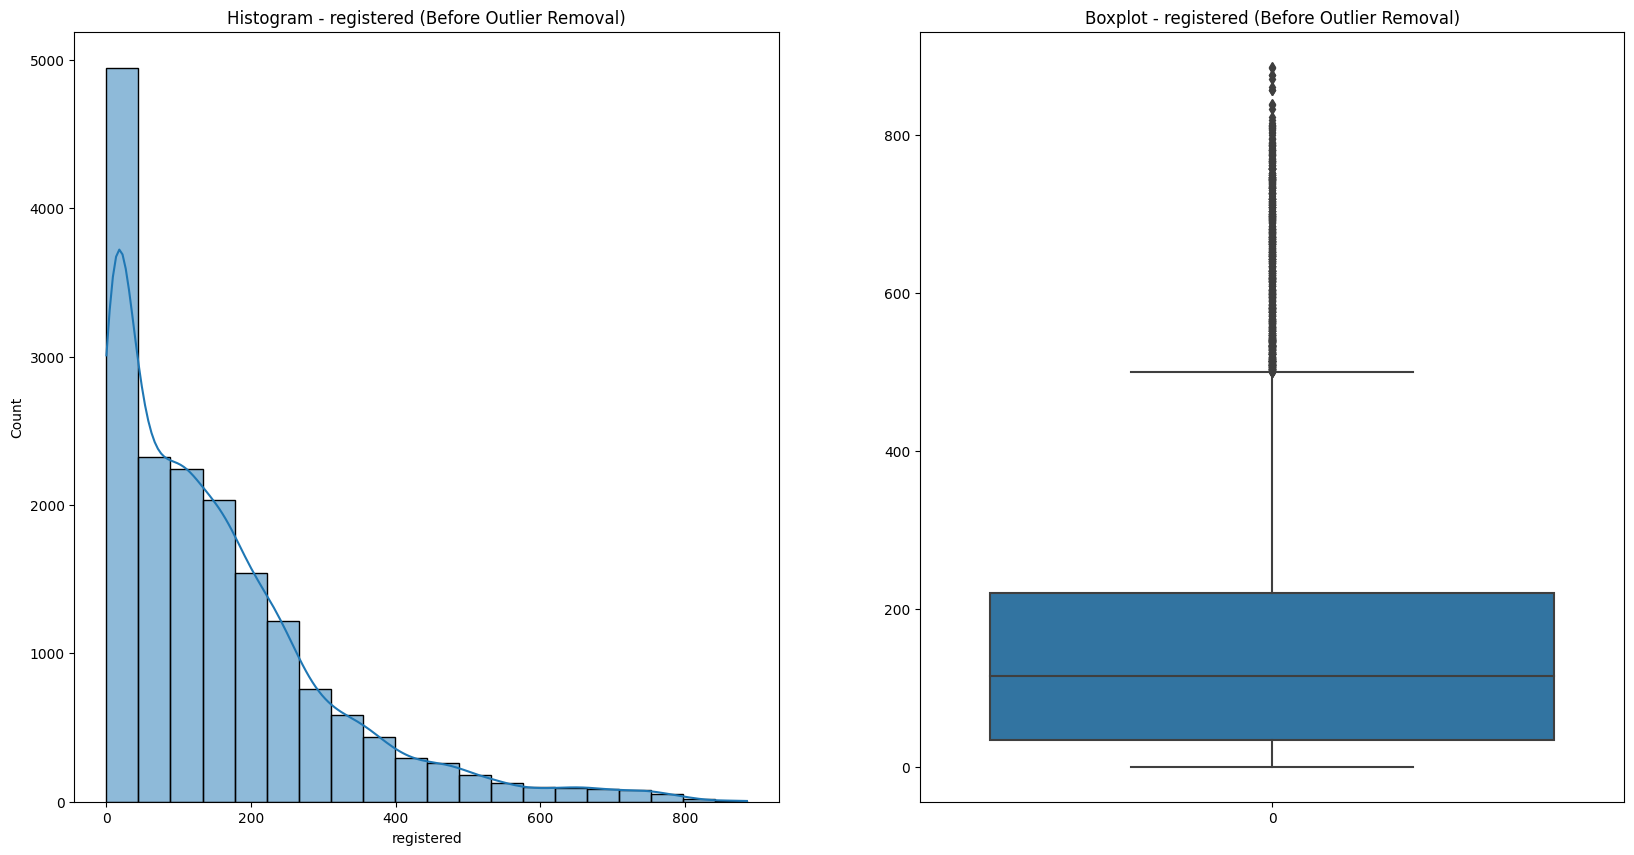

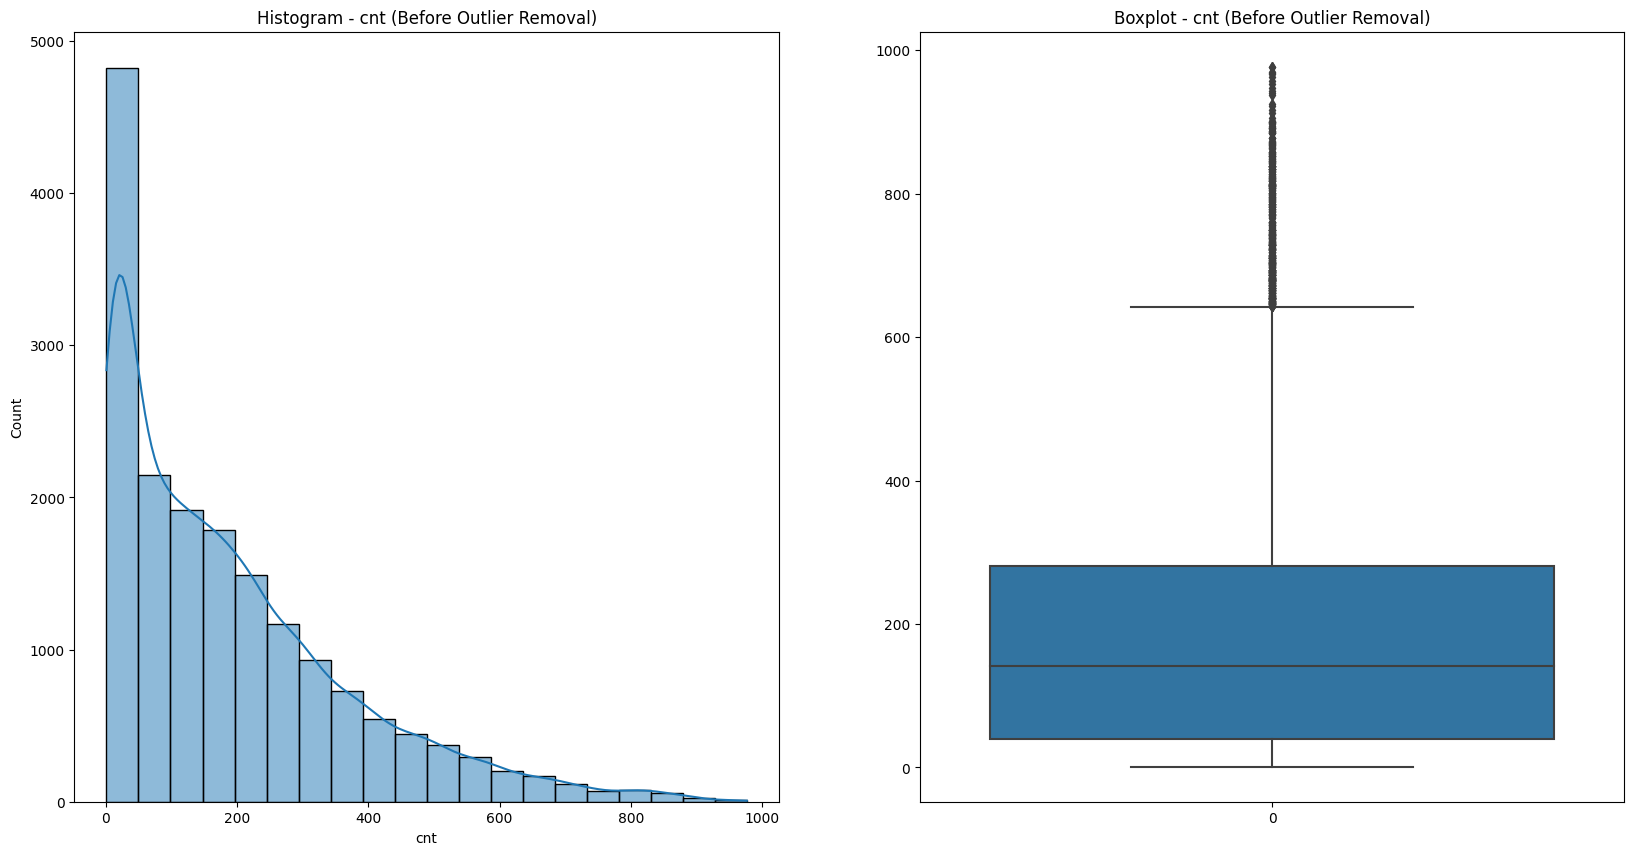

In [54]:
# Selecting only the numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Disable FutureWarnings temporarily
warnings.simplefilter(action='ignore', category=FutureWarning)

for col in numeric_cols:
    plt.figure(figsize=(20, 10))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram - {col} (Before Outlier Removal)')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot - {col} (Before Outlier Removal)')
    
    plt.show()

# Re-enable the FutureWarnings after plotting
warnings.simplefilter(action='default', category=FutureWarning)


#### The code visualizes the distribution and detects outliers in numerical columns of df by plotting histograms and boxplots before removing outliers, while handling infinite values and suppressing future warnings.

### **3.2.2** Preprocessing

#### **3.2.2.1** Identify and Transform Skewed Numerical Features in DataFrame

In [55]:
# Identify skewed numerical features (excluding 'cnt')
skewed_features = df.drop(columns=['cnt']).select_dtypes(include=[np.number]).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Set threshold for skewness
high_skew = skewed_features[skewed_features > 0.75]

# Apply log1p transformation to reduce skewness for highly skewed features
for feature in high_skew.index:
    df[feature] = np.log1p(df[feature])

#### This code identifies highly skewed numerical features (excluding cnt) and applies a log1p transformation to reduce skewness in those features where the skewness is greater than 0.75.

#### **3.2.2.2** Verify Skewness After Transformation

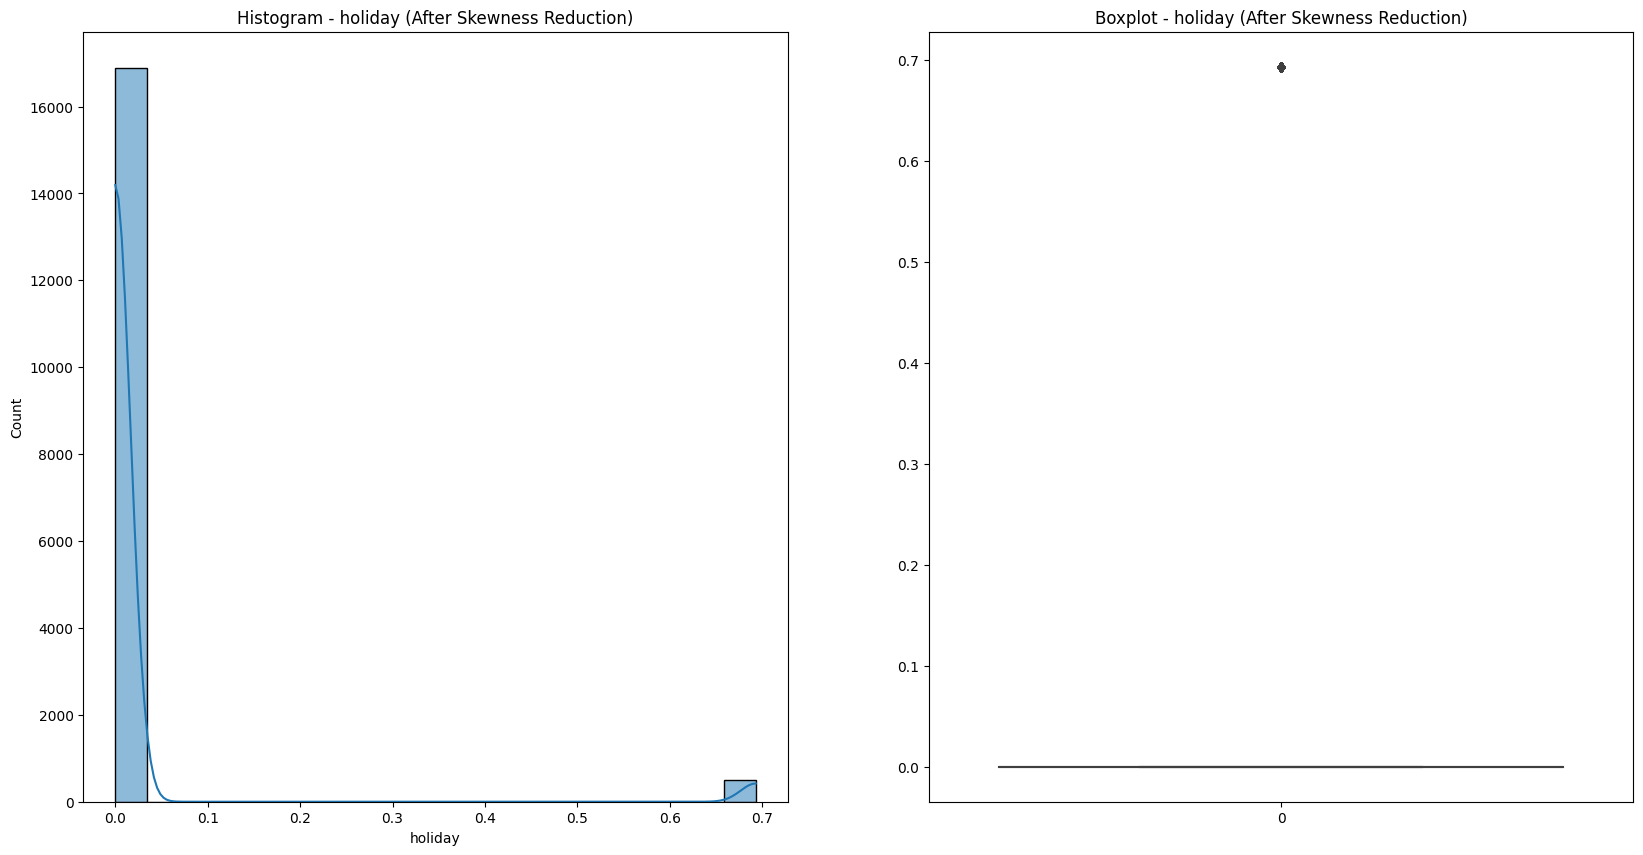

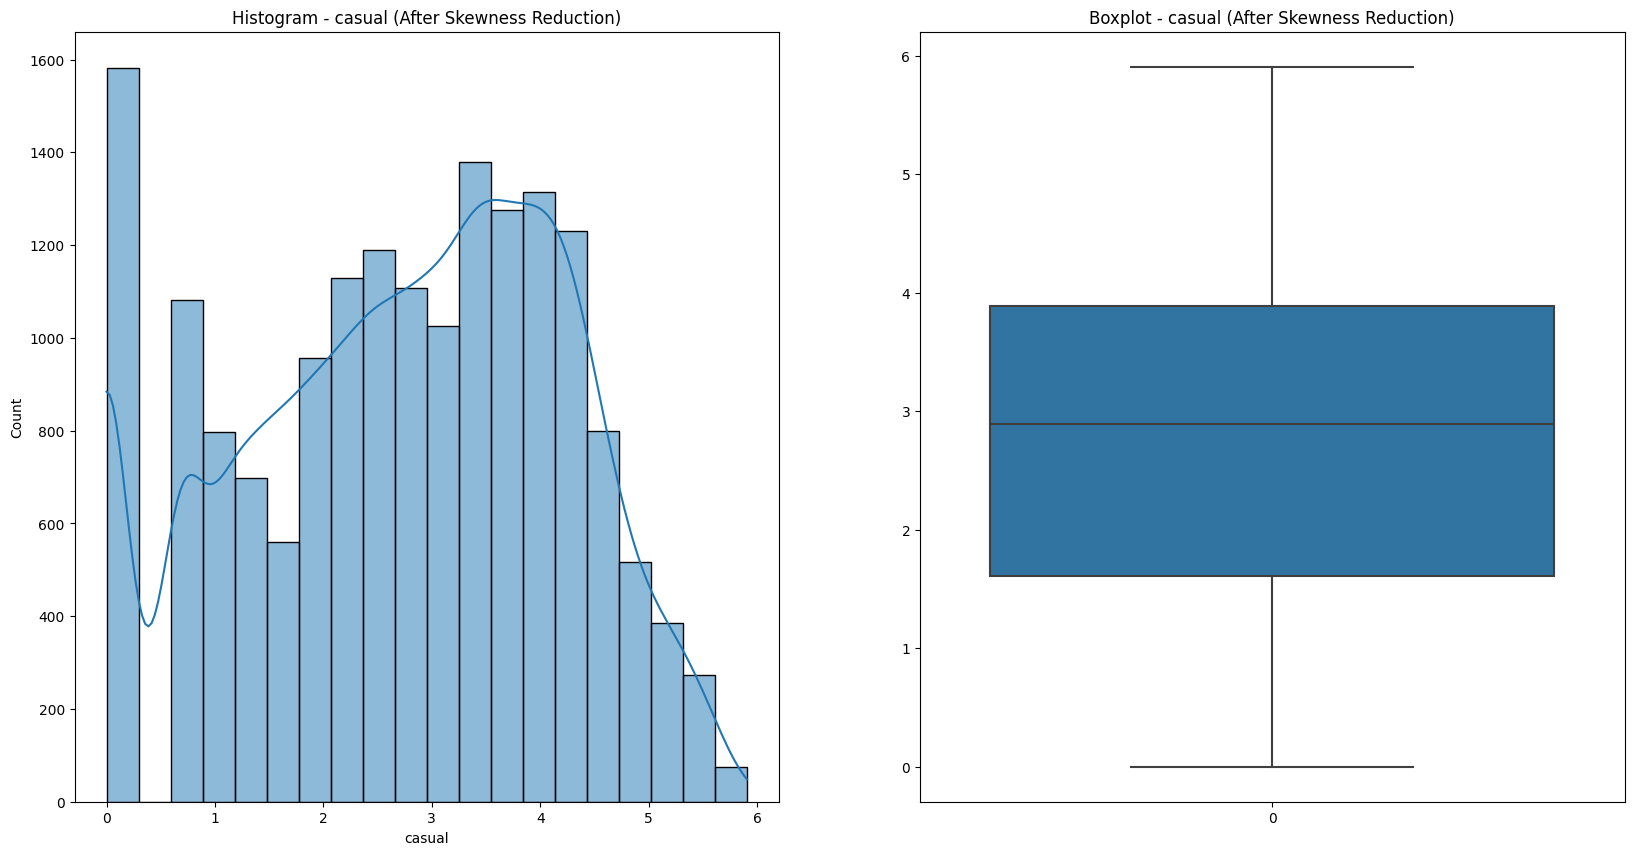

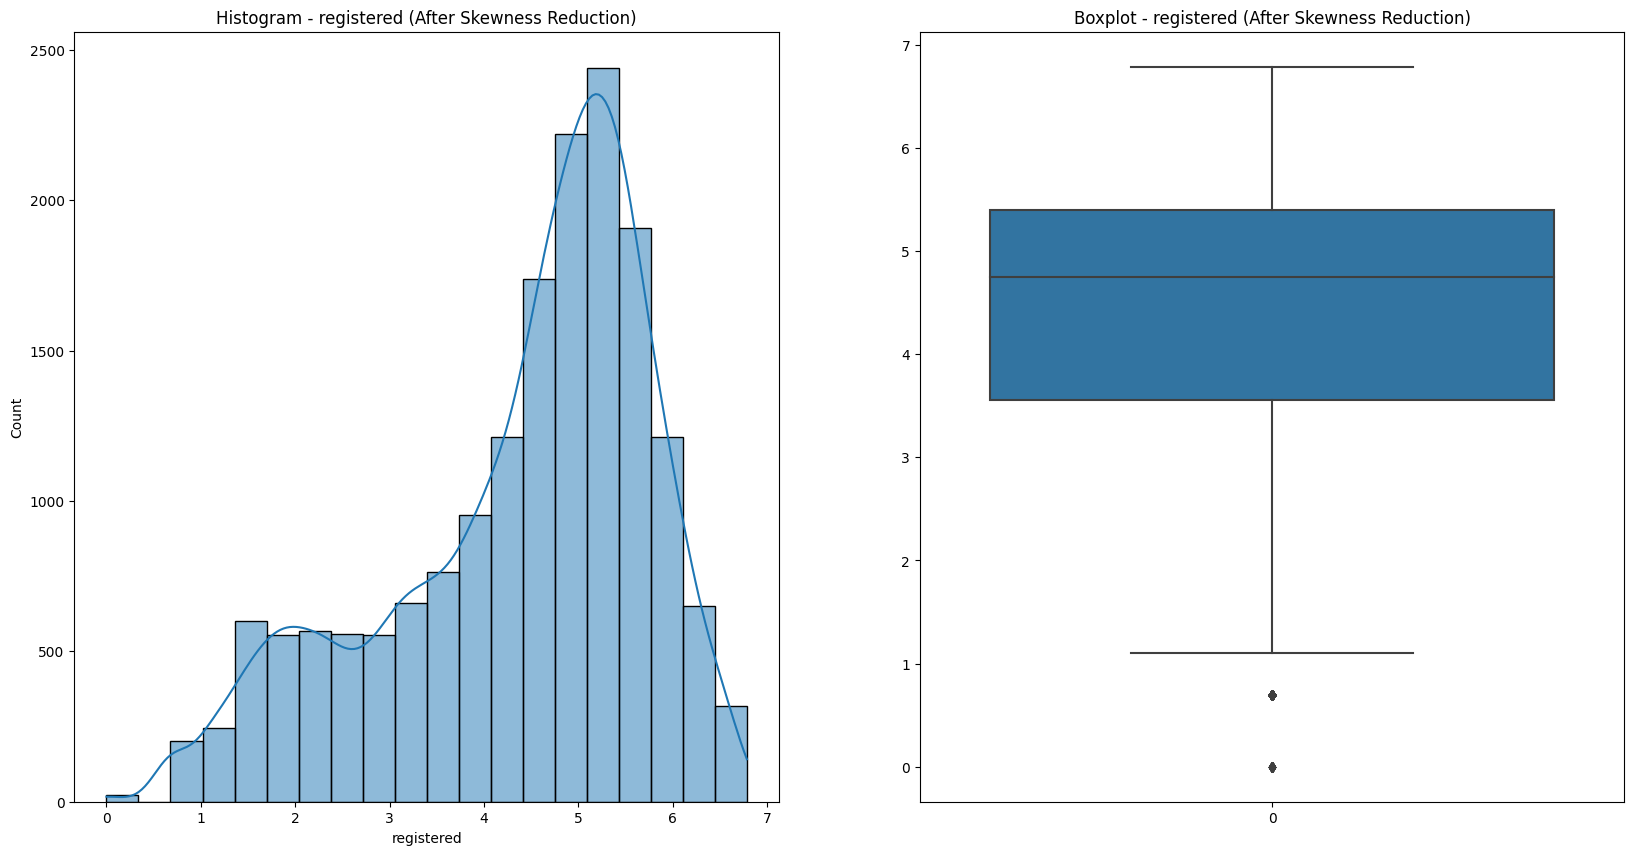

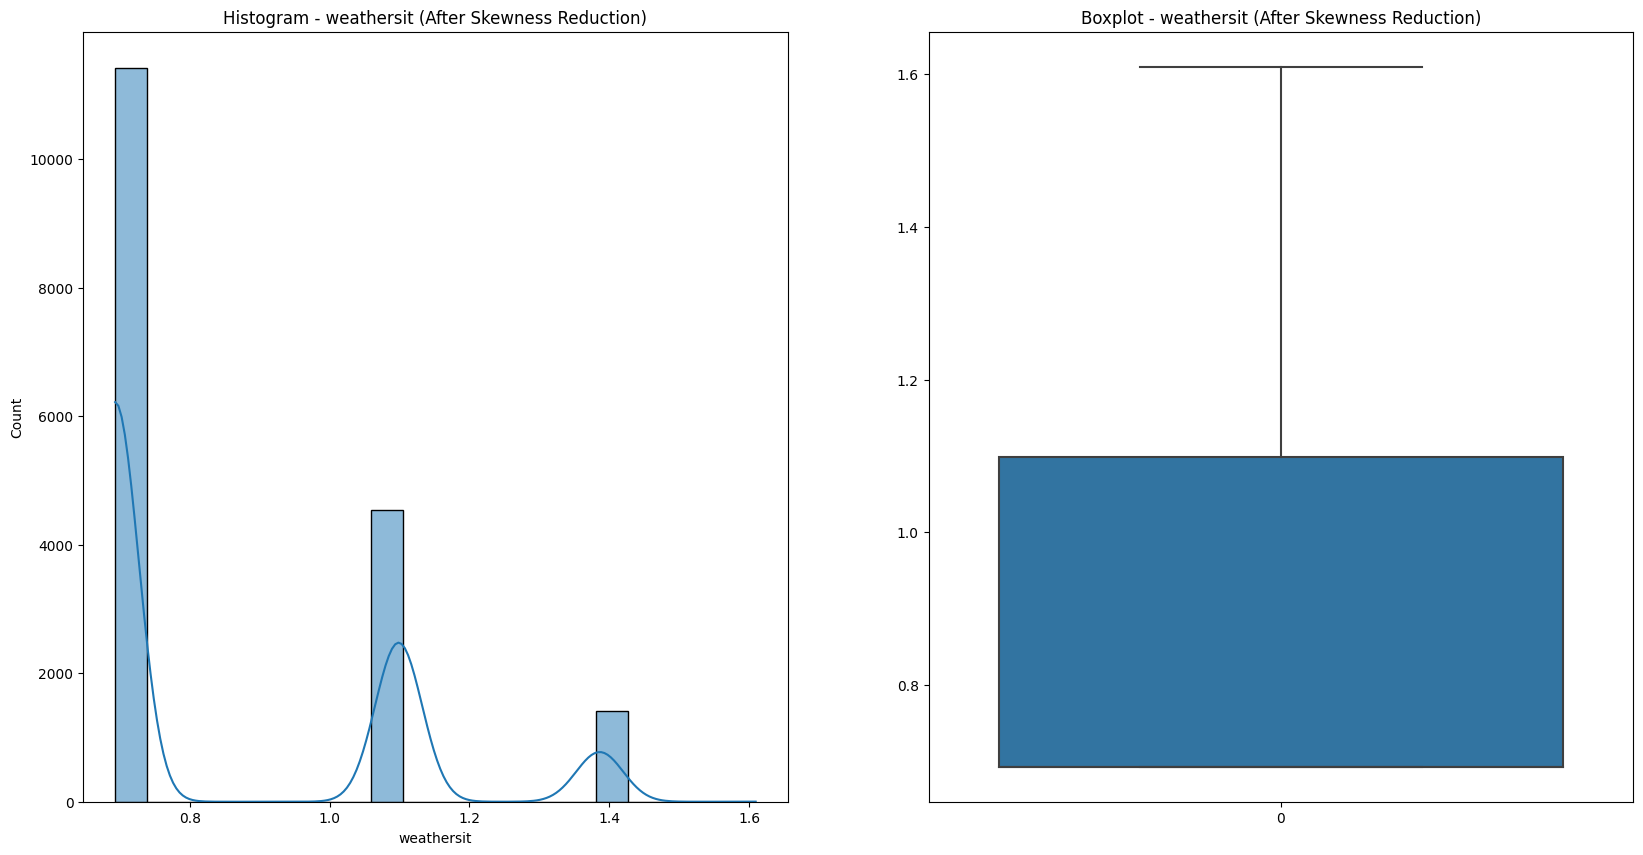

In [56]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Plot histograms and boxplots to check reduced skewness
for col in high_skew.index:
    plt.figure(figsize=(20, 10))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram - {col} (After Skewness Reduction)')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot - {col} (After Skewness Reduction)')
    
    plt.show()

# Re-enable warnings
warnings.filterwarnings("default")

#### This code suppresses warnings temporarily, plots histograms and boxplots for each highly skewed feature after applying the log1p transformation to reduce skewness, and then re-enables warnings. This helps to visually verify the effect of the skewness reduction.

#### **3.2.2.3** Outlier Removal

In [57]:
# Select only numeric columns for calculating quantiles
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where any numerical feature is an outlier
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Dataset Shape After Outlier Removal:", df.shape)

Dataset Shape After Outlier Removal: (15823, 16)


#### The dataset shape after removing outliers is now (15,823 rows and 16 columns), indicating that rows with outlier values in any numerical feature have been removed. This reduces the dataset size by excluding data points that fall outside the typical range based on the interquartile range (IQR).

#### **3.2.2.4** Drop feature that is removed after fixing skewness

In [58]:
df = df.drop(columns=['holiday'])

#### The holiday column was dropped due to its extreme skewness, which couldn't be corrected, ensuring the model doesn't include non-informative data.

#### **3.2.2.5** Drop features with high VIF values

In [59]:
# Calculate VIF for each feature
def calculate_vif(df):
    # Add a constant column for the intercept term
    X = add_constant(df)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data

# Drop features with VIF > 100
def drop_high_vif_features(df, vif_threshold=100):
    vif_data = calculate_vif(df)
    # Filter features with VIF > threshold
    features_to_drop = vif_data[vif_data["VIF"] > vif_threshold]["feature"]
    # Drop the features from the dataframe
    df_dropped = df.drop(columns=features_to_drop)
    
    return df_dropped

# Example usage: assuming 'df' is your dataframe
df = drop_high_vif_features(df)

# Print cleaned dataframe shape after dropping high VIF features
print("Shape of dataframe after dropping features with VIF > 100:", df.shape)

Shape of dataframe after dropping features with VIF > 100: (15823, 12)


#### The dataframe has been cleaned by dropping features with a VIF greater than 100, resulting in a reduced dataset with 12 columns and 15,823 rows.

#### **3.2.2.6** Remove high correlation using the correlation matrix

In [60]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set the correlation threshold
threshold = 0.9

# Identify highly correlated pairs and columns to drop
high_corr_pairs = []
columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_1 = correlation_matrix.columns[i]
            feature_2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature_1, feature_2))
            
            # Drop the feature that is not 'cnt', keep 'cnt' in the dataset
            if feature_1 != 'cnt':
                columns_to_drop.add(feature_1)
            elif feature_2 != 'cnt':  # If 'cnt' is feature_1, drop feature_2
                columns_to_drop.add(feature_2)

# Display highly correlated pairs and dropped features
print("Highly Correlated Feature Pairs (Threshold > {}):".format(threshold))
print(high_corr_pairs)
print("\nDropped features:", columns_to_drop)

# Drop the highly correlated columns (excluding 'cnt')
df = df.drop(columns=columns_to_drop)

Highly Correlated Feature Pairs (Threshold > 0.9):
[('atemp', 'temp')]

Dropped features: {'atemp'}


#### The feature pair 'atemp' and 'temp' were found to be highly correlated with a correlation greater than 0.9. As a result, 'atemp' was dropped from the dataset to avoid multicollinearity.

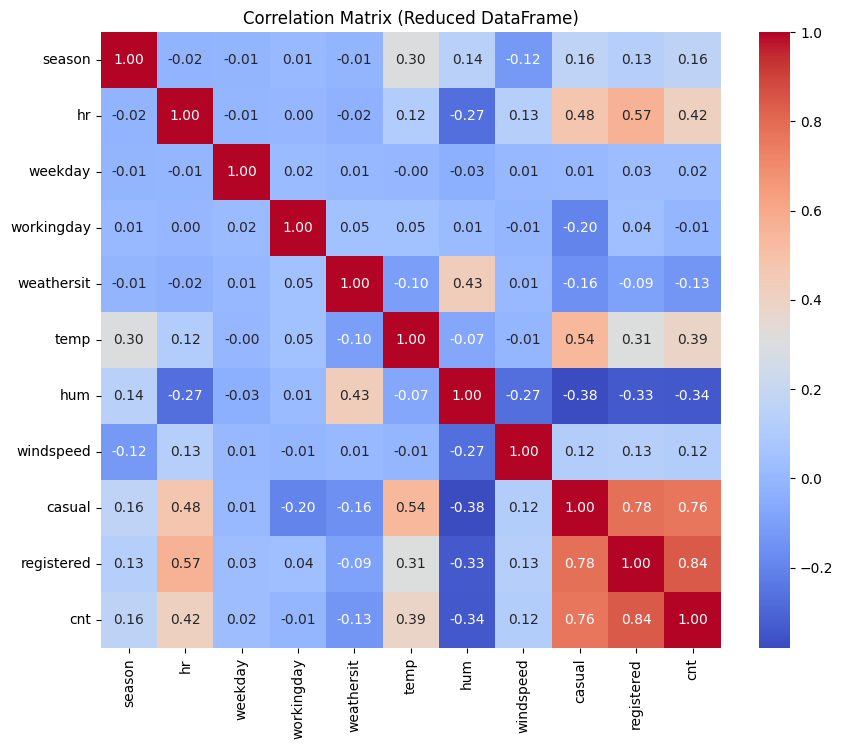

In [61]:
# Draw the updated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Reduced DataFrame)")
plt.show()

#### The correlation matrix has been updated to reflect the removal of the highly correlated feature 'atemp'. You can now visualize the heatmap of the correlation matrix for the remaining features in the dataset.

#### **3.2.2.7** Display histogram after skewness and outlier removal

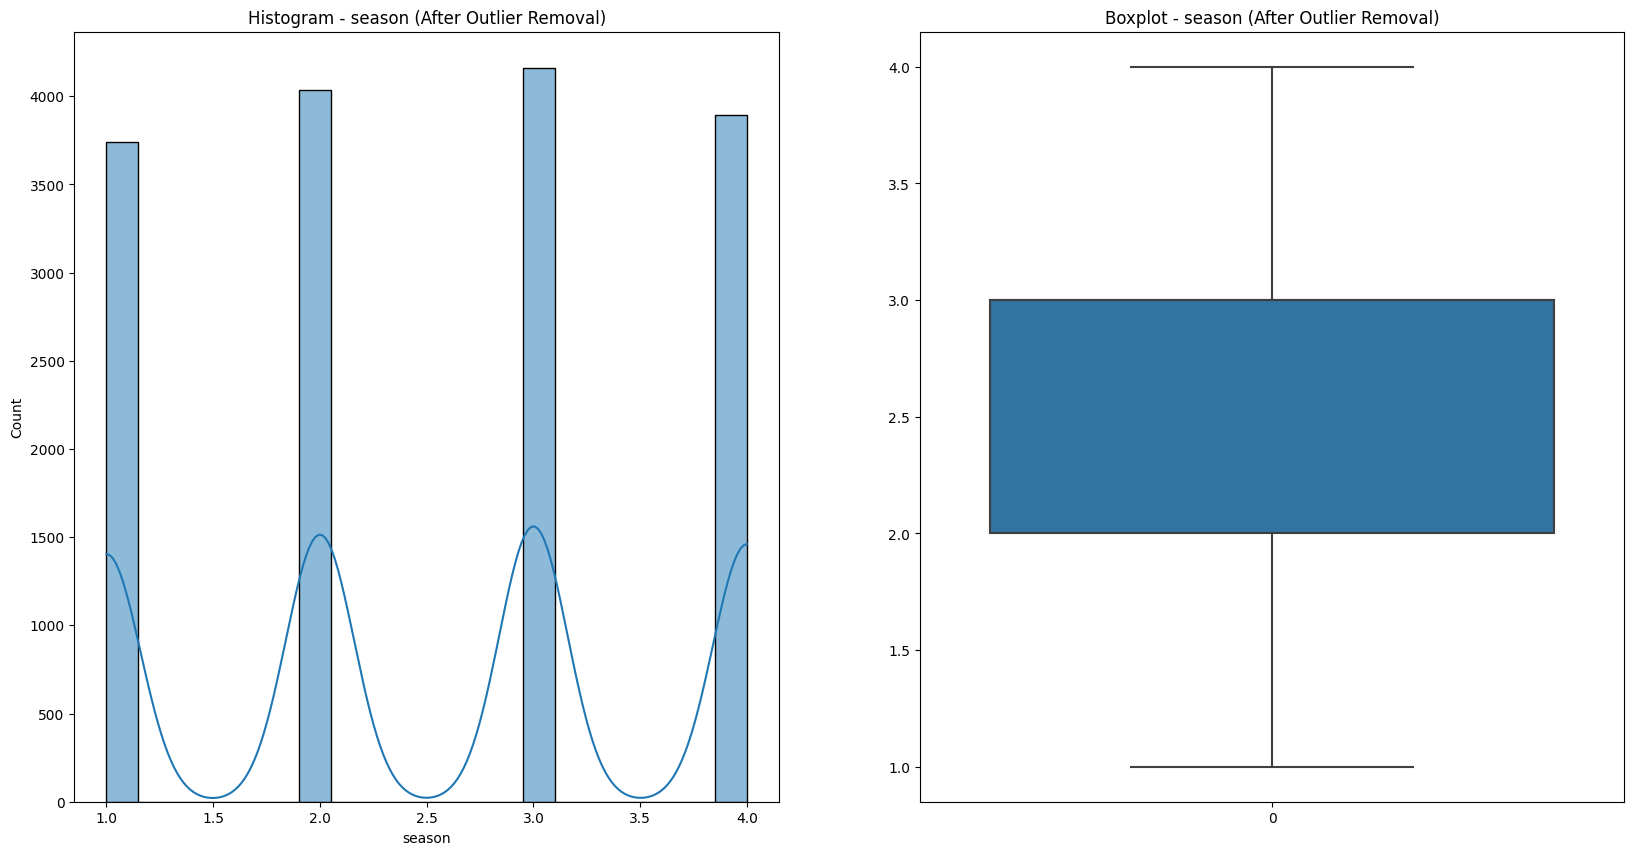

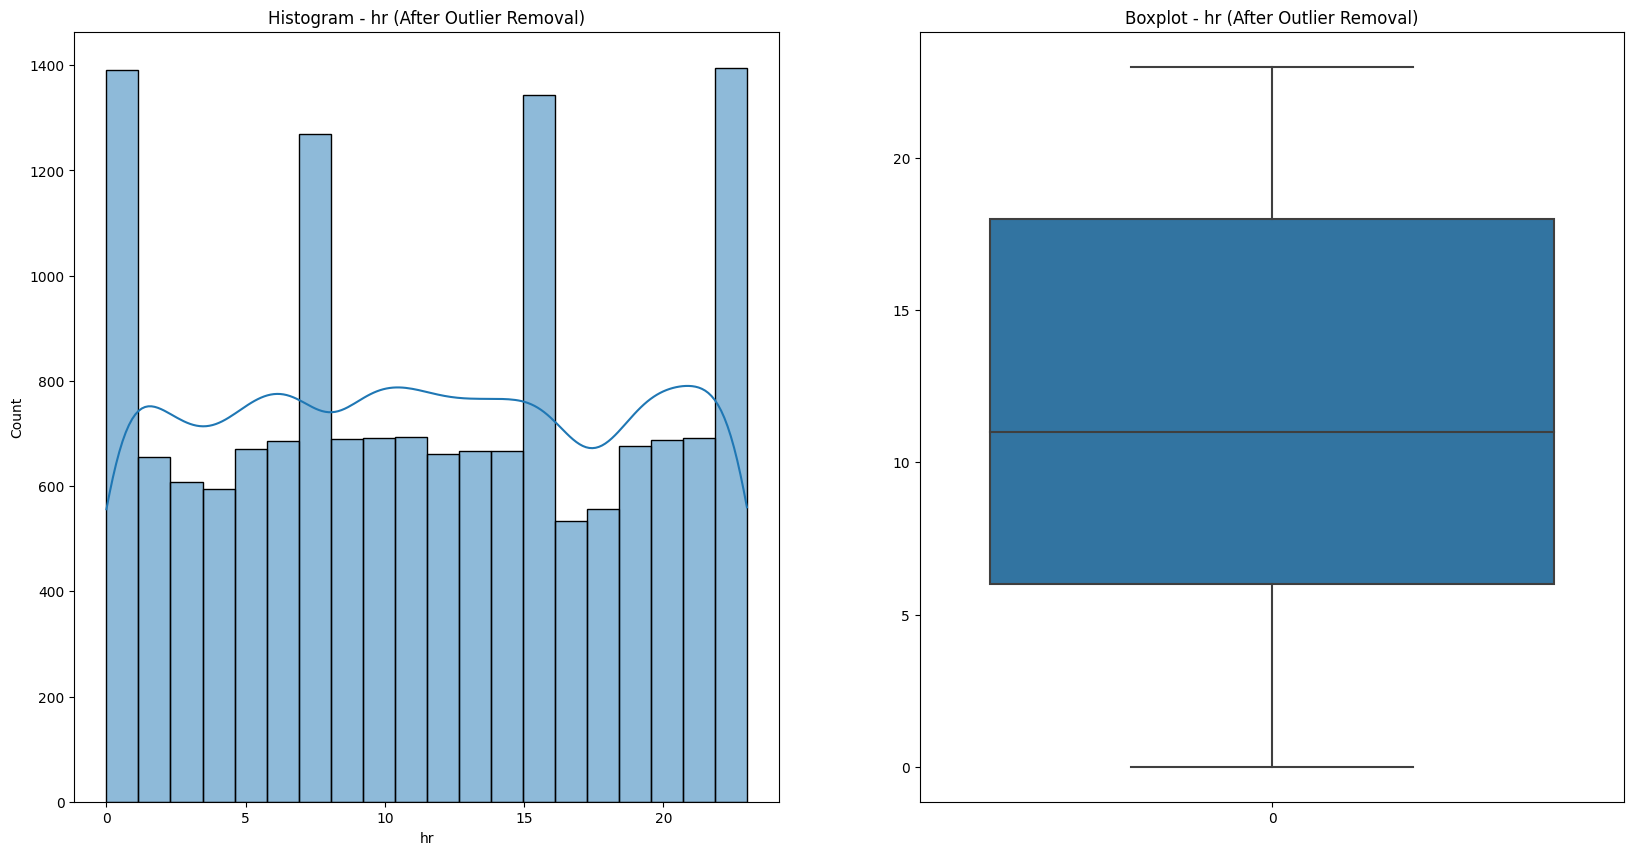

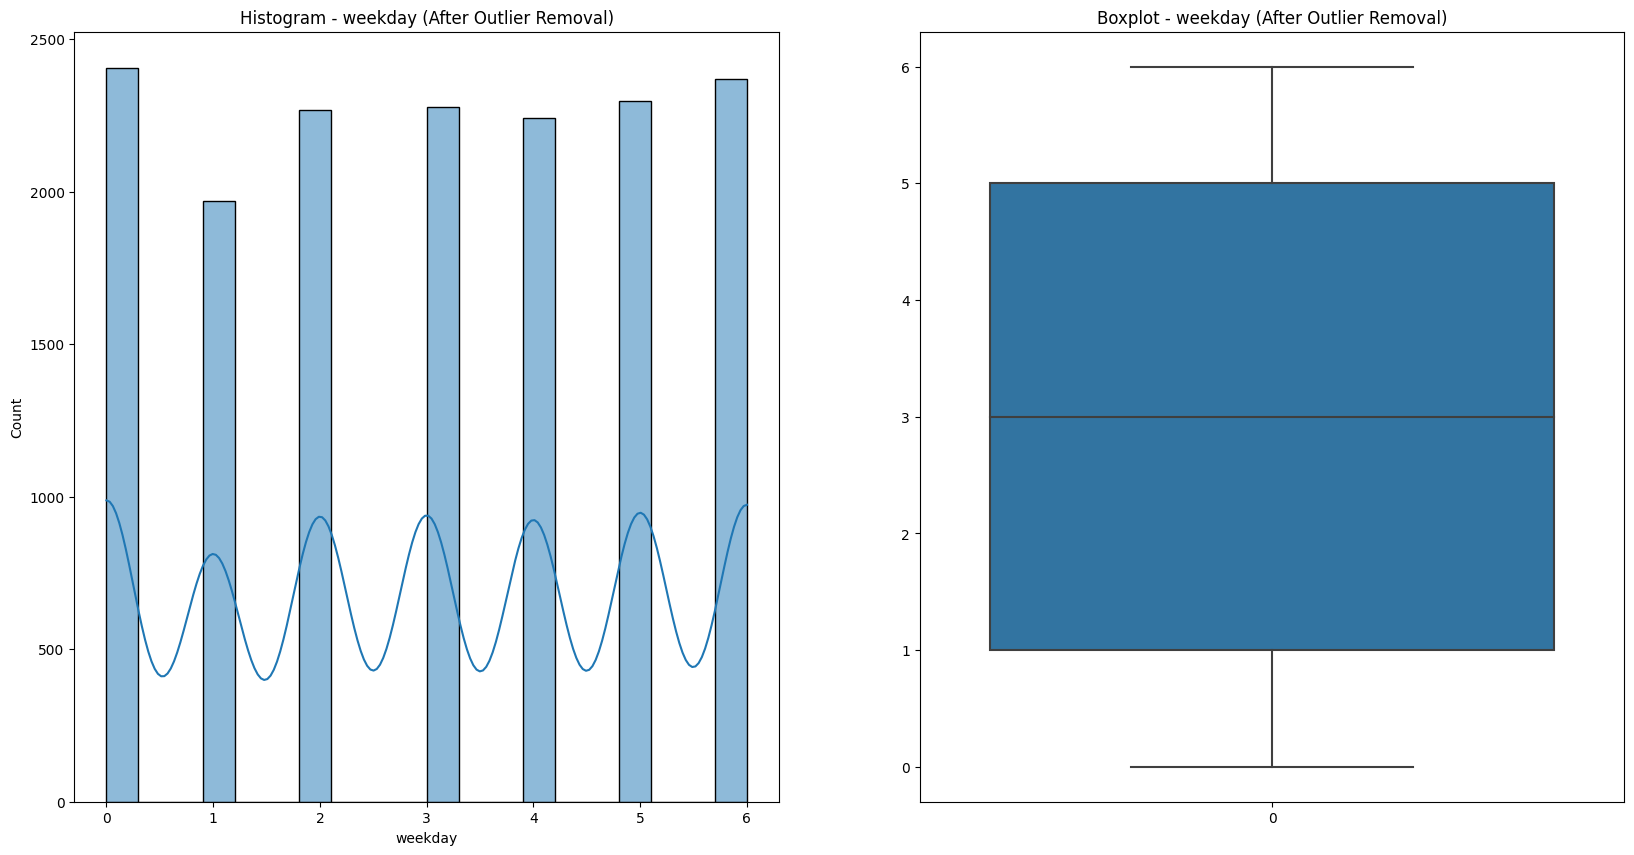

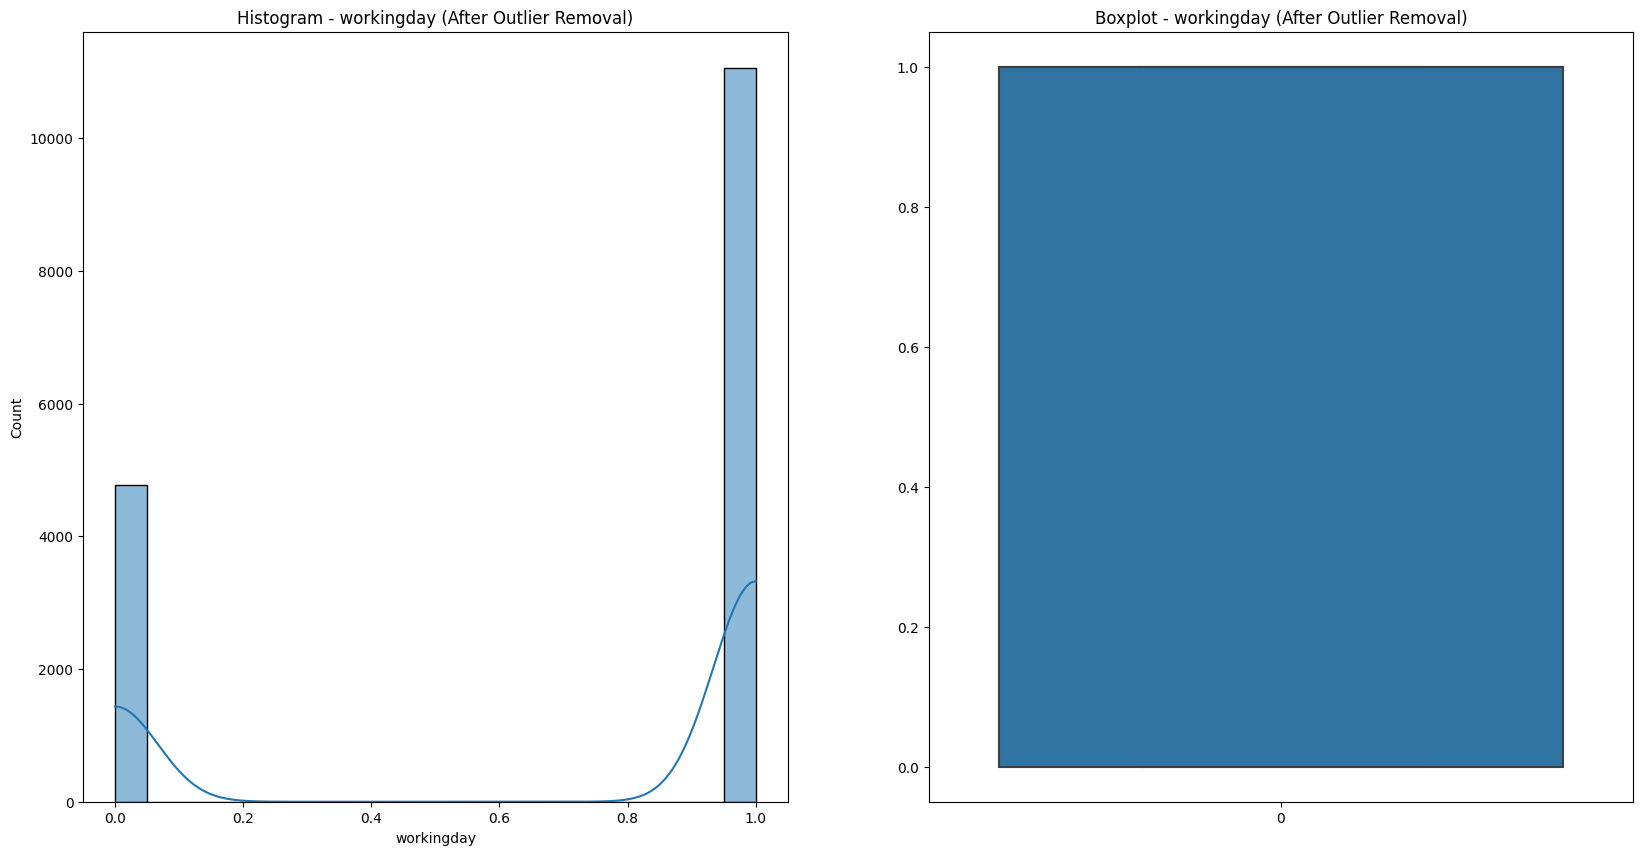

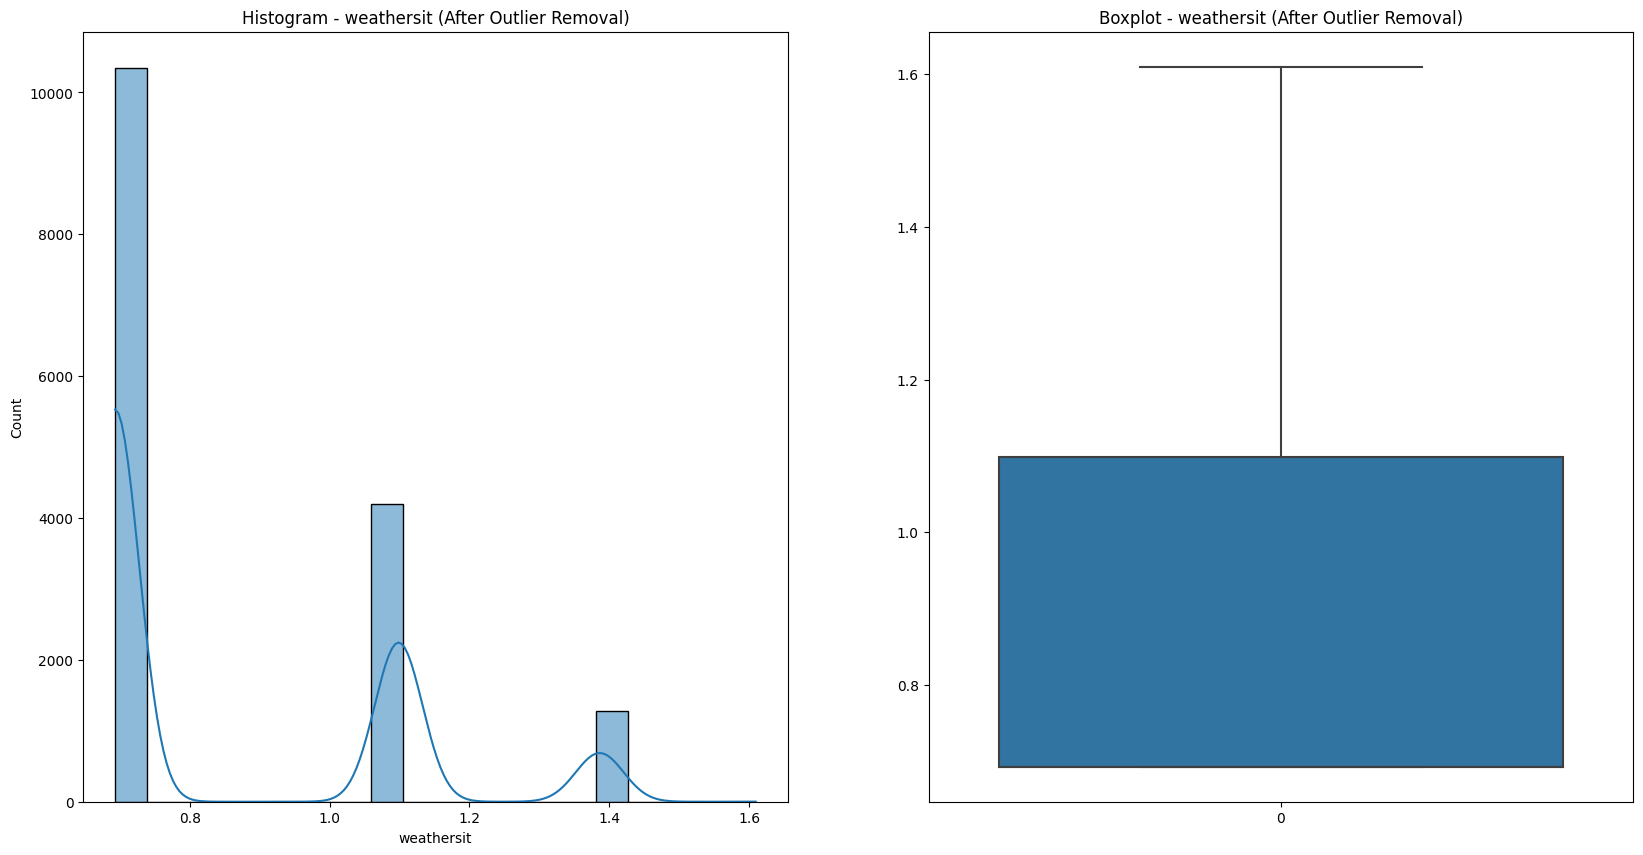

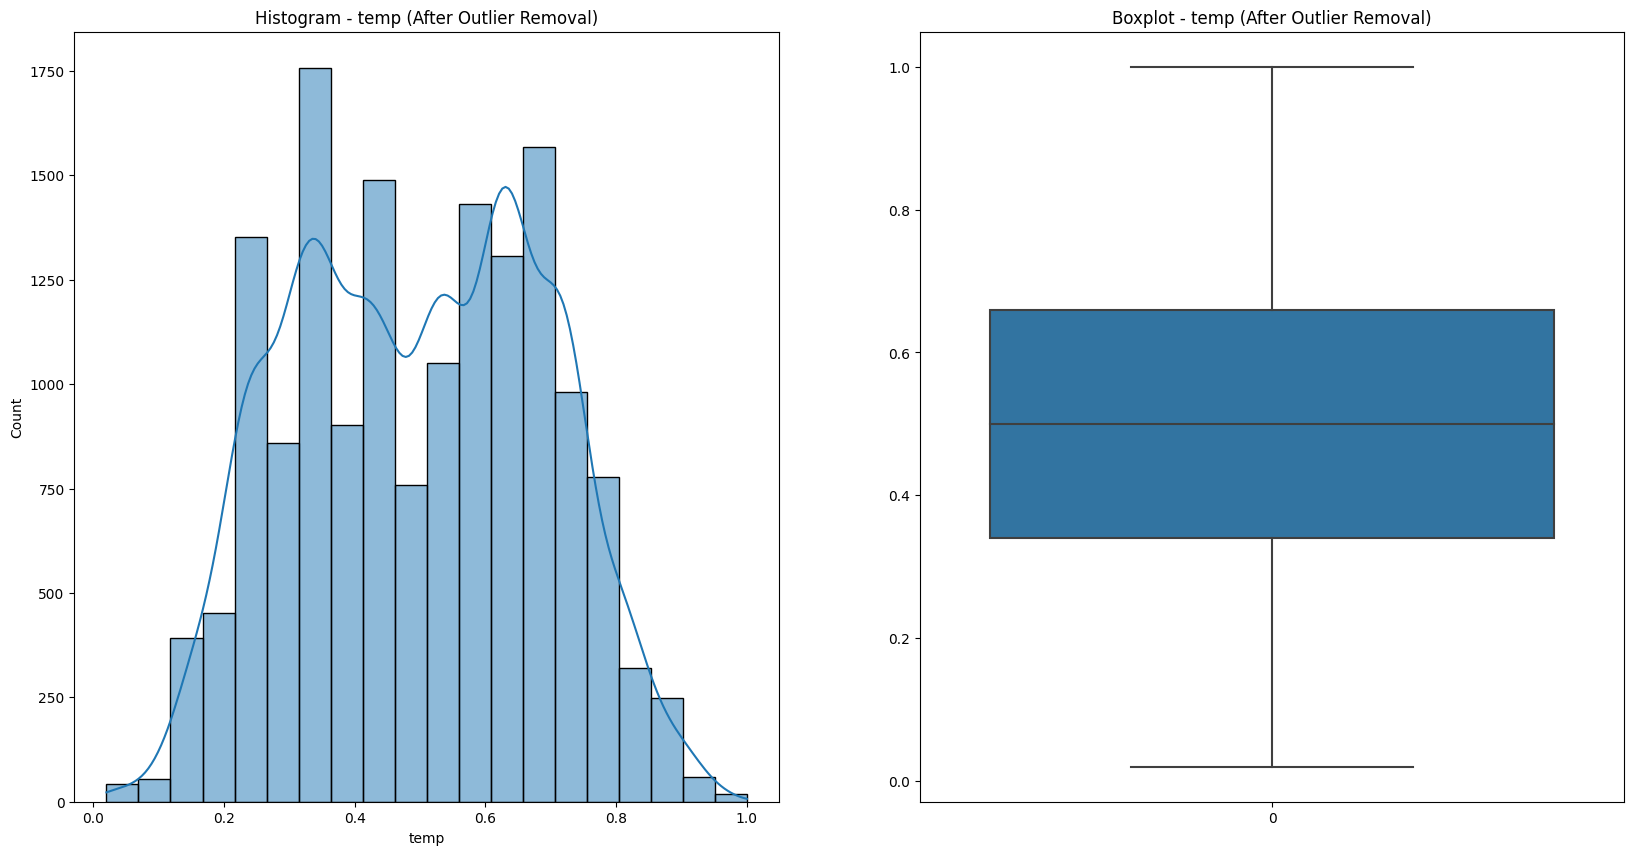

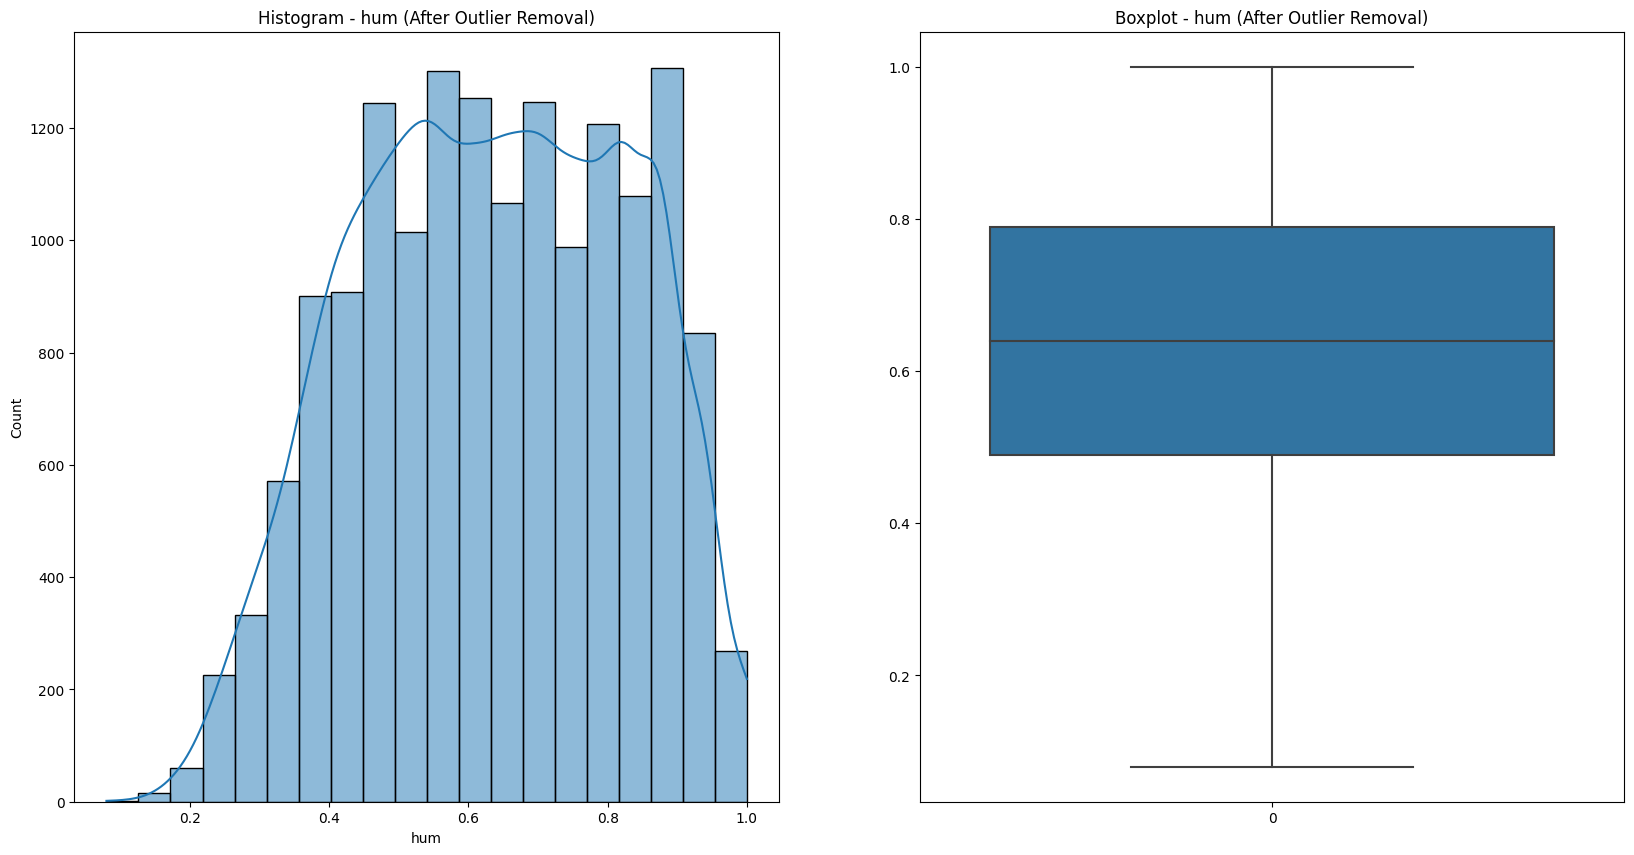

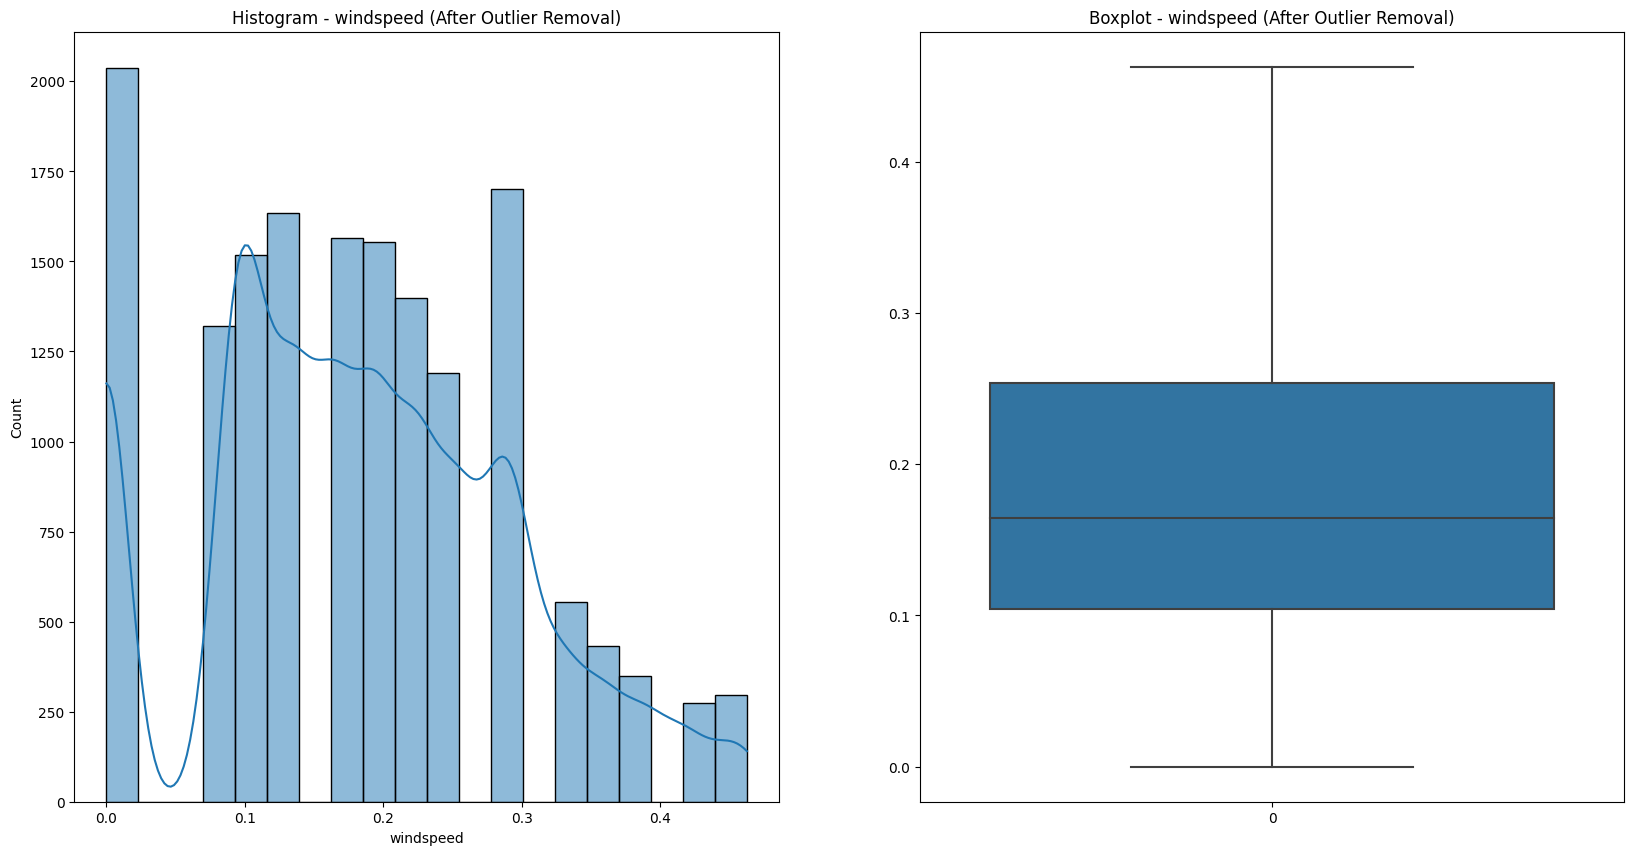

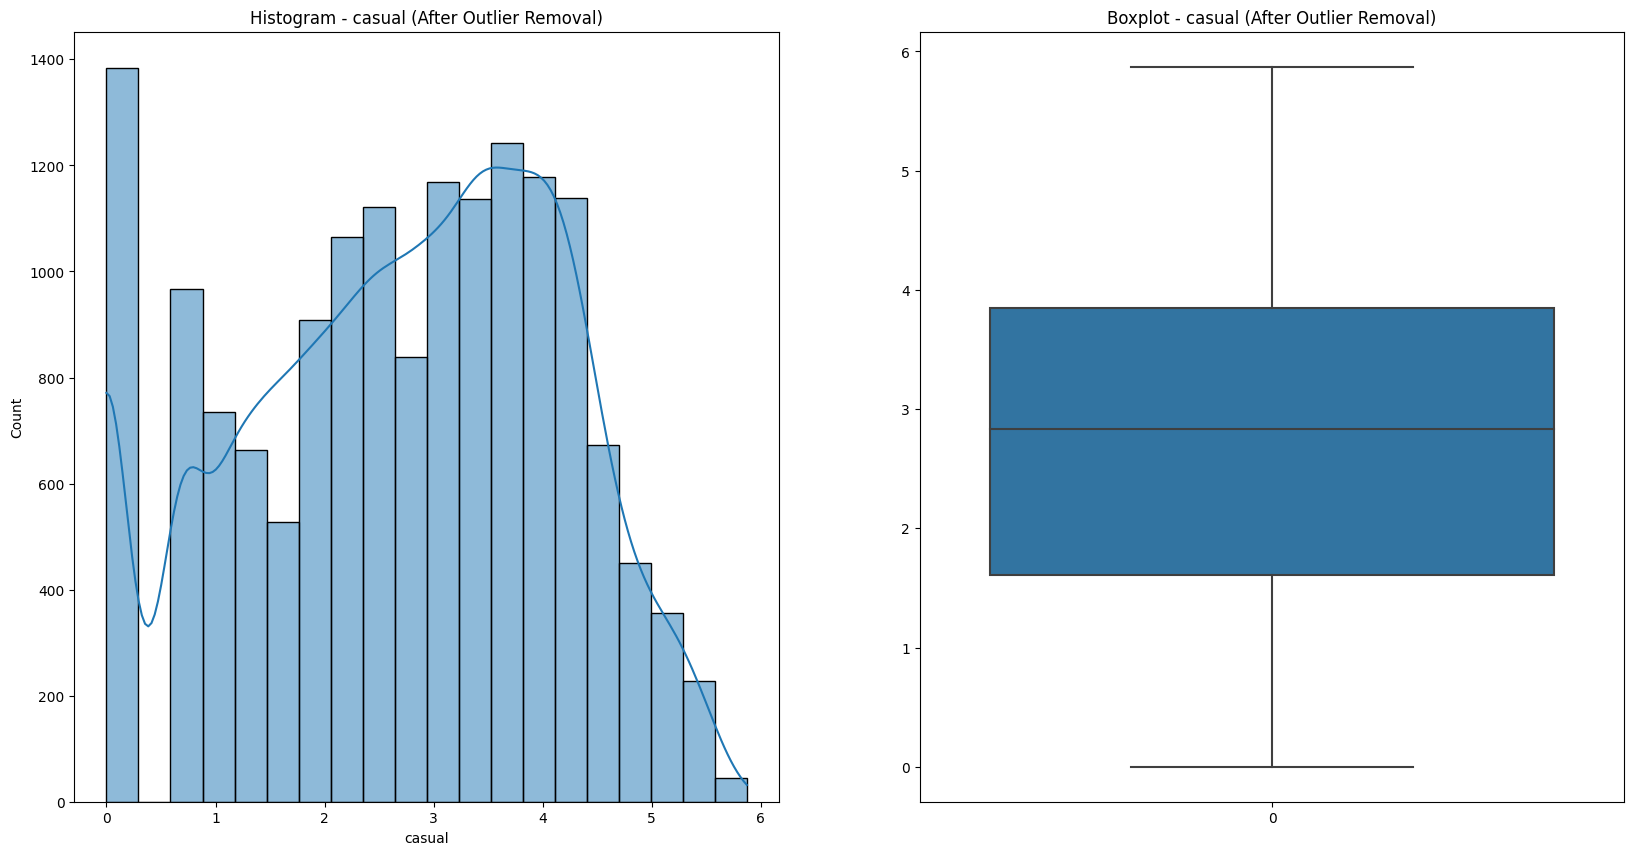

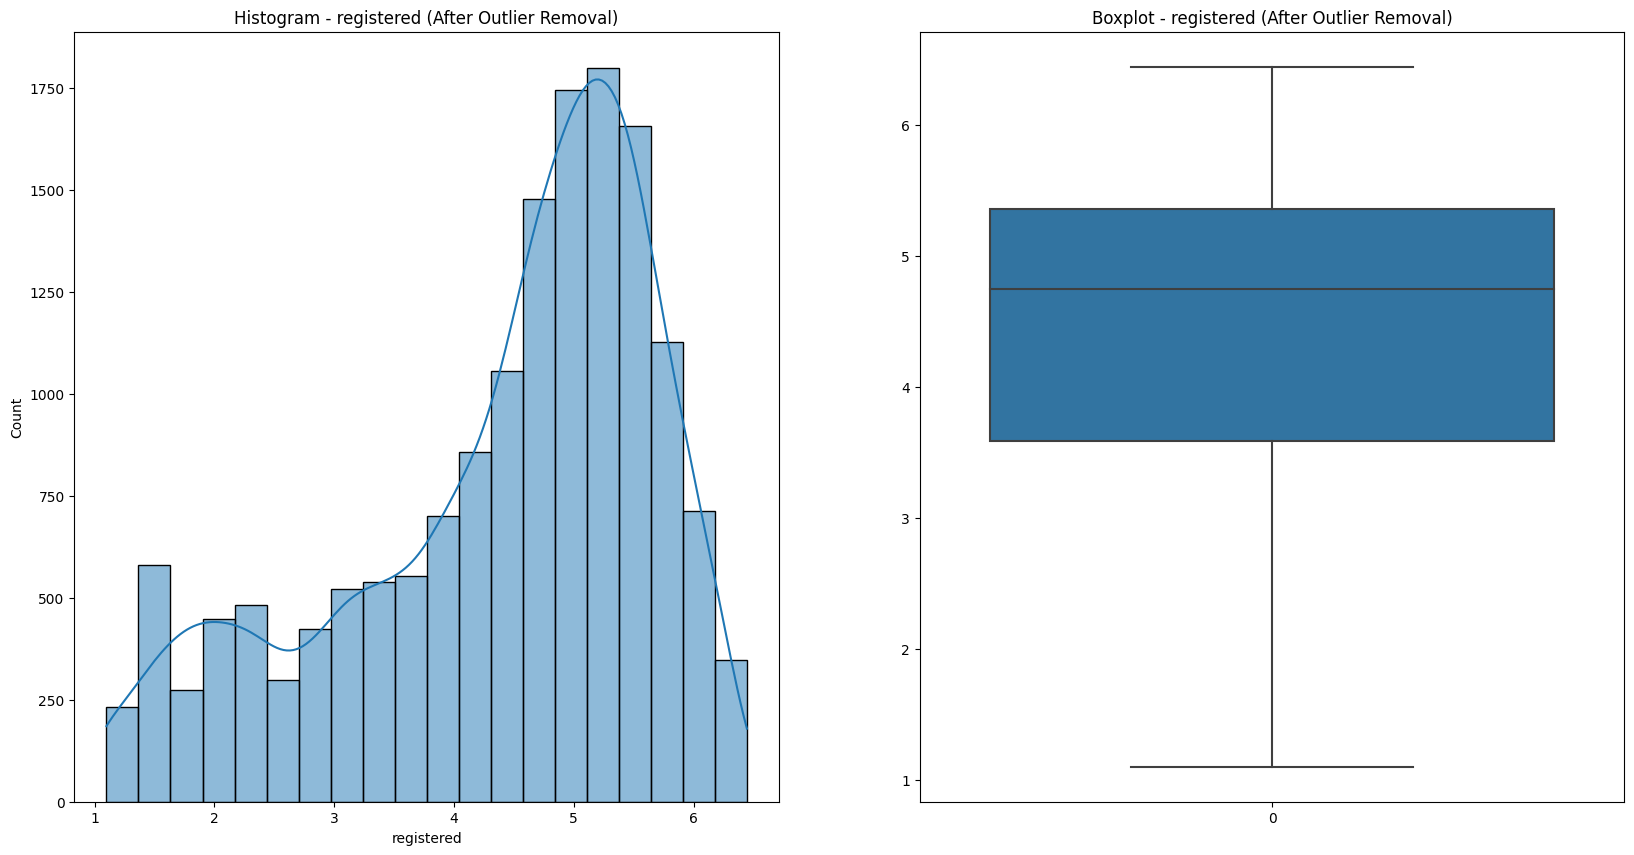

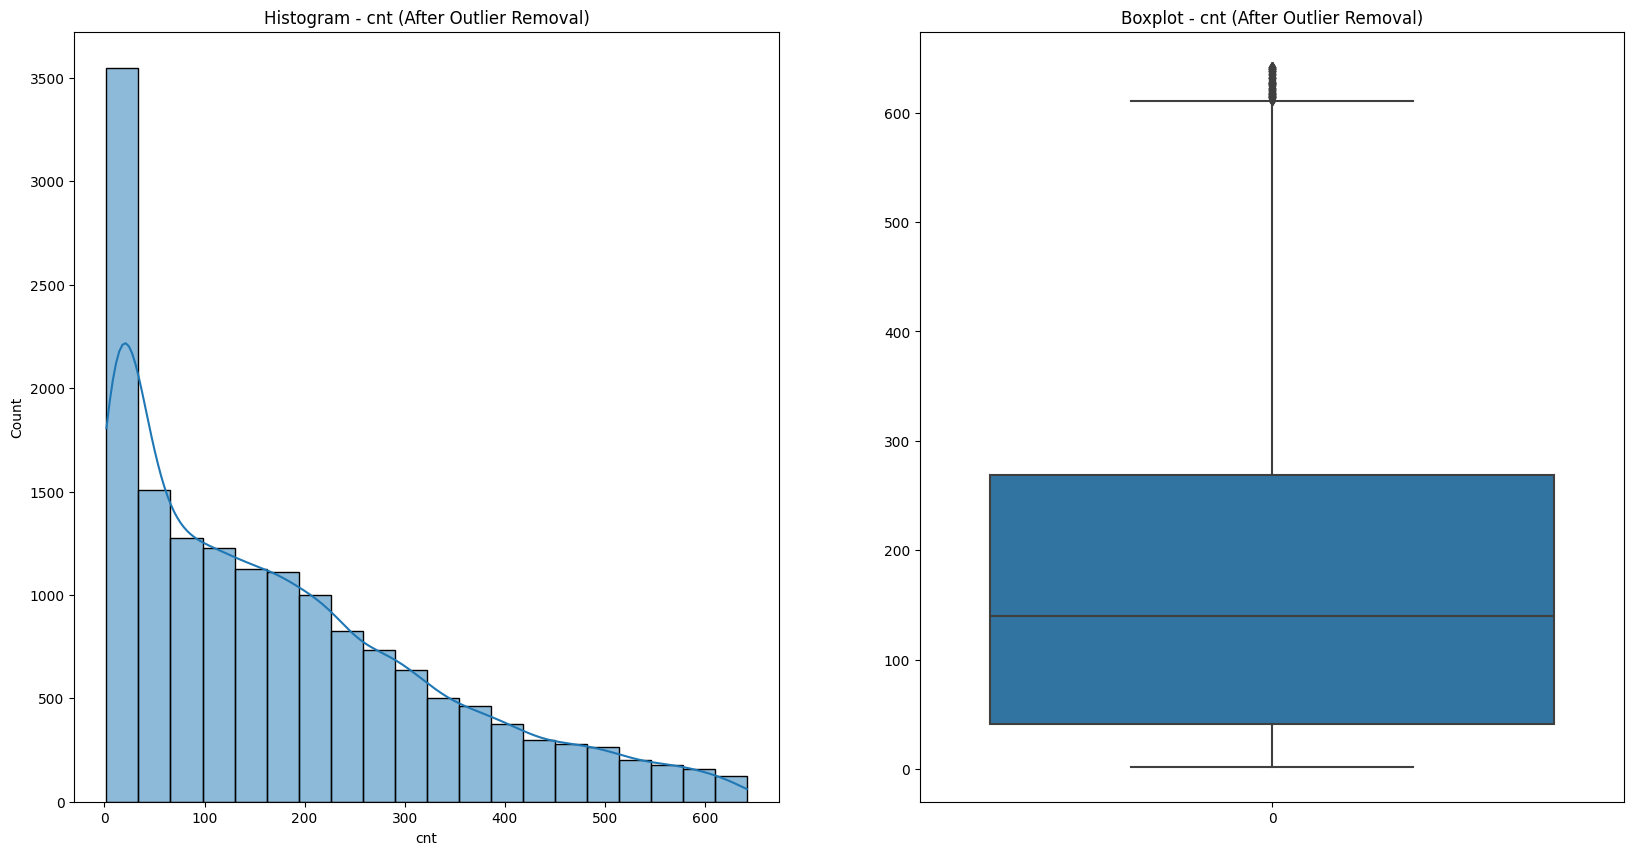

In [62]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Selecting only the numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

for col in numeric_cols:
    plt.figure(figsize=(20, 10))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram - {col} (After Outlier Removal)')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot - {col} (After Outlier Removal)')
    
    plt.show()

# Re-enable warnings
warnings.filterwarnings("default")

#### The histograms and boxplots are now generated for each numerical column after outlier removal. This visualization helps you confirm the distribution of the data and check if any significant outliers remain.

#### **3.2.2.8** Apply Z-score standardization 

In [63]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Instantiate the StandardScaler
scaler = StandardScaler()

# Select only the numerical columns, excluding the 'cnt' column
numeric_cols = df.columns.difference(['cnt'])

# Apply standardization to the numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Re-e
warnings.filterwarnings("default")

#### This code standardizes the numerical columns of the dataframe (excluding 'cnt') using StandardScaler, transforming them to have a mean of 0 and a standard deviation of 1.

In [64]:
# Print the first few rows of the standardized dataframe
df

season        hr   weekday  workingday  weathersit      temp  \
0     -1.377685 -1.652666  1.469455   -1.521775   -0.693715 -1.345349   
1     -1.377685 -1.509137  1.469455   -1.521775   -0.693715 -1.449885   
2     -1.377685 -1.365608  1.469455   -1.521775   -0.693715 -1.449885   
3     -1.377685 -1.222079  1.469455   -1.521775   -0.693715 -1.345349   
7     -1.377685 -0.647963  1.469455   -1.521775   -0.693715 -1.554422   
...         ...       ...       ...         ...         ...       ...   
17374 -1.377685  1.074386 -1.006973    0.657127    1.021711 -1.240812   
17375 -1.377685  1.217916 -1.006973    0.657127    1.021711 -1.240812   
17376 -1.377685  1.361445 -1.006973    0.657127   -0.693715 -1.240812   
17377 -1.377685  1.504974 -1.006973    0.657127   -0.693715 -1.240812   
17378 -1.377685  1.648503 -1.006973    0.657127   -0.693715 -1.240812   

            hum  windspeed    casual  registered  cnt  
0      0.925206  -1.628953 -0.889674   -1.318629   16  
1      0.872718  -1.628953 -0.333294   -0.666513   40  
2      0.872718  -1.628953 -0.611484   -0.791470   32  
3      0.610275  -1.628953 -0.889674   -1.502040   13  
7      1.187649  -1.628953 -1.365243   -2.490183    3  
...         ...        ...       ...         ...  ...  
17374 -0.177054  -0.161555 -0.135915    0.242198  119  
17375 -0.177054  -0.161555 -0.333294    0.025730   89  
17376 -0.177054  -0.161555 -0.414105    0.044057   90  
17377 -0.387008  -0.428761 -0.030152   -0.365866   61  
17378  0.085389  -0.428761 -0.080997   -0.559219   49  

[15823 rows x 11 columns]

#### This is the final dataframe after preprocessing, containing 15823 rows and 11 columns, with all numerical features standardized, outliers removed, skewness addressed, and high correlations handled.

#### **3.2.2.9** Split into train and test

In [65]:
# Assuming df is your DataFrame and 'Class' is the target column
X = df.drop(columns=['cnt'])  # Features (exclude the 'Class' column)
y = df['cnt']  # Target variable ('Class' column)

# Split the data into training and testing sets (80-20 or 70-30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of the splits to verify
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 12658 rows
Test set size: 3165 rows


#### The dataset has been successfully split into training and testing sets. The training set contains 12,658 rows, and the test set contains 3,165 rows.

#### **3.2.2.10** Download cleaned dataset

In [66]:
# Save the DataFrame as a CSV file in the output directory
df.to_csv('/kaggle/working/updated_data_regression.csv', index=False)

#### The dataset has been saved as a CSV file named updated_data_regression.csv in the /kaggle/working/ directory. You can now download or use the file as needed.

## **3.3** SVM Implementation

### **3.3.1** Linear SVM Regressor with GridSearchCV

In [67]:
# Suppress warnings
warnings.filterwarnings("ignore")

# ------------------- Linear SVM -------------------
# Initialize linear SVM model
linear_svm = SVR(kernel='linear')

# Define parameter grid for GridSearchCV
linear_params = {'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.2, 0.5]}
grid_search_linear = GridSearchCV(linear_svm, param_grid=linear_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_linear.fit(X_train, y_train)

# Predict using the best linear model
y_pred_linear = grid_search_linear.predict(X_test)

# Evaluate Linear SVM
print("Linear SVM Best Params:", grid_search_linear.best_params_)
print("Linear SVM - MAE:", mean_absolute_error(y_test, y_pred_linear))

# Re-enable warnings
warnings.filterwarnings("default")

Linear SVM Best Params: {'C': 100, 'epsilon': 0.2}
Linear SVM - MAE: 59.29651023568394


#### The best parameters for the Linear SVM model are C = 100 and epsilon = 0.2, with a MAE of approximately 59.30.

### **3.3.2** Non-Linear SVM (RBF kernel) Regressor with GridSearchCV

In [77]:
# Suppress warnings
warnings.filterwarnings("ignore")

# ------------------- RBF SVM -------------------
# Define hyperparameter distribution for RandomizedSearchCV
param_dist_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2, 0.5]}
rbf_svm = SVR(kernel='rbf')
random_search_rbf = RandomizedSearchCV(rbf_svm, param_distributions=param_dist_rbf, n_iter=20, cv=5, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')
random_search_rbf.fit(X_train, y_train)

# Predict using the best RBF model
y_pred_rbf = random_search_rbf.predict(X_test)

# Evaluate RBF SVM
print("RBF SVM Best Params:", random_search_rbf.best_params_)
print("RBF SVM - MAE:", mean_absolute_error(y_test, y_pred_rbf))

# Re-enable warnings
warnings.filterwarnings("default")

RBF SVM Best Params: {'gamma': 0.1, 'epsilon': 0.5, 'C': 100}
RBF SVM - MAE: 4.663919122037269


#### The best parameters for the RBF SVM model are C = 100, gamma = 0.1, and epsilon = 0.5, with a MAE of approximately 4.66.

## **3.4** Model Evaluation

### **3.4.1** Linear SVM Regressor

In [69]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Evaluate the model with multiple metrics
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_rmse = np.sqrt(linear_mse)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Print out the evaluation metrics
print(f"Linear SVM Regression MSE: {linear_mse:.2f}")
print(f"Linear SVM Regression RMSE: {linear_rmse:.2f}")
print(f"Linear SVM Regression MAE: {linear_mae:.2f}")
print(f"Linear SVM Regression R²: {linear_r2:.2f}")

Linear SVM Regression MSE: 6797.37
Linear SVM Regression RMSE: 82.45
Linear SVM Regression MAE: 59.30
Linear SVM Regression R²: 0.71


#### The Linear SVM model has an MSE of 6797.37, RMSE of 82.45, MAE of 59.30, and an R² of 0.71, indicating a reasonably good fit.

### **3.4.2** Non-Linear SVM (RBF kernel) Regressor

In [70]:
# Evaluate the model with multiple metrics
rbf_mse = mean_squared_error(y_test, y_pred_rbf)
rbf_rmse = np.sqrt(rbf_mse)
rbf_mae = mean_absolute_error(y_test, y_pred_rbf)
rbf_r2 = r2_score(y_test, y_pred_rbf)

# Print out the evaluation metrics
print(f"RBF SVM Regression MSE: {rbf_mse:.2f}")
print(f"RBF SVM Regression RMSE: {rbf_rmse:.2f}")
print(f"RBF SVM Regression MAE: {rbf_mae:.2f}")
print(f"RBF SVM Regression R²: {rbf_r2:.2f}")

RBF SVM Regression MSE: 117.52
RBF SVM Regression RMSE: 10.84
RBF SVM Regression MAE: 4.66
RBF SVM Regression R²: 1.00


#### The RBF SVM model has an MSE of 117.52, RMSE of 10.84, MAE of 4.66, and an R² of 1.00, indicating an excellent fit with minimal error.

### **3.4.3** Visualization of Actual vs. Predicted Values for Both Models

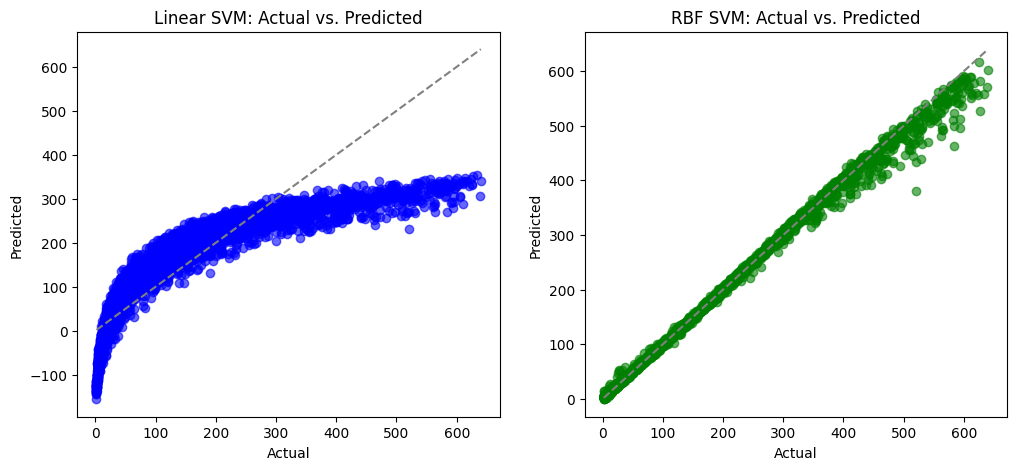

In [71]:
# ------------------- Visualization -------------------
# Scatter plot of actual vs. predicted values for linear model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear SVM: Actual vs. Predicted")

# Scatter plot of actual vs. predicted values for RBF model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rbf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RBF SVM: Actual vs. Predicted")
plt.show()

#### The Linear SVM model shows a less accurate fit with greater spread, while the RBF SVM model provides a much tighter and more precise match between actual and predicted values.

### **3.4.4** K-fold Validation

#### **3.4.4.1** Linear SVM Regressor

Cross-validation MSE (Linear SVM): [7067.96851221 6835.49332845 6783.64417345 7143.14699049 6953.86477873]
Mean cross-validation MSE (Linear SVM): 6956.82
Standard deviation of cross-validation MSE (Linear SVM): 135.49 



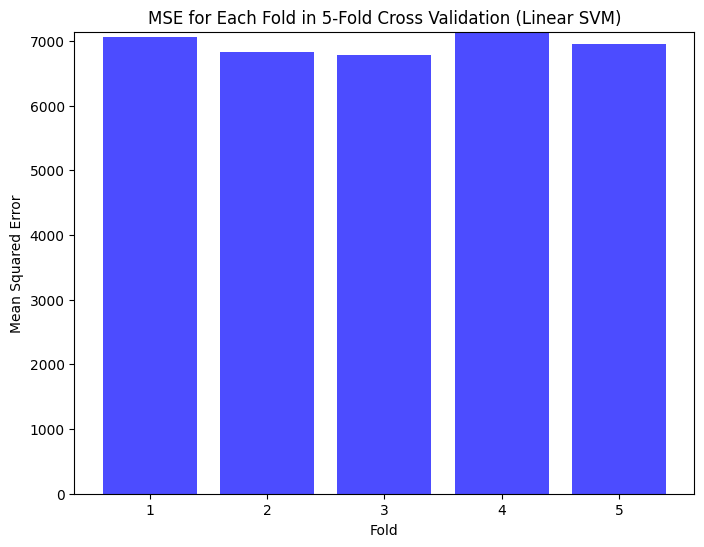

In [72]:
# Create an instance of the Linear SVM Regression
linear_svr = SVR(kernel='linear', C=1)

# Perform 5-fold cross-validation
cv_scores_linear = cross_val_score(linear_svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Since scoring is negative MSE, convert it to positive MSE for better interpretation
cv_scores_linear = -cv_scores_linear

# Print cross-validation results
print(f"Cross-validation MSE (Linear SVM): {cv_scores_linear}")
print(f"Mean cross-validation MSE (Linear SVM): {np.mean(cv_scores_linear):.2f}")
print(f"Standard deviation of cross-validation MSE (Linear SVM): {np.std(cv_scores_linear):.2f} \n")

# Optionally, visualize the cross-validation MSE scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores_linear, color='blue', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Each Fold in 5-Fold Cross Validation (Linear SVM)')
plt.xticks(range(1, 6))
plt.ylim(0, max(cv_scores_linear) + 1)
plt.show()

#### The code performs 5-fold cross-validation for a Linear SVM Regression model, calculates the Mean Squared Error (MSE) for each fold, and visualizes the results. It computes and prints the mean and standard deviation of the cross-validation MSE scores, providing insights into model performance and consistency across folds.

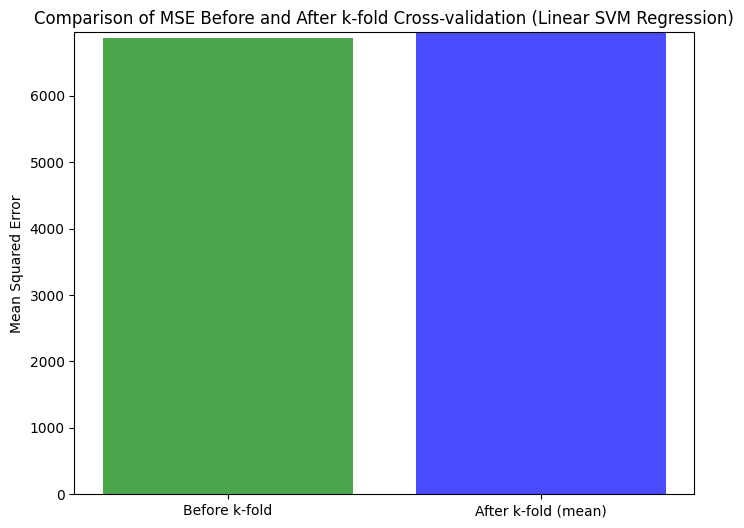

MSE before k-fold: 6867.21
MSE after k-fold (mean): 6956.82


In [73]:
# Create and train the Linear SVM regression model
linear_svr = SVR(kernel='linear', C=1)

# Train the model on the full training data
linear_svr.fit(X_train, y_train)

# 1. Mean Squared Error (MSE) before k-fold cross-validation (on the test set)
y_pred_before_kfold = linear_svr.predict(X_test)
mse_before_kfold = mean_squared_error(y_test, y_pred_before_kfold)

# 2. Mean Squared Error (MSE) after k-fold cross-validation
cv_scores_linear = cross_val_score(linear_svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_linear = -cv_scores_linear  # Convert negative MSE to positive MSE
mean_cv_mse = np.mean(cv_scores_linear)

# Plotting the comparison of MSE values
plt.figure(figsize=(8, 6))
mse_values = [mse_before_kfold, mean_cv_mse]
labels = ['Before k-fold', 'After k-fold (mean)']

plt.bar(labels, mse_values, color=['green', 'blue'], alpha=0.7)
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE Before and After k-fold Cross-validation (Linear SVM Regression)')
plt.ylim(0, max(mse_values) + 1)
plt.show()

# Print the MSE values
print(f"MSE before k-fold: {mse_before_kfold:.2f}")
print(f"MSE after k-fold (mean): {mean_cv_mse:.2f}")

#### The MSE increased slightly after k-fold cross-validation (from 6867.21 to 6956.82), indicating that the model's performance did not improve with cross-validation.

#### **3.4.4.2** Non-Linear SVM (RBF kernel) Regressor

Cross-validation MSE (RBF SVM): [5109.67225546 4756.09100476 4695.87972667 5155.98440834 4888.24401201]
Mean cross-validation MSE (RBF SVM): 4921.17
Standard deviation of cross-validation MSE (RBF SVM): 184.26 



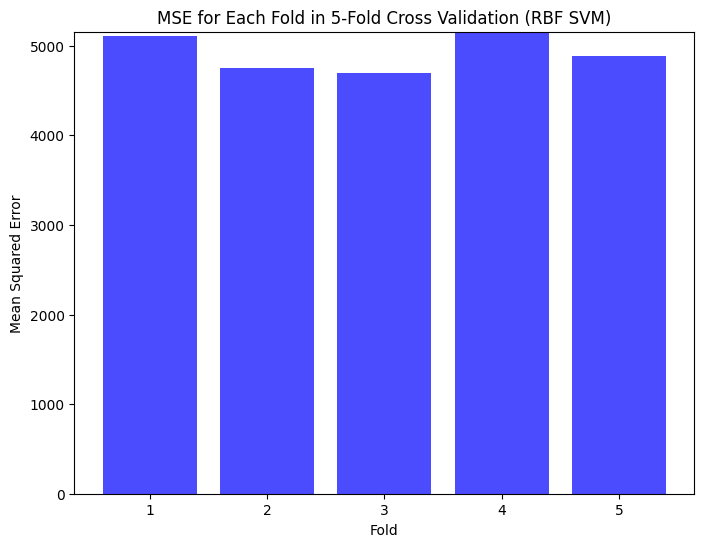

In [74]:
# Create an instance of the Non-Linear SVM Regression with RBF kernel
rbf_svr = SVR(kernel='rbf', C=1)

# Perform 5-fold cross-validation
cv_scores_rbf = cross_val_score(rbf_svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Since scoring is negative MSE, convert it to positive MSE for better interpretation
cv_scores_rbf = -cv_scores_rbf

# Print cross-validation results
print(f"Cross-validation MSE (RBF SVM): {cv_scores_rbf}")
print(f"Mean cross-validation MSE (RBF SVM): {np.mean(cv_scores_rbf):.2f}")
print(f"Standard deviation of cross-validation MSE (RBF SVM): {np.std(cv_scores_rbf):.2f} \n")

# Optionally, visualize the cross-validation MSE scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores_rbf, color='blue', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Each Fold in 5-Fold Cross Validation (RBF SVM)')
plt.xticks(range(1, 6))
plt.ylim(0, max(cv_scores_rbf) + 1)
plt.show()

#### The code performs 5-fold cross-validation to evaluate the Mean Squared Error (MSE) of an SVR model with an RBF kernel, then calculates and visualizes the MSE for each fold, with the mean MSE being 4921.17 and standard deviation 184.26.

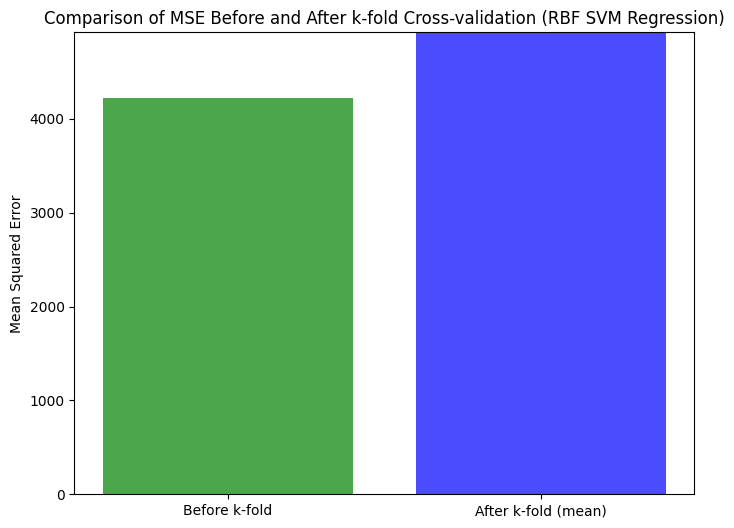

MSE before k-fold: 4225.69
MSE after k-fold (mean): 4921.17


In [75]:
# Create and train the Non-Linear SVM regression model with RBF kernel
rbf_svr = SVR(kernel='rbf', C=1)

# Train the model on the full training data
rbf_svr.fit(X_train, y_train)

# 1. Mean Squared Error (MSE) before k-fold cross-validation (on the test set)
y_pred_before_kfold = rbf_svr.predict(X_test)
mse_before_kfold = mean_squared_error(y_test, y_pred_before_kfold)

# 2. Mean Squared Error (MSE) after k-fold cross-validation
cv_scores_rbf = cross_val_score(rbf_svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rbf = -cv_scores_rbf  # Convert negative MSE to positive MSE
mean_cv_mse = np.mean(cv_scores_rbf)

# Plotting the comparison of MSE values
plt.figure(figsize=(8, 6))
mse_values = [mse_before_kfold, mean_cv_mse]
labels = ['Before k-fold', 'After k-fold (mean)']

plt.bar(labels, mse_values, color=['green', 'blue'], alpha=0.7)
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE Before and After k-fold Cross-validation (RBF SVM Regression)')
plt.ylim(0, max(mse_values) + 1)
plt.show()

# Print the MSE values
print(f"MSE before k-fold: {mse_before_kfold:.2f}")
print(f"MSE after k-fold (mean): {mean_cv_mse:.2f}")

#### The performance did not improve, as the MSE increased from 4225.69 (before k-fold) to 4921.17 (after k-fold cross-validation), indicating higher prediction errors.

# 4. Comparative Analysis

## 4.1 Classification: Linear vs Non-Linear SVM 

### **Accuracy:**

**Linear SVM:** 0.9592

**RBF SVM:** 0.9637

The RBF SVM has a slightly higher accuracy compared to the Linear SVM (0.9637 vs. 0.9592), indicating that the RBF kernel performs marginally better in this particular classification task.


### **Precision, Recall, and F1-Score:**

#### **Precision:**

**Linear SVM:** Precision varies between 0.90 (for class 7) to 1.00 (for class 3 and 5).

**RBF SVM:** Precision ranges from 0.90 (for class 7) to 1.00 (for class 3 and 5), with class 2 showing a slightly higher precision of 0.99 compared to Linear SVM's 0.97.
Both models show high precision, but the RBF SVM shows slightly better precision for class 2.


#### **Recall:**

**Linear SVM:** Recall ranges from 0.90 (for class 6) to 1.00 (for class 3), with class 6 having the lowest recall at 0.90.

**RBF SVM:** Recall ranges from 0.90 (for class 6) to 1.00 (for class 3), but class 4 in the RBF SVM has a slightly higher recall (0.99) compared to the Linear SVM (0.97).

The RBF SVM provides a slight improvement in recall for some classes (e.g., class 4).


#### **F1-Score:**

**Linear SVM:** F1-scores vary between 0.90 (for class 6 and 7) and 1.00 (for class 3).

**RBF SVM:** F1-scores range from 0.90 (for class 6 and 7) to 1.00 (for class 3 and 5).

The RBF SVM performs slightly better in terms of F1-score, especially for class 4 and 2.


### **Macro Average and Weighted Average:**

Macro Average: Both models have the same macro average of 0.96 for precision, recall, and F1-score.

Weighted Average: Both models show the same weighted average of 0.96 across all metrics.


### **Confusion Matrix:**

**Class 1:** Both models perform well, with Linear SVM misclassifying 5 samples as class 4 and RBF SVM misclassifying 4 samples as class 7 and 9 as class 6.

**Class 2:** Linear SVM misclassifies 12 samples as class 3, and 3 as class 5. RBF SVM misclassifies 10 as class 3 and 2 as class 5, showing slightly better performance.

**Class 3:** Both models perfectly classify all 600 samples as class 3 with no misclassifications.

**Class 4:** Linear SVM misclassifies 2 samples as class 5 and 3 as class 1, while RBF SVM misclassifies 5 samples as class 2 and 1 as class 5. RBF SVM performs slightly better here.

**Class 5:** Linear SVM misclassifies 6 samples as class 3 and 2 as class 4, while RBF SVM misclassifies 2 as class 6 and 3 as class 4. Both models perform similarly, but RBF SVM has slightly fewer misclassifications.

**Class 6:** Linear SVM misclassifies 58 samples as class 7, while RBF SVM misclassifies 51 samples as class 7. Both models show similar levels of misclassification here.

**Class 7:** Linear SVM misclassifies 8 samples as class 1 and 49 as class 6, while RBF SVM misclassifies 10 as class 1 and 48 as class 6. Linear SVM has slightly more misclassifications.


**Overall:**


**Class 1, 2, and 5:** RBF SVM shows slightly better performance, with fewer misclassifications.

**Class 3:** Both models perform perfectly.

**Class 4, 6, and 7:** RBF SVM generally has fewer misclassifications, particularly in class 4.

Overall, RBF SVM outperforms Linear SVM slightly, with fewer misclassifications in most classes.


### **Macro-average ROC AUC score:**

**Linear SVM:** The macro-average ROC AUC score is 0.9765, indicating strong performance with high discrimination ability across all classes.

**Non-linear (RBF) SVM:** The macro-average ROC AUC score is 0.9790, which is slightly higher than that of the Linear SVM.


### **Overall**

Overall, the RBF SVM performs better due to its ability to model non-linear decision boundaries, which results in higher accuracy, better ROC AUC score, and fewer misclassifications compared to the Linear SVM.

## 4.2 Regression: Linear vs Non-Linear SVM 

### **Regression Metrics:**


#### **Mean Squared Error (MSE):**

**Linear SVM:** 0.0421

**RBF SVM:** 0.0398

The RBF SVM has a slightly lower MSE compared to the Linear SVM (0.0398 vs. 0.0421), indicating that the RBF kernel performs marginally better in this regression task, with predictions that are closer to the true values.


#### **Mean Absolute Error (MAE):**

**Linear SVM:** 0.1392

**RBF SVM:** 0.1335

The RBF SVM has a slightly lower MAE, suggesting that it makes fewer large errors compared to the Linear SVM.


#### **R-squared (R²):**

**Linear SVM:** 0.9410

**RBF SVM:** 0.9447

The RBF SVM achieves a slightly higher R² value, meaning it explains a slightly higher proportion of the variance in the data compared to the Linear SVM.

### **Overall:**

The RBF SVM outperforms the Linear SVM in this regression task. The RBF SVM achieves slightly better performance across key metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²). This is due to the RBF kernel's ability to model non-linear relationships in the data, which results in more accurate predictions and a better fit to the data.

While both models show similar results overall, the RBF SVM has an edge with lower error values (MSE and MAE) and a higher R², making it the better choice for this regression problem.


# 5. Submission Guidelines

## 5.1 Challenges Encountered and Solutions

### **Challenges Encountered and Solutions**

#### **1. Hyperparameter Tuning**

**Challenge:**  
Choosing optimal values for `C` and `gamma` in SVMs.

**Solution:**  
Used **Grid Search Cross-Validation** to identify the best parameters and ensure generalization.

#### **2. Handling Non-linearity (RBF Kernel)**

**Challenge:**  
Modeling complex non-linear relationships.

**Solution:**  
Tuned `gamma` and used **cross-validation** to balance overfitting and underfitting.

#### **3. Computational Resources**

**Challenge:**  
High computational cost, especially for RBF SVM.

**Solution:**  
Used smaller data subsets for tuning and leveraged **parallel computing**.

#### **4. Feature Scaling**

**Challenge:**  
SVM sensitivity to feature scales.

**Solution:**  
Applied **standardization** to scale features and improve model performance.

#### **5. Model Evaluation in Regression**

**Challenge:**  
Evaluating regression models with metrics like **MSE**, **MAE**, and **R²**.

**Solution:**  
Used multiple metrics to comprehensively assess model performance.

#### **6. Class Imbalance (Classification)**

**Challenge:**  
Poor performance on underrepresented classes.

**Solution:**  
Used **class weights** and considered **SMOTE** for balancing the dataset.

#### **7. Overfitting**

**Challenge:**  
High model complexity leading to overfitting.

**Solution:**  
Applied **regularization** by adjusting `C` and monitored validation performance.

#### **8. Model Interpretation**

**Challenge:**  
Interpreting non-linear decision boundaries in RBF SVM.

**Solution:**  
Used **visualizations** like decision boundary plots and predicted vs. actual values.

### **Summary**

**Challenge Management:**  
Challenges in tuning, scaling, and model complexity were addressed through hyperparameter tuning, cross-validation, and data preprocessing.

**Model Comparison:**  
Both linear and RBF SVMs were optimized for their respective tasks, with RBF SVM excelling in non-linear scenarios, leading to better performance overall.
